# A Localization Strategy: The Road to Optimize Amazon AWS Saas Sales
Amazon is an American multinational technology company engaged in e-commerce, cloud computing, online advertising, digital streaming, and artificial intelligence. The Amazon SaaS (Software-as-a-service) is a cloud-based software model that delivers applications to end-users through the internet.
Based on the [Amazon AWS Saas Sales Dataset](https://www.kaggle.com/datasets/nnthanh101/aws-saas-sales), ***what would be the recommended strategy to optimize Amazon's sales based on existing trends?***

Project objectives:
1. Understand the trends across customer segments, regions, and products
2. Explore what factors may influence sales trends the most
3. Recommend strategies to optimize sales

This file documents the process of analyzing Amazon's data, divided into three main sections:
1. Data Cleaning
2. Data Analysis and Visualization
3. Conclusion and Recommendation

*Note: Each section is an iterative process and goes back and forth as needed. For example, while analyzing and visualizing data, data errors may be found, which led us to revise the data cleaning section. The separation of these sections aim to organize and structure the process only.*

# 0. Data Overview

**Libraries to import:**

In [ ]:
import pandas as pd # data analysis
import numpy as np # numerical operations
import matplotlib.pyplot as plt # visualization
import seaborn as sns # more visualization customizations

**Loading the dataset:**

In [ ]:
data = pd.read_csv('SaaS-Sales.csv', sep=';')
data.head()

Row ID          Order ID Order Date  Date Key    Contact Name  \
0       1  EMEA-2022-152156   11/09/22  20221109     Nathan Bell   
1       2  EMEA-2022-152156   11/09/22  20221109     Nathan Bell   
2       3  AMER-2022-138688  6/13/2022  20220613  Deirdre Bailey   
3       4  EMEA-2021-108966   10/11/21  20211011      Zoe Hodges   
4       5  EMEA-2021-108966   10/11/21  20211011      Zoe Hodges   

         Country           City Region Subregion           Customer  \
0        Ireland         Dublin   EMEA      UKIR            Chevron   
1        Ireland         Dublin   EMEA      UKIR            Chevron   
2  United States  New York City   AMER     NAMER        Phillips 66   
3        Germany      Stuttgart   EMEA   EU-WEST  Royal Dutch Shell   
4        Germany      Stuttgart   EMEA   EU-WEST  Royal Dutch Shell   

   Customer ID Industry    Segment                 Product     License  \
0         1017   Energy        SMB         Marketing Suite  16GRM07R1K   
1         1017   Energy        SMB              FinanceHub  QLIW57KZUV   
2         1056   Energy  Strategic              FinanceHub  JI6BVL70HQ   
3         1031   Energy        SMB          ContactMatcher  DE9GJKGD44   
4         1031   Energy        SMB  Marketing Suite - Gold  OIF7NY23WD   

         Sales  Quantity  Discount    Profit  
0       261.96         2      0.00   419.136  
1       731.94         3      0.00   219.582  
2  0,626388889         2      0.00    68.714  
3    9.575.775         5      0.45  -383.031  
4       22.368         2      0.02    25.164

**Data dictionary:**

| Group         | Field         | Description                                                   |
|---------------|---------------|---------------------------------------------------------------|
| **Transaction**| Row ID        | A unique identifier for each transaction                      |
|               | Order ID      | A unique identifier for each order                            |
|               | Order Date    | The date when the order was placed                            |
|               | Date Key      | A numerical representation of the order date (YYYYMMDD)       |
|---------------|---------------|---------------------------------------------------------------|
| **Customer**   | Contact Name  | The name of the person who placed the order                   |
|               | Customer      | The name of the company that placed the order                 |
|               | Customer ID   | A unique identifier for each customer                         |
|               | Industry      | The industry the customer belongs to                          |
|               | Segment       | The customer segment (SMB, Strategic, Enterprise, etc.)       |
|---------------|---------------|---------------------------------------------------------------|
| **Location**   | Country       | The country where the order was placed                        |
|               | City          | The city where the order was placed                           |
|               | Region        | The region where the order was placed                         |
|               | Subregion     | The subregion where the order was placed                      |
|---------------|---------------|---------------------------------------------------------------|
| **Product**    | Product       | The product that was ordered                                  |
|               | License       | The license key for the product                               |
|---------------|---------------|---------------------------------------------------------------|
| **Sales**      | Sales         | The total sales amount for the transaction                    |
|               | Quantity      | The total number of items in the transaction                  |
|               | Discount      | The discount applied to the transaction                       |
|               | Profit        | The profit from the transaction                               |

In [ ]:
print("Number of rows:", data.shape[0])
print("Number of columns:", data.shape[1])


Number of rows: 9994
Number of columns: 19


#1. Data Cleaning

*Before analyzing the data, the dataset must be cleaned to maintain its quality.*

## 1.1. Check for missing values

In [ ]:
# check for missing values
print(data.isnull().sum())

# drop missing values
data = data.dropna()

## insight: there are no missing values in the data

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


## 1.2. Check for duplicates

In [ ]:
# counts how many duplicate values there are
print(data.duplicated().sum())

# drops duplicate values
data = data.drop_duplicates()

## insight: there are no duplicates in the data

0


## 1.3. Data formatting

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   object 
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

In [ ]:
# Strip spaces from column names
data.columns = data.columns.str.strip()

# Convert 'Order Date' to proper datetime
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')

/tmp/ipython-input-1115-685565215.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')


*While opening the data on Microsoft Excel, several inconsistencies were found regarding the format of numerical values, mainly the 'Sales' and 'Profit' column. Values in thousands were written with dots (.), which can be misread as a time format in softwares like Microsoft Excel. All numerical columns were converted into float for standardization.*

In [ ]:
# cleaning numerical values
def clean_number(value):
    if isinstance(value, str): # checks if data is string
        value = value.strip() # removes spaces
        value = value.replace('.', '') # removes dots
    try:
        return float(value) # converts into float
    except:
        return None

# apply function to number columns
columns_to_clean = ['Sales', 'Quantity', 'Discount', 'Profit']

for col in columns_to_clean:
    data[col] = data[col].apply(clean_number)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Date Key      9994 non-null   int64         
 4   Contact Name  9994 non-null   object        
 5   Country       9994 non-null   object        
 6   City          9994 non-null   object        
 7   Region        9994 non-null   object        
 8   Subregion     9994 non-null   object        
 9   Customer      9994 non-null   object        
 10  Customer ID   9994 non-null   int64         
 11  Industry      9994 non-null   object        
 12  Segment       9994 non-null   object        
 13  Product       9994 non-null   object        
 14  License       9994 non-null   object        
 15  Sales         9212 non-null   float64 

*It's necessary to check if there are mispellings in any values, espeically those with special characters, but there are none.*

In [ ]:
# checks for typos or special characters
def special_char(value):
    if isinstance(value, str):
        return not value.isascii()  # true if it has special characters
    return False

# create a dictionary to store results
special_values = {}

# loop through each column
for col in data.columns:
    # filter rows where the value has special characters
    list_special_chars = data[data[col].apply(special_char)][col].unique().tolist()

    # If any found, store them
    if list_special_chars:
        special_values[col] = list_special_chars

# Display the results
for col, values in special_values.items():
    for v in values:
        print(f"{v}")

San José
Bogotá
Córdoba
São Paulo
Malmö
Brasília
Medellín
Reykjavík


## 1.4. Removing anomalies

*The boxplot is used to visualize anomalies in the data. Whether there are extermely high or low numbers.*

Number of rows with any outlier: 3312 out of 9994
Percentage of rows with outliers: 33.14%


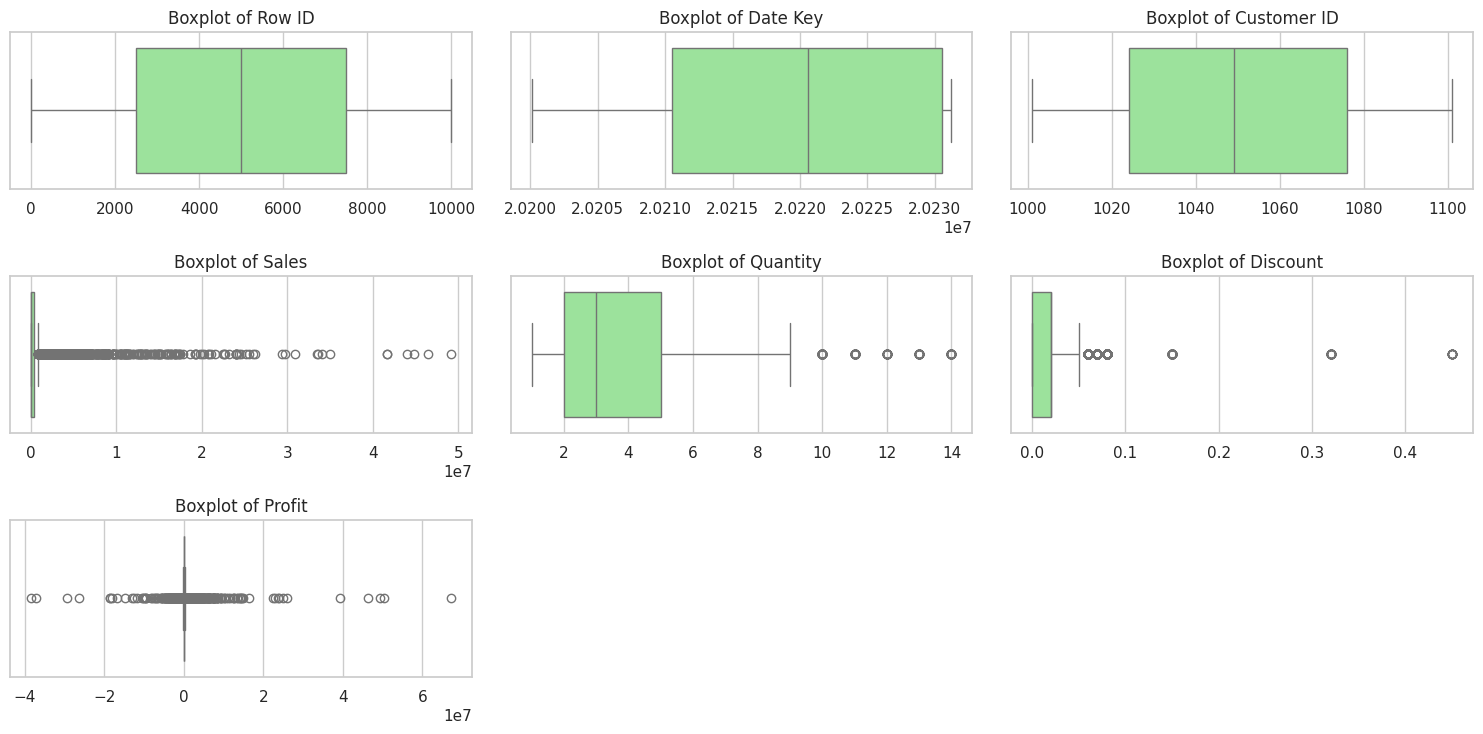

In [ ]:
# Select only numerical columns
numeric_data = data.select_dtypes(include='number')

# Calculate outliers using IQR
outlier_mask = pd.DataFrame(False, index=numeric_data.index, columns=numeric_data.columns)

for col in numeric_data.columns:
    Q1 = numeric_data[col].quantile(0.25)
    Q3 = numeric_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outlier_mask[col] = (numeric_data[col] < lower) | (numeric_data[col] > upper)

# Calculate how many rows contain any outlier
outlier_rows = outlier_mask.any(axis=1)
num_outliers = outlier_rows.sum()
total_rows = len(numeric_data)
percent_outliers = (num_outliers / total_rows) * 100

# Print result
print(f"Number of rows with any outlier: {num_outliers} out of {total_rows}")
print(f"Percentage of rows with outliers: {percent_outliers:.2f}%")

# Set up the grid for boxplots
num_cols = len(numeric_data.columns)
cols_per_row = 3
rows = (num_cols + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(rows, cols_per_row, figsize=(5 * cols_per_row, 2.5 * rows))
axes = axes.flatten()

# Create boxplot for each numerical column
for i, col in enumerate(numeric_data.columns):
    sns.boxplot(x=numeric_data[col], ax=axes[i], color='lightgreen')
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_xlabel('')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()

*Based on the boxplot, sales and profit has the most outliers. We will run some codes to see if there were profits that exceeded the value of sales and drop them if there are any.*

In [ ]:
len(data)

9994

In [ ]:
# Get the original number of rows
original_count = len(data)

# Filter the data: keep only rows where Profit < Sales
data = data[data['Profit'] < data['Sales']]

# Get the new number of rows
new_count = len(data)

# Calculate and print how many rows were dropped
dropped_count = original_count - new_count
print(f"{dropped_count} rows were dropped where Profit >= Sales.")

5382 rows were dropped where Profit >= Sales.


In [ ]:
len(data)

4612

*Adds a new 'Profit_margin' column to calculate the profit margin by dividing profit over sales*

In [ ]:
# Add a new column for profit margin per row
# Formula: Profit / Sales, with check to avoid division by zero
data['Profit_Margin'] = data.apply(
    lambda row: row['Profit'] / row['Sales'] if row['Sales'] != 0 else None,
    axis=1
)

/tmp/ipython-input-1123-4195195590.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Profit_Margin'] = data.apply(


*Checks to see if there were unrealistic profit margins (exceeded 100% or -100%) and drop them if there are any*

In [ ]:
# Store the original number of rows
original_count = len(data)

# Drop unrealistic profit margin rows
data = data[
    (data['Profit_Margin'] <= 1) & (data['Profit_Margin'] >= -1)
]

# Calculate and print how many rows were dropped
new_count = len(data)
dropped_count = original_count - new_count
print(f"{dropped_count} rows were dropped due to unrealistic profit margins (>100% or < -100%).")

1145 rows were dropped due to unrealistic profit margins (>100% or < -100%).


In [ ]:
len(data)

3467

*Drops outliers from the 'profit', 'profit_margin', and 'sales' column that are beyond the upper bound or below the lower bounds of the normal range of the data. Only outliers from these columns were removed because profit margins should be more or less the same. Meanwhile, high and low order quantities would still be reasonable.*

In [ ]:
# List of columns to check for outliers
columns_to_check = ['Profit', 'Profit_Margin', 'Sales']

# Track original data size
original_count = len(data)

# Loop through each column and apply IQR filter
for col in columns_to_check:
    before_filter_count = len(data)

    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Apply filter
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

    after_filter_count = len(data)
    dropped_count = before_filter_count - after_filter_count
    print(f"{dropped_count} rows dropped from '{col}' due to IQR outliers.")

# Summary
final_count = len(data)
total_dropped = original_count - final_count
print(f"\nTotal rows dropped across all filters: {total_dropped}")

504 rows dropped from 'Profit' due to IQR outliers.
124 rows dropped from 'Profit_Margin' due to IQR outliers.
390 rows dropped from 'Sales' due to IQR outliers.

Total rows dropped across all filters: 1018


In [ ]:
len(data)

2449

##1.5. Converting cleaned data to tableau for exploratory analysis

*Tableau is used to create a dashboard of this data for further analysis*

In [ ]:
data.to_excel("SaaS-data_cleaned.xlsx", index=False, engine='openpyxl')

#2. Data Analysis and Visualization

## 2.1. Normal distribution test

*Before running further operations, we must observe whether the data is normally distributed. Some stastical techniques may only be applied depending on the data's skewness. The Shapiro-Wilk is used for data below 5000 samples, while the Anderson-Darling test is used for larger samples. SInce the data has 2449 rows, the former is recommended, but the latter can also be used to strengthen the results.*

          Column  Shapiro-Wilk p-value Shapiro Decision (α=0.05)   AD Stat  \
0          Sales                   0.0              ❌ Not Normal   90.3286   
1         Profit                   0.0              ❌ Not Normal  153.3204   
2  Profit_Margin                   0.0              ❌ Not Normal   54.6085   
3       Quantity                   0.0              ❌ Not Normal   75.4157   
4       Discount                   0.0              ❌ Not Normal  332.6800   

            15%           10%            5%            2%            1%  
0  ❌ Not Normal  ❌ Not Normal  ❌ Not Normal  ❌ Not Normal  ❌ Not Normal  
1  ❌ Not Normal  ❌ Not Normal  ❌ Not Normal  ❌ Not Normal  ❌ Not Normal  
2  ❌ Not Normal  ❌ Not Normal  ❌ Not Normal  ❌ Not Normal  ❌ Not Normal  
3  ❌ Not Normal  ❌ Not Normal  ❌ Not Normal  ❌ Not Normal  ❌ Not Normal  
4  ❌ Not Normal  ❌ Not Normal  ❌ Not Normal  ❌ Not Normal  ❌ Not Normal  


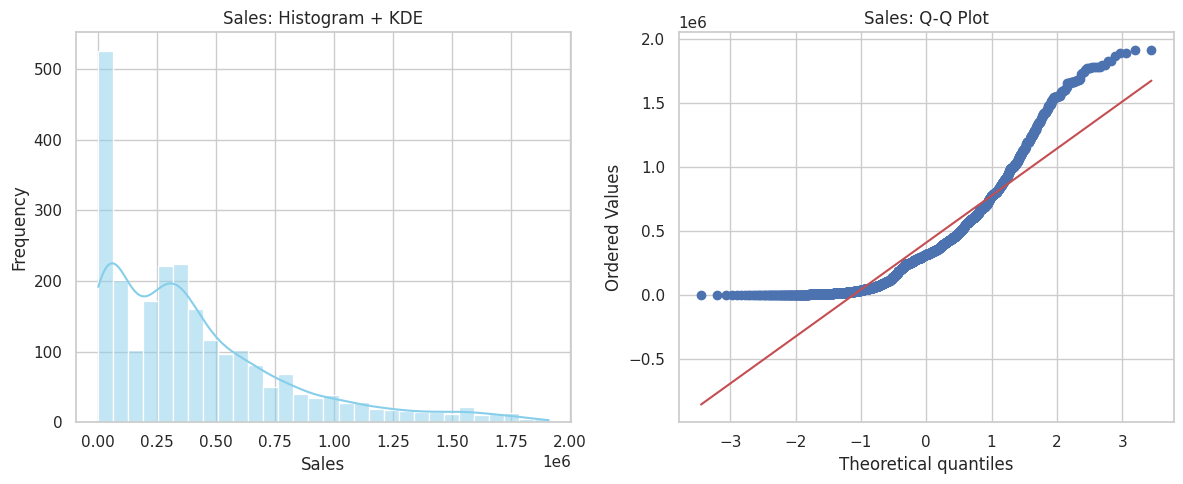

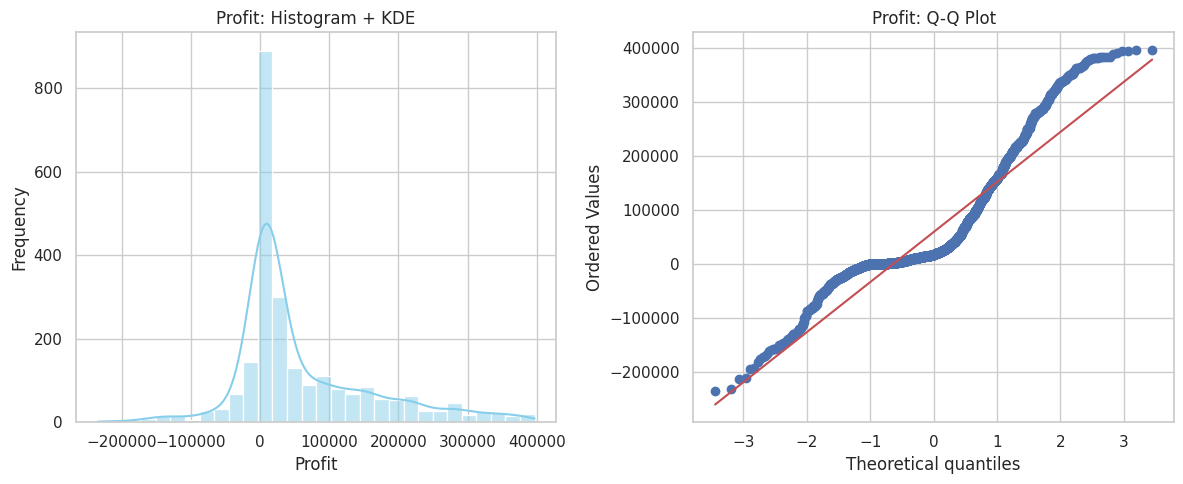

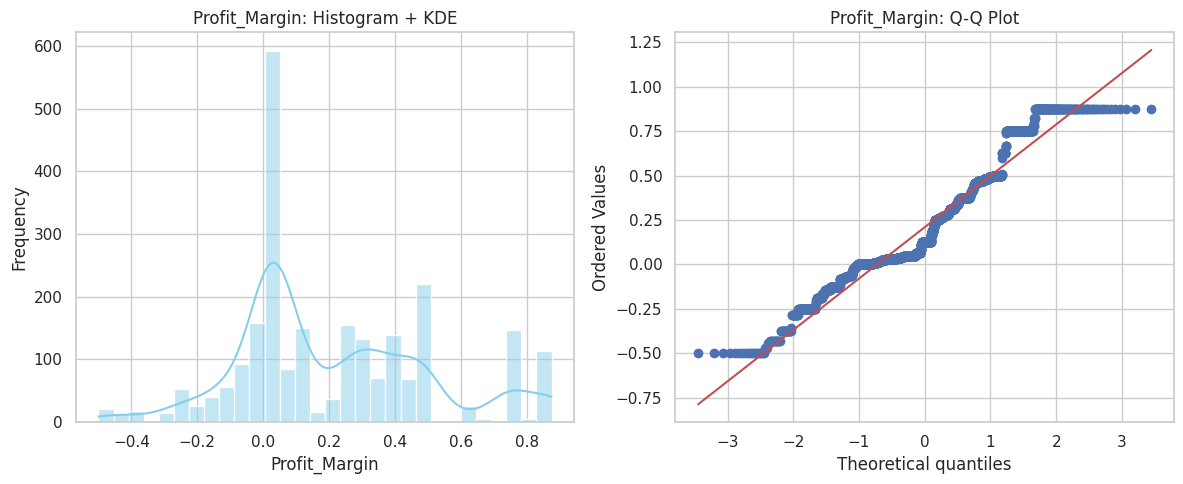

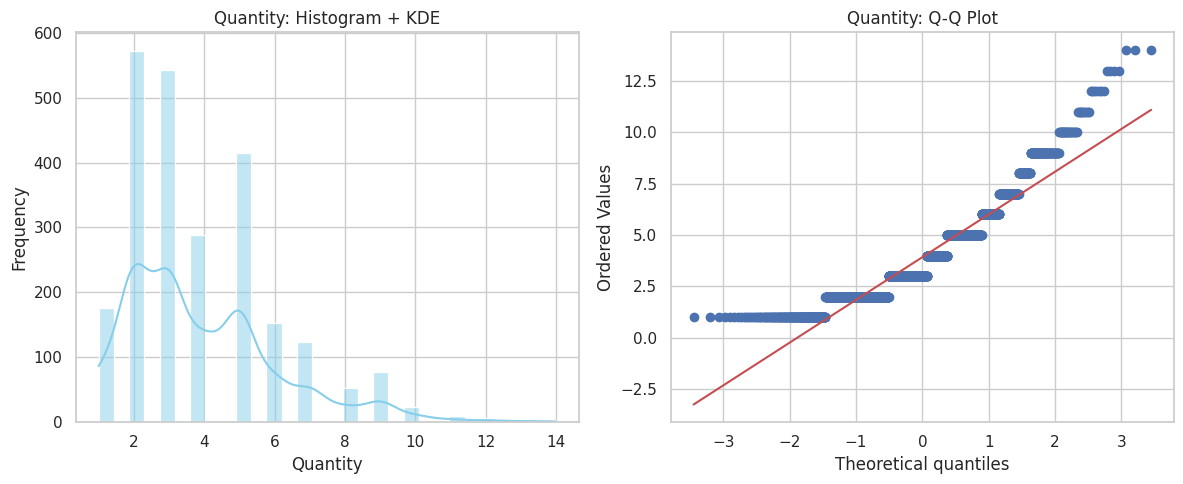

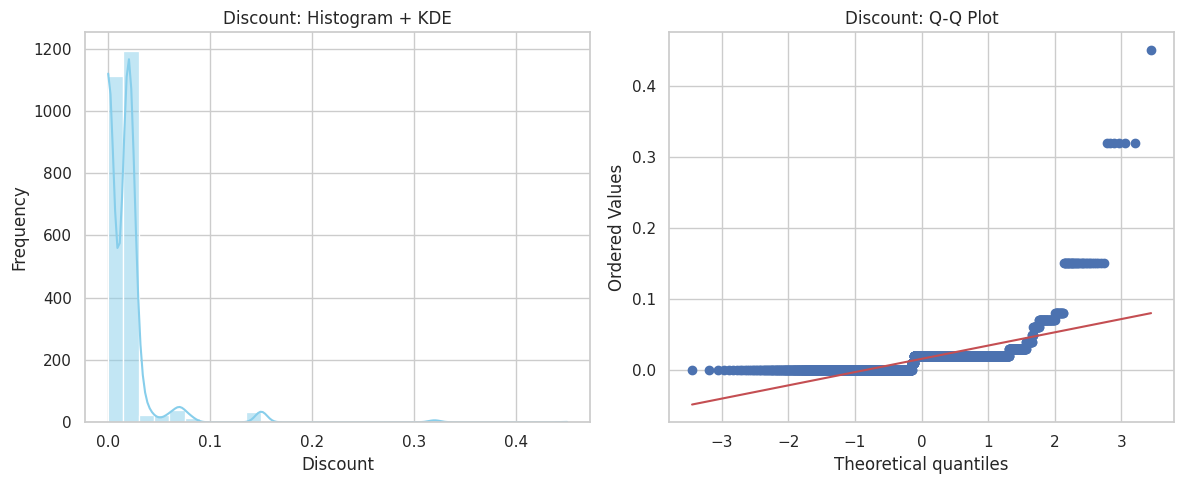

In [ ]:
from scipy.stats import shapiro, anderson
import scipy.stats as stats


columns_to_test = ["Sales", "Profit", "Profit_Margin", "Quantity", "Discount"]
results = []

for col in columns_to_test:
    values = data[col].dropna()

    # Shapiro-Wilk
    shapiro_stat, shapiro_p = shapiro(values)
    shapiro_result = "✅ Normal" if shapiro_p > 0.05 else "❌ Not Normal"

    # Anderson-Darling
    ad_result = anderson(values, dist='norm')
    ad_stat = ad_result.statistic

    # Interpret Anderson at multiple significance levels
    ad_decisions = {}
    for sig_level, crit_val in zip(ad_result.significance_level, ad_result.critical_values):
        ad_decisions[f"{int(sig_level)}%"] = "✅ Normal" if ad_stat < crit_val else "❌ Not Normal"

    # Add result row
    results.append({
        "Column": col,
        "Shapiro-Wilk p-value": round(shapiro_p, 4),
        "Shapiro Decision (α=0.05)": shapiro_result,
        "AD Stat": round(ad_stat, 4),
        **ad_decisions  # Expand all significance-level decisions into columns
    })

# Make a DataFrame
summary_df = pd.DataFrame(results)
print(summary_df)

# Loop again to plot each variable
for col in columns_to_test:
    values = data[col].dropna()

    plt.figure(figsize=(12, 5))

    # Plot 1: Histogram + KDE
    plt.subplot(1, 2, 1)
    sns.histplot(values, kde=True, bins=30, color='skyblue')
    plt.title(f"{col}: Histogram + KDE")
    plt.xlabel(col)
    plt.ylabel("Frequency")

    # Plot 2: Q-Q Plot
    plt.subplot(1, 2, 2)
    stats.probplot(values, dist="norm", plot=plt)
    plt.title(f"{col}: Q-Q Plot")

    plt.tight_layout()
    plt.show()


*📝 Based on the Shapiro-wilk and Anderson test, this data is ***not*** normally distributed across all levels of significance.*

##2.2. Understanding customers

**Phase #1: Understanding customers / industries / segments / locations / time trends based on profit, sales, profit_margin, and quantity**
1. A pie chart to visualize the share of each category
2. Descriptive statsitics to see which category has the highest or lowest median (median is used instead of mean because the data is not normally distributed)
3. A boxplot to observe the spread of the data (are there any outliers?)
4. A countplot to observe the top categories

Recall the data dictionary:

| Group         | Field         | Description                                                   |
|---------------|---------------|---------------------------------------------------------------|
| **Customer**   | Contact Name  | The name of the person who placed the order                   |
|               | Customer      | The name of the company that placed the order                 |
|               | Customer ID   | A unique identifier for each customer                         |
|               | Industry      | The industry the customer belongs to                          |
|               | Segment       | The customer segment (SMB, Strategic, Enterprise, etc.)       |



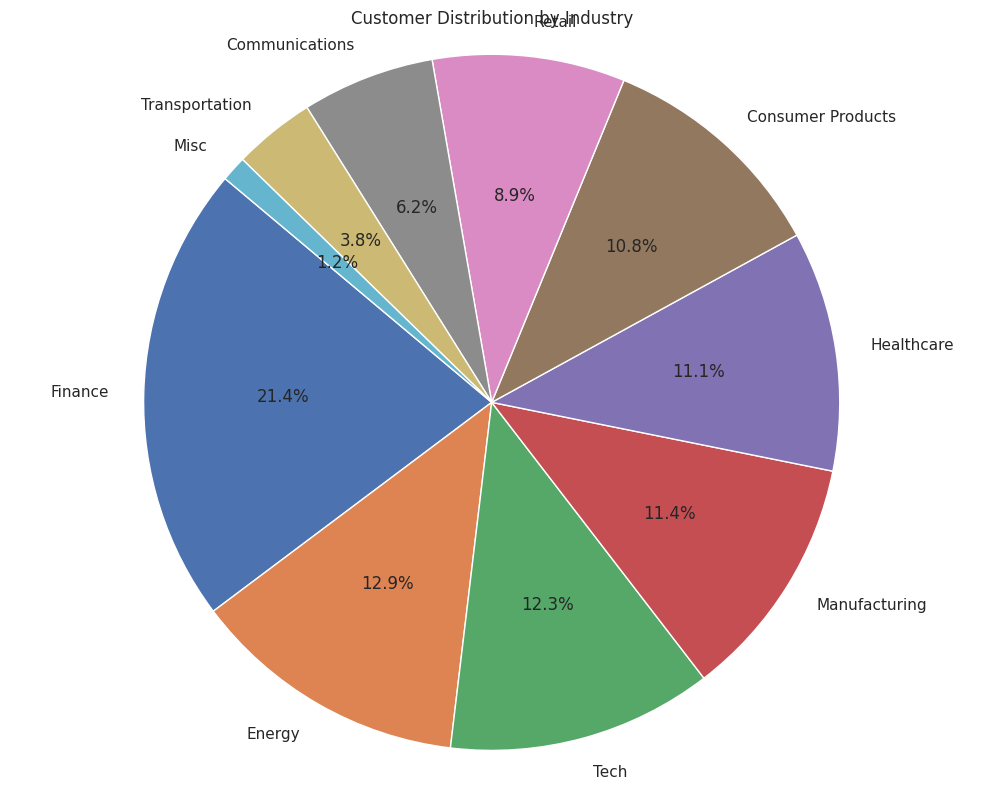


Industry: Communications
• AT&T
• Comcast
• Sprint Nextel
• Verizon Communications
• Walt Disney

Industry: Consumer Products
• Coca-Cola
• McKesson
• Mondelez International
• Nestle
• PepsiCo
• Philip Morris International
• Procter & Gamble
• Sysco
• Tyson Foods

Industry: Energy
• Chevron
• China National Petroleum
• ConocoPhillips
• Enel
• Engie
• Exxon Mobil
• Gazprom
• Lukoil
• Marathon Petroleum
• Pemex
• Petrobras
• Phillips 66
• Royal Dutch Shell
• Valero Energy

Industry: Finance
• Allianz
• Allstate
• American Express
• Aviva
• BNP Paribas
• Banco Santander
• Bank of America Corp.
• Berkshire Hathaway
• Citigroup
• Fannie Mae
• General Electric
• Goldman Sachs Group
• HSBC Holdings
• Itochu
• J.P. Morgan Chase & Co.
• Morgan Stanley
• Prudential Financial
• State Farm Insurance Cos.
• Trafigura Group
• Wells Fargo

Industry: Healthcare
• Abbott Laboratories
• Aetna
• AmerisourceBergen
• Anthem
• Cigna
• Humana
• Johnson & Johnson
• Merck
• Pfizer
• UnitedHealth Group

Indust

In [ ]:
# ----- Pie Chart -----
industry_counts = data['Industry'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(industry_counts, labels=industry_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Customer Distribution by Industry")
plt.axis('equal')
plt.tight_layout()
plt.show()

# ----- Grouped Customer List by Industry -----
grouped_customers = data.groupby('Industry')['Customer'].unique()

for industry, customers in grouped_customers.items():
    print(f"\nIndustry: {industry}")
    print("• " + "\n• ".join(sorted(customers)))


Highest and Lowest Performing Customers:

Highest sales: Allianz ($19,731,958)
Lowest sales: Citigroup ($1,426,765)



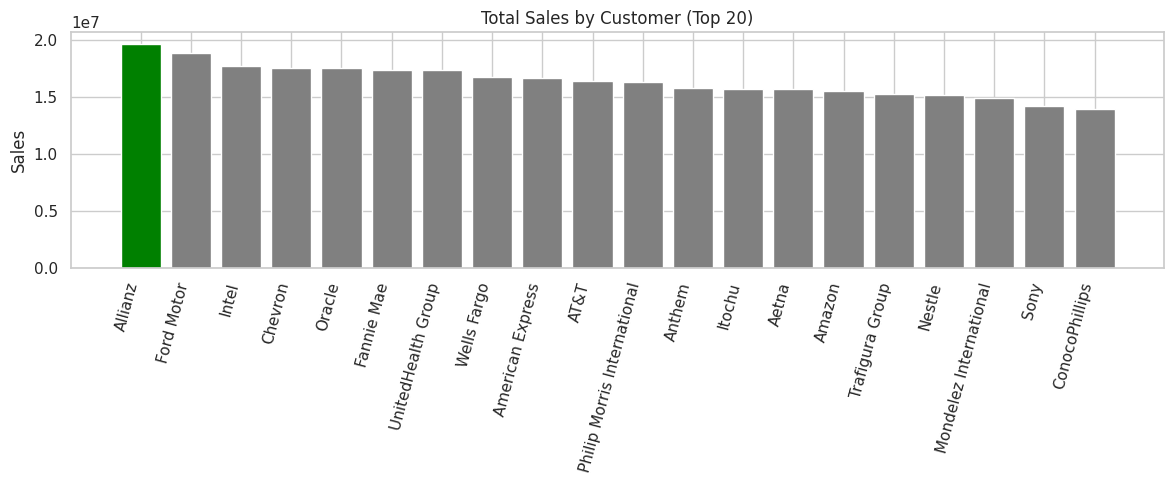

Highest profit: Chevron ($3,657,116)
Lowest profit: Exxon Mobil ($219,855)



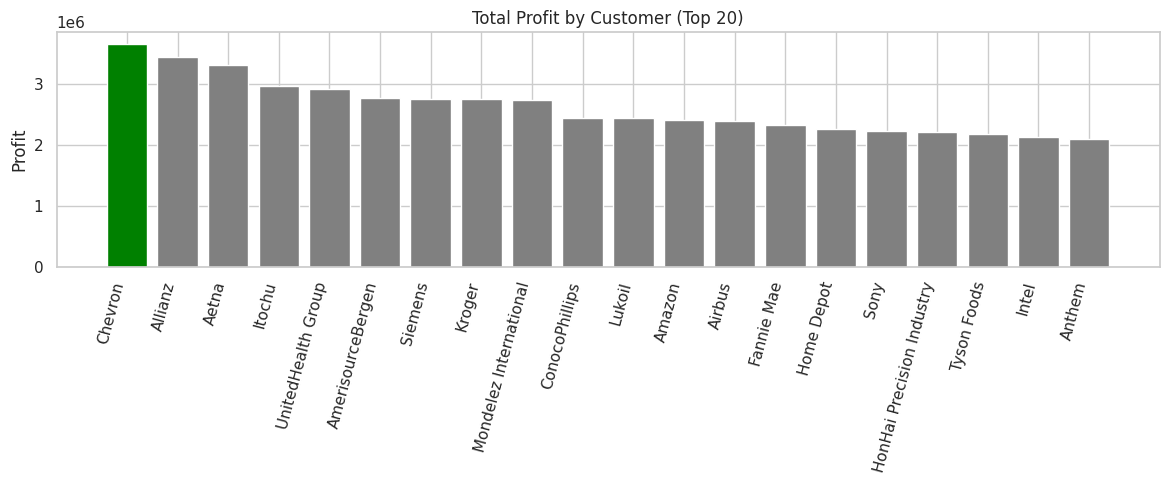

Highest profit margin: Citigroup (0.34)
Lowest profit margin: Enel (0.06)



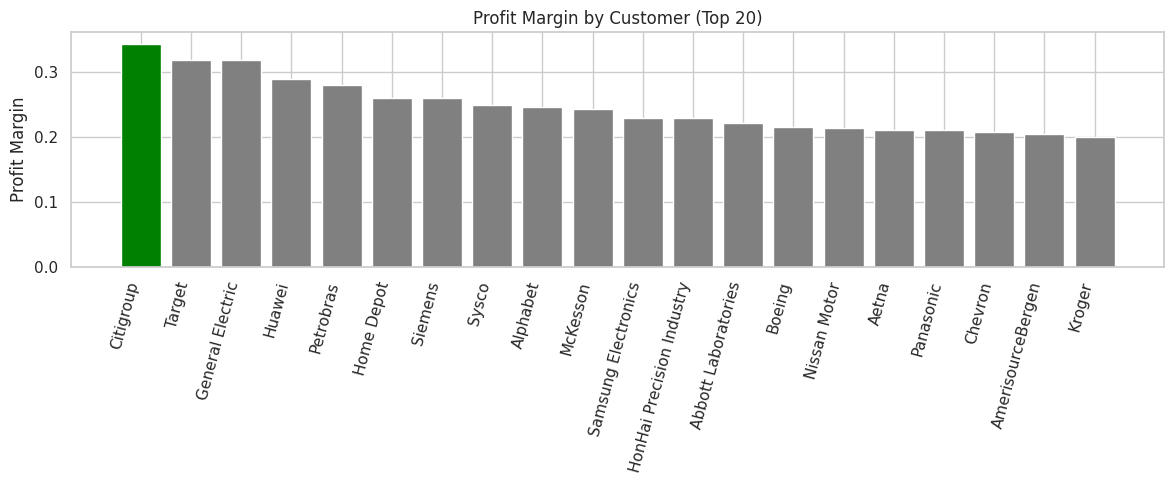

In [ ]:
# Aggregate by Customer
customer_summary = data.groupby("Customer").agg({
    "Sales": "sum",
    "Profit": "sum"
})
customer_summary["Profit_Margin"] = customer_summary["Profit"] / customer_summary["Sales"]

# Prepare display
print("\nHighest and Lowest Performing Customers:\n")

# Plot setup
metrics = ["Sales", "Profit", "Profit_Margin"]
titles = {
    "Sales": "Total Sales by Customer",
    "Profit": "Total Profit by Customer",
    "Profit_Margin": "Profit Margin by Customer"
}

for metric in metrics:
    # Identify highest and lowest
    highest_customer = customer_summary[metric].idxmax()
    highest_value = customer_summary[metric].max()

    lowest_customer = customer_summary[metric].idxmin()
    lowest_value = customer_summary[metric].min()

    # Print insight
    if metric == "Profit_Margin":
        print(f"Highest {metric.replace('_', ' ').lower()}: {highest_customer} ({highest_value:.2f})")
        print(f"Lowest {metric.replace('_', ' ').lower()}: {lowest_customer} ({lowest_value:.2f})\n")
    else:
        print(f"Highest {metric.lower()}: {highest_customer} (${highest_value:,.0f})")
        print(f"Lowest {metric.lower()}: {lowest_customer} (${lowest_value:,.0f})\n")

    # --- Visualization ---
    sorted_metric = customer_summary.sort_values(by=metric, ascending=False).head(20)
    bar_colors = ['green' if idx == highest_customer else
                  'red' if idx == lowest_customer else 'gray'
                  for idx in sorted_metric.index]

    plt.figure(figsize=(12, 5))
    plt.bar(sorted_metric.index, sorted_metric[metric], color=bar_colors)
    plt.title(f"{titles[metric]} (Top 20)")
    plt.ylabel(metric.replace("_", " "))
    plt.xticks(rotation=75, ha='right')
    plt.tight_layout()
    plt.show()

### 2.1.1 Understanding segments

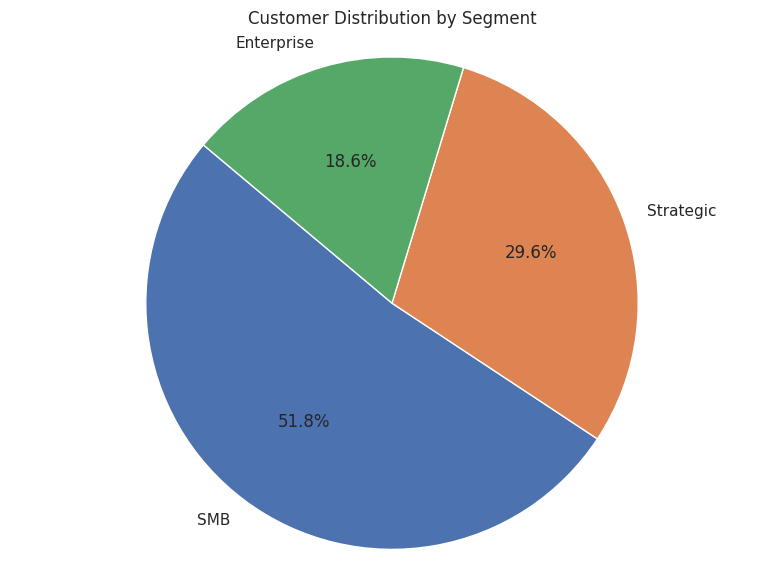


Segment: Enterprise
• AT&T
• Abbott Laboratories
• Airbus
• Allstate
• AmerisourceBergen
• Anthem
• Apple
• BMW
• Banco Santander
• Bank of America Corp.
• Boeing
• CVS Health
• Carrefour
• Caterpillar
• China National Petroleum
• Cisco Systems
• Citigroup
• Comcast
• Costco Wholesale
• Daimler
• Enel
• Exxon Mobil
• Fannie Mae
• FedEx
• Ford Motor
• Gazprom
• General Motors
• Glencore
• Home Depot
• HonHai Precision Industry
• Huawei
• Intel
• Itochu
• J.P. Morgan Chase & Co.
• Johnson & Johnson
• Kroger
• Lowes
• Lukoil
• Marathon Petroleum
• Merck
• Microsoft
• Mitsubishi
• Nestle
• News Corp.
• Nissan Motor
• Oracle
• Panasonic
• Pemex
• Pfizer
• Philip Morris International
• Phillips 66
• Prudential Financial
• Royal Dutch Shell
• Safeway
• Samsung Electronics
• Siemens
• Sony
• Sprint Nextel
• State Farm Insurance Cos.
• Sysco
• Tesco
• Toyota Motor
• Trafigura Group
• United Parcel Service
• UnitedHealth Group
• Valero Energy
• Volkswagen
• Walgreens
• Walmart
• Walt Disney
• W

In [ ]:
# ----- Pie Chart: Customer Distribution by Segment -----
segment_counts = data['Segment'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Customer Distribution by Segment")
plt.axis('equal')
plt.tight_layout()
plt.show()

# ----- Grouped Customer List by Segment -----
grouped_customers_by_segment = data.groupby('Segment')['Customer'].unique()

for segment, customers in grouped_customers_by_segment.items():
    print(f"\nSegment: {segment}")
    print("• " + "\n• ".join(sorted(customers)))


In [ ]:
# Define metrics and aggregation functions
metrics = ["Sales", "Profit", "Profit_Margin", "Quantity", "Discount"]
agg_funcs = ["count", "mean", "std", "min", "median", "max"]

# Compute descriptive statistics
segment_stats_clean = data.groupby("Segment")[metrics].agg(agg_funcs).round(2)

# Flatten MultiIndex columns
segment_stats_clean.columns = ['_'.join(col).strip() for col in segment_stats_clean.columns.values]

# Display full output
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
print(segment_stats_clean)

# Summary insights for mean and median
for metric in ["Sales", "Profit", "Profit_Margin", "Quantity"]:
    for stat in ["median"]:
        col = f"{metric}_{stat}"
        max_segment = segment_stats_clean[col].idxmax()
        min_segment = segment_stats_clean[col].idxmin()
        max_value = segment_stats_clean[col].max()
        min_value = segment_stats_clean[col].min()

        print(f"\nThe segment with the highest {metric.lower()} {stat} is {max_segment} ({max_value:,}).")
        print(f"The segment with the lowest {metric.lower()} {stat} is {min_segment} ({min_value:,}).")

            Sales_count  Sales_mean  Sales_std  Sales_min  Sales_median  \
Segment                                                                   
Enterprise          455   426785.10  395594.00      100.0      320400.0   
SMB                1269   413765.37  399694.04       40.0      320400.0   
Strategic           725   392971.79  381985.96       74.0      310500.0   

            Sales_max  Profit_count  Profit_mean  Profit_std  Profit_min  \
Segment                                                                    
Enterprise  1910600.0           455     59044.28   100991.74   -212136.0   
SMB         1890700.0          1269     58480.75   100440.20   -234882.0   
Strategic   1861500.0           725     62389.06    98715.80   -192588.0   

            Profit_median  Profit_max  Profit_Margin_count  \
Segment                                                      
Enterprise        18604.0    396879.0                  455   
SMB               17334.0    395200.0                 126

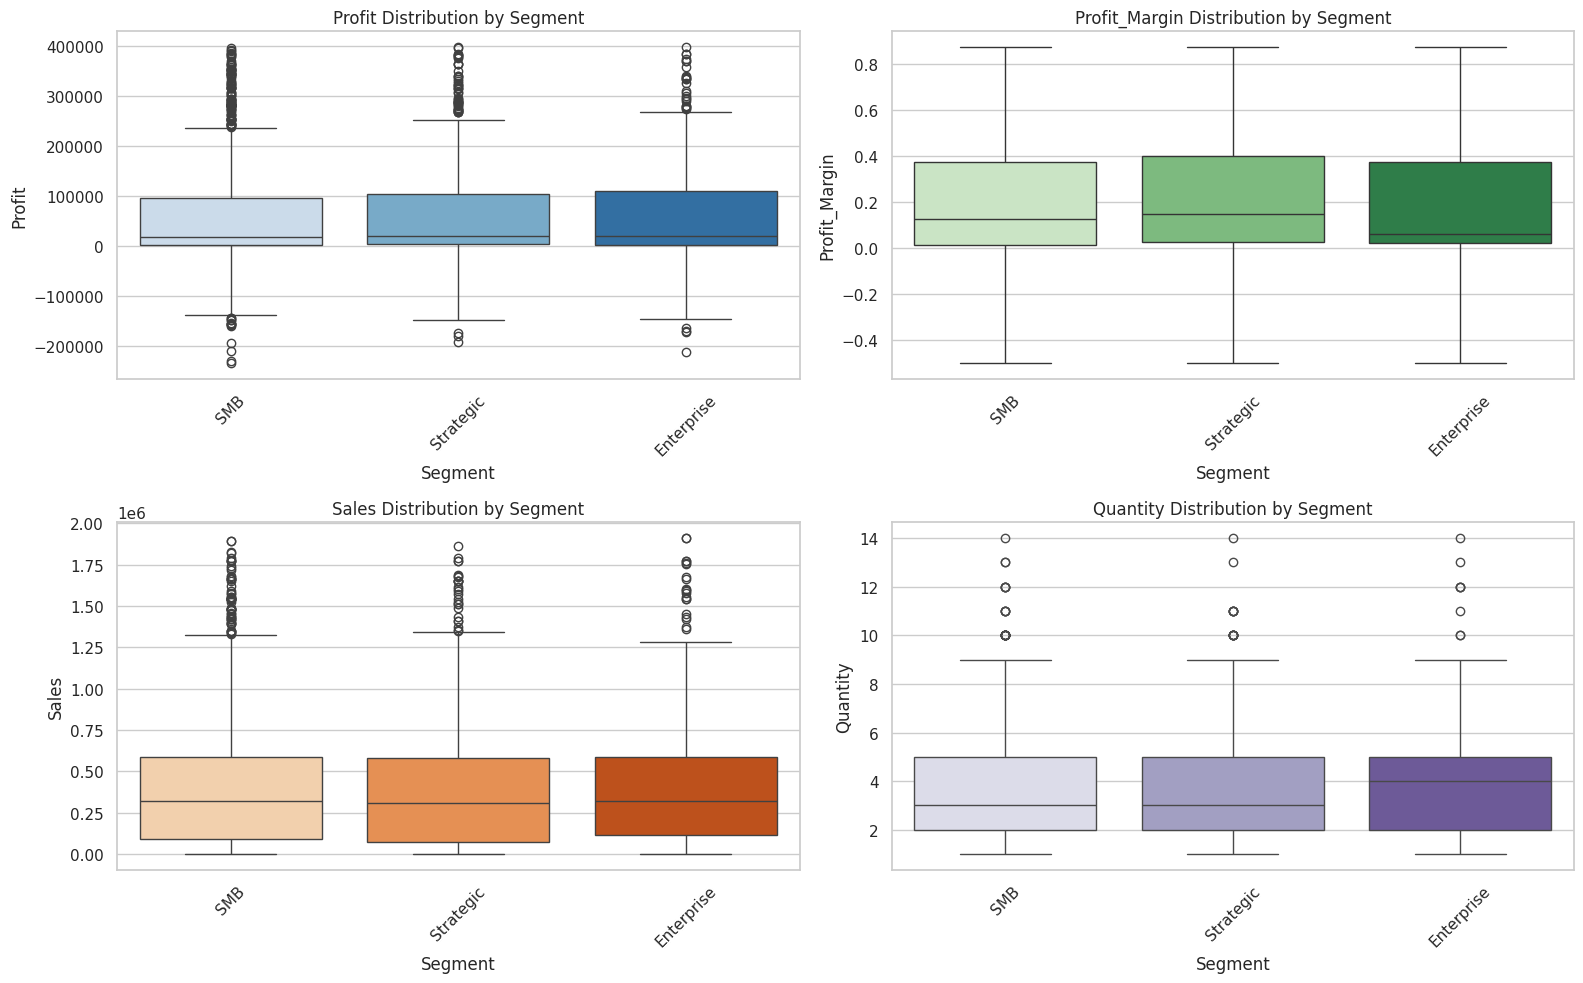


Segment-Level Boxplot Insights:

Metric: Profit
Segment with highest median Profit: Strategic (19,692.00)
Segment with lowest median Profit: SMB (17,334.00)
Outlier counts:
   - Enterprise: 28 outliers
   - SMB: 114 outliers
   - Strategic: 50 outliers

Metric: Profit_Margin
Segment with highest median Profit_Margin: Strategic (0.15)
Segment with lowest median Profit_Margin: Enterprise (0.06)
Outlier counts:
   - Enterprise: 0 outliers
   - SMB: 0 outliers
   - Strategic: 0 outliers

Metric: Sales
Segment with highest median Sales: Enterprise (320,400.00)
Segment with lowest median Sales: Strategic (310,500.00)
Outlier counts:
   - Enterprise: 20 outliers
   - SMB: 60 outliers
   - Strategic: 26 outliers

Metric: Quantity
Segment with highest median Quantity: Enterprise (4.00)
Segment with lowest median Quantity: SMB (3.00)
Outlier counts:
   - Enterprise: 8 outliers
   - SMB: 25 outliers
   - Strategic: 15 outliers


In [ ]:
# Metrics to analyze
metrics = ["Profit", "Profit_Margin", "Sales", "Quantity"]
colors = ["Blues", "Greens", "Oranges", "Purples"]

# Create 2x2 boxplot layout
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    sns.boxplot(data=data, x="Segment", y=metric, hue="Segment", palette=colors[i], legend=False, ax=axes[i])
    axes[i].set_title(f"{metric} Distribution by Segment")
    axes[i].set_ylabel(metric)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Generate and print insights
print("\nSegment-Level Boxplot Insights:")

for metric in metrics:
    print(f"\nMetric: {metric}")

    # Group by Segment
    grouped = data.groupby("Segment")[metric]

    # Compute medians
    medians = grouped.median()

    # Compute IQR
    iqr = grouped.quantile(0.75) - grouped.quantile(0.25)

    # Count outliers per segment
    outliers = data.groupby("Segment")[metric].apply(
        lambda x: ((x < (x.quantile(0.25) - 1.5 * iqr[x.name])) |
                   (x > (x.quantile(0.75) + 1.5 * iqr[x.name]))).sum()
    )

    # Highest and lowest median
    highest = medians.idxmax()
    lowest = medians.idxmin()
    print(f"Segment with highest median {metric}: {highest} ({medians[highest]:,.2f})")
    print(f"Segment with lowest median {metric}: {lowest} ({medians[lowest]:,.2f})")

    # Outlier count
    print("Outlier counts:")
    for seg in outliers.index:
        print(f"   - {seg}: {outliers[seg]} outliers")

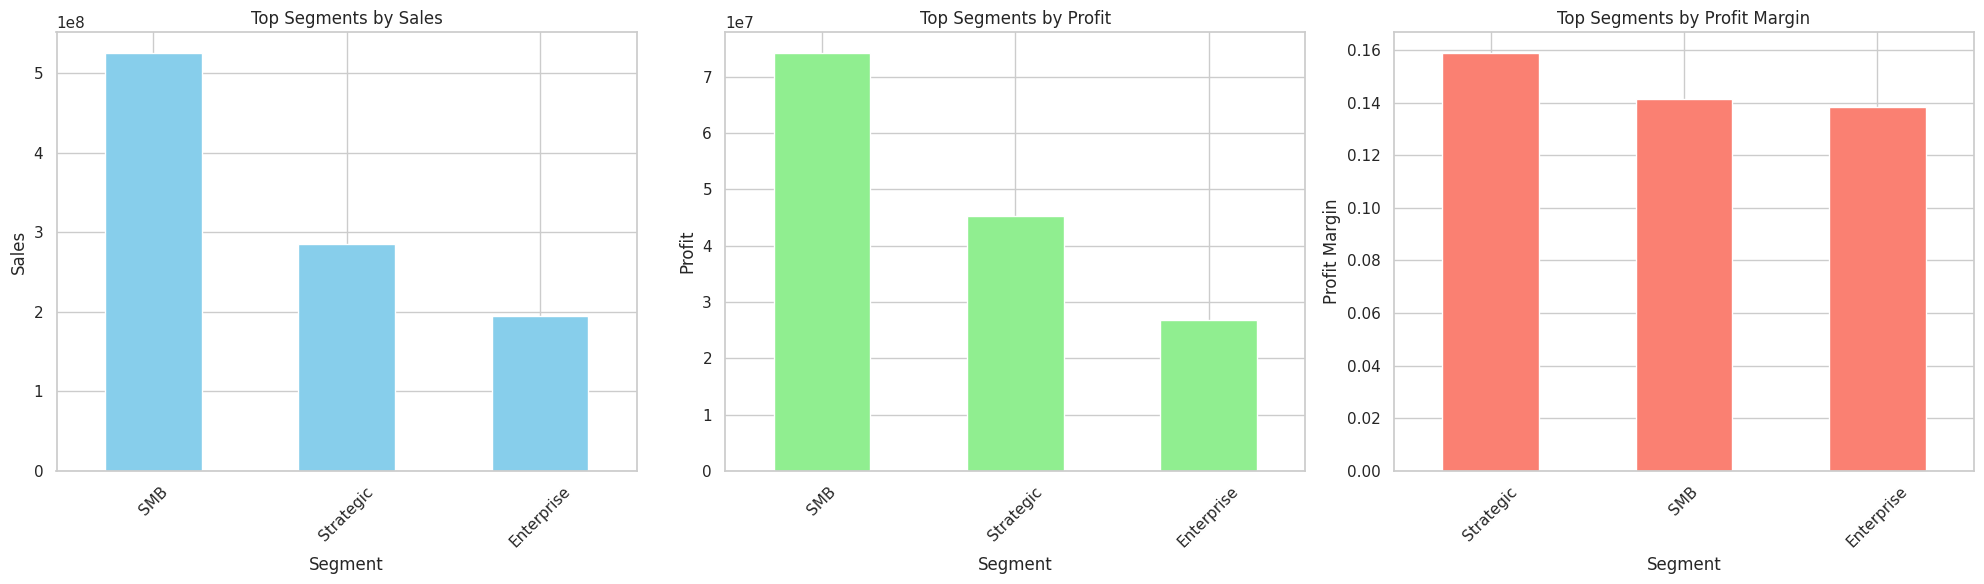


Segment-Level Performance Insights:

Segment with **highest sales: SMB ($525,068,254)
Segment with **lowest sales: Enterprise ($194,187,220)

Segment with **highest profit: SMB ($74,212,076)
Segment with **lowest profit: Enterprise ($26,865,149)

Segment with **highest profit_margin: Strategic (0.16)
Segment with **lowest profit_margin: Enterprise (0.14)


In [ ]:
# Group and aggregate by Segment
segment_summary = data.groupby("Segment").agg({
    "Sales": "sum",
    "Profit": "sum"
})
segment_summary["Profit_Margin"] = segment_summary["Profit"] / segment_summary["Sales"]

# Sort top segments
top10_sales = segment_summary.sort_values(by="Sales", ascending=False).head(10)
top10_profit = segment_summary.sort_values(by="Profit", ascending=False).head(10)
top10_margin = segment_summary.sort_values(by="Profit_Margin", ascending=False).head(10)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Sales
top10_sales["Sales"].plot(kind="bar", ax=axes[0], color='skyblue')
axes[0].set_title("Top Segments by Sales")
axes[0].set_ylabel("Sales")
axes[0].tick_params(axis='x', rotation=45)

# Profit
top10_profit["Profit"].plot(kind="bar", ax=axes[1], color='lightgreen')
axes[1].set_title("Top Segments by Profit")
axes[1].set_ylabel("Profit")
axes[1].tick_params(axis='x', rotation=45)

# Profit Margin
top10_margin["Profit_Margin"].plot(kind="bar", ax=axes[2], color='salmon')
axes[2].set_title("Top Segments by Profit Margin")
axes[2].set_ylabel("Profit Margin")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# ----- Insight Generation -----
print("\nSegment-Level Performance Insights:")

for metric in ["Sales", "Profit", "Profit_Margin"]:
    highest_segment = segment_summary[metric].idxmax()
    lowest_segment = segment_summary[metric].idxmin()
    highest_value = segment_summary[metric].max()
    lowest_value = segment_summary[metric].min()

    if metric == "Profit_Margin":
        print(f"\nSegment with **highest {metric.lower()}: {highest_segment} ({highest_value:.2f})")
        print(f"Segment with **lowest {metric.lower()}: {lowest_segment} ({lowest_value:.2f})")
    else:
        print(f"\nSegment with **highest {metric.lower()}: {highest_segment} (${highest_value:,.0f})")
        print(f"Segment with **lowest {metric.lower()}: {lowest_segment} (${lowest_value:,.0f})")


### 2.1.1 Understanding industries

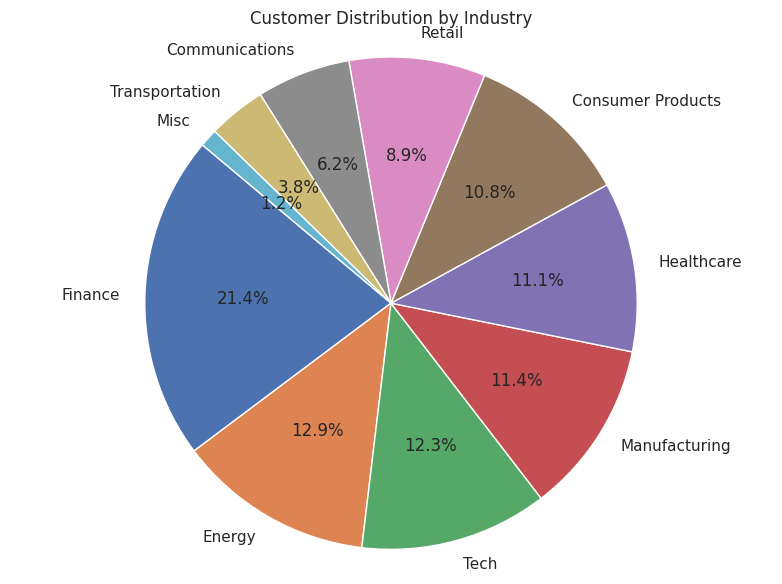


Industry: Communications
• AT&T
• Comcast
• Sprint Nextel
• Verizon Communications
• Walt Disney

Industry: Consumer Products
• Coca-Cola
• McKesson
• Mondelez International
• Nestle
• PepsiCo
• Philip Morris International
• Procter & Gamble
• Sysco
• Tyson Foods

Industry: Energy
• Chevron
• China National Petroleum
• ConocoPhillips
• Enel
• Engie
• Exxon Mobil
• Gazprom
• Lukoil
• Marathon Petroleum
• Pemex
• Petrobras
• Phillips 66
• Royal Dutch Shell
• Valero Energy

Industry: Finance
• Allianz
• Allstate
• American Express
• Aviva
• BNP Paribas
• Banco Santander
• Bank of America Corp.
• Berkshire Hathaway
• Citigroup
• Fannie Mae
• General Electric
• Goldman Sachs Group
• HSBC Holdings
• Itochu
• J.P. Morgan Chase & Co.
• Morgan Stanley
• Prudential Financial
• State Farm Insurance Cos.
• Trafigura Group
• Wells Fargo

Industry: Healthcare
• Abbott Laboratories
• Aetna
• AmerisourceBergen
• Anthem
• Cigna
• Humana
• Johnson & Johnson
• Merck
• Pfizer
• UnitedHealth Group

Indust

In [ ]:
industry_counts = data['Industry'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(industry_counts, labels=industry_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Customer Distribution by Industry")
plt.axis('equal')
plt.tight_layout()
plt.show()

grouped_customers_by_industry = data.groupby('Industry')['Customer'].unique()
for industry, customers in grouped_customers_by_industry.items():
    print(f"\nIndustry: {industry}")
    print("• " + "\n• ".join(sorted(customers)))

In [ ]:
metrics = ["Sales", "Profit", "Profit_Margin", "Quantity", "Discount"]
agg_funcs = ["count", "mean", "std", "min", "median", "max"]

industry_stats = data.groupby("Industry")[metrics].agg(agg_funcs).round(2)
industry_stats.columns = ['_'.join(col).strip() for col in industry_stats.columns.values]

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
print("\nDescriptive Statistics by Industry:")
print(industry_stats)

print("\nMedian Insights by Industry:")
for metric in ["Sales", "Profit", "Profit_Margin", "Quantity"]:
    col = f"{metric}_median"
    max_industry = industry_stats[col].idxmax()
    min_industry = industry_stats[col].idxmin()
    print(f"\nHighest median {metric.lower()}: {max_industry} ({industry_stats[col][max_industry]:,.2f})")
    print(f"Lowest median {metric.lower()}: {min_industry} ({industry_stats[col][min_industry]:,.2f})")


Descriptive Statistics by Industry:
                   Sales_count  Sales_mean  Sales_std  Sales_min  \
Industry                                                           
Communications             151   349263.08  348822.32       75.0   
Consumer Products          265   359312.74  363336.19      100.0   
Energy                     315   409133.74  381626.18      608.0   
Finance                    523   437349.90  415590.96      100.0   
Healthcare                 273   424284.66  399981.85      914.0   
Manufacturing              279   408705.70  378759.87       74.0   
Misc                        29   508040.14  469262.65     7056.0   
Retail                     219   410048.71  426302.50       40.0   
Tech                       302   422266.29  383483.45       74.0   
Transportation              93   394359.55  405745.63      450.0   

                   Sales_median  Sales_max  Profit_count  Profit_mean  \
Industry                                                                


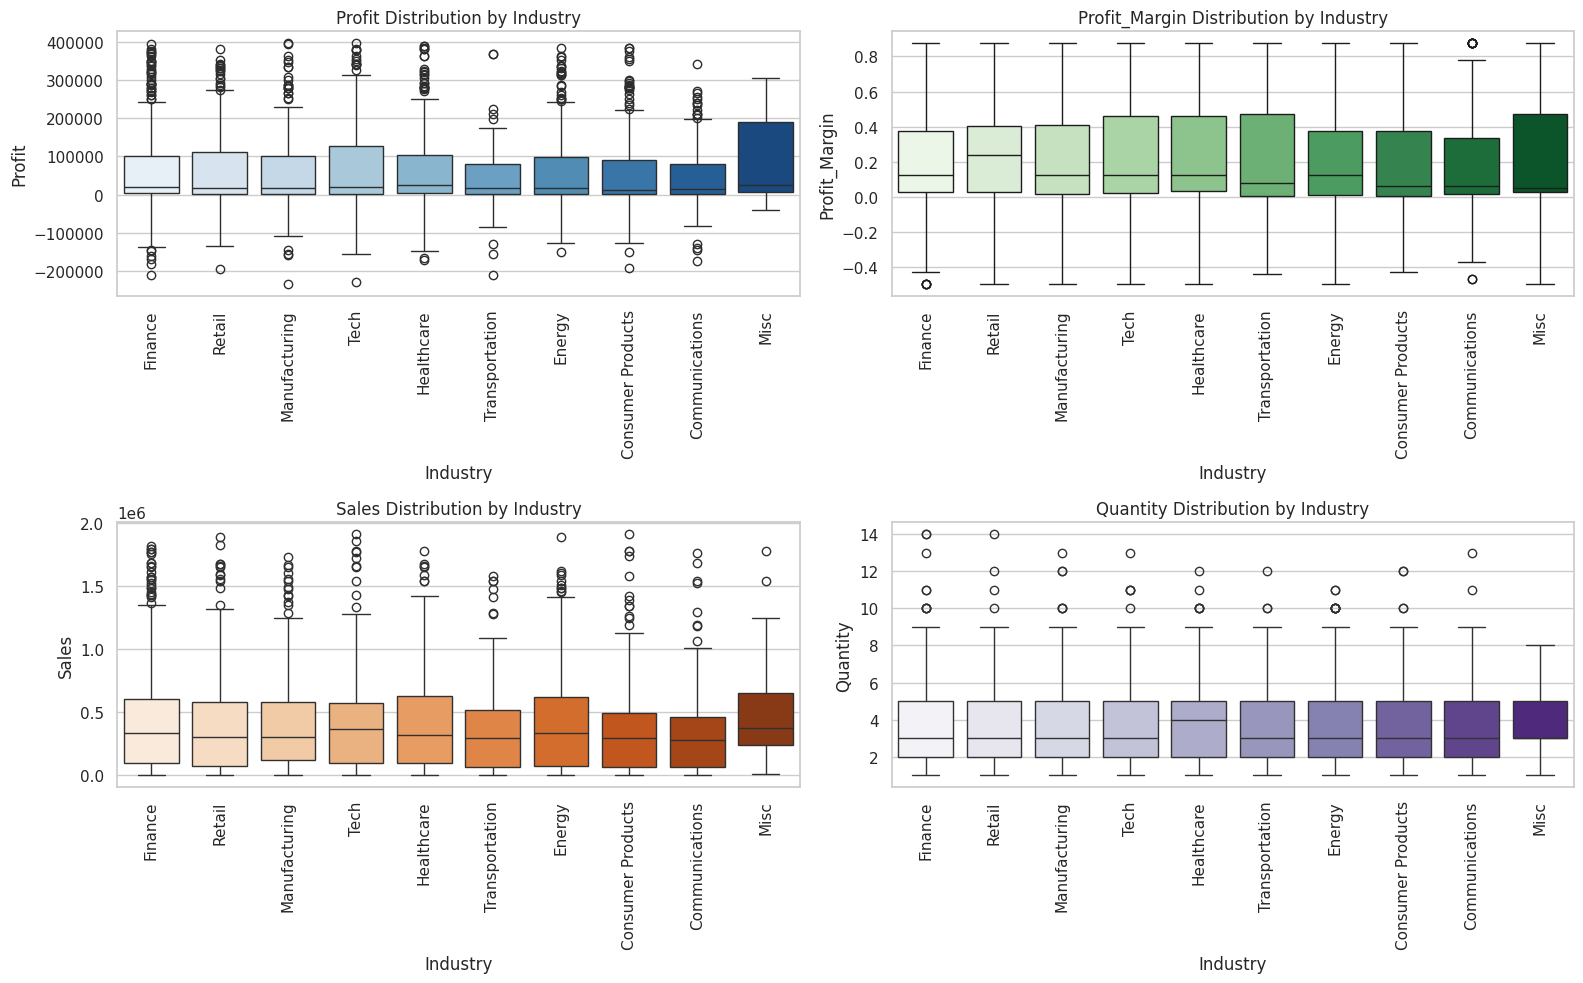


Boxplot-Based Insights by Industry:

Metric: Profit
Industry with highest median Profit: Misc (25,792.00)
Industry with lowest median Profit: Consumer Products (13,299.00)
Outlier counts:
   - Communications: 17 outliers
   - Consumer Products: 24 outliers
   - Energy: 22 outliers
   - Finance: 40 outliers
   - Healthcare: 24 outliers
   - Manufacturing: 23 outliers
   - Misc: 0 outliers
   - Retail: 17 outliers
   - Tech: 13 outliers
   - Transportation: 8 outliers

Metric: Profit_Margin
Industry with highest median Profit_Margin: Retail (0.24)
Industry with lowest median Profit_Margin: Misc (0.05)
Outlier counts:
   - Communications: 10 outliers
   - Consumer Products: 0 outliers
   - Energy: 0 outliers
   - Finance: 4 outliers
   - Healthcare: 0 outliers
   - Manufacturing: 0 outliers
   - Misc: 0 outliers
   - Retail: 0 outliers
   - Tech: 0 outliers
   - Transportation: 0 outliers

Metric: Sales
Industry with highest median Sales: Misc (375,900.00)
Industry with lowest median Sal

In [ ]:
metrics = ["Profit", "Profit_Margin", "Sales", "Quantity"]
colors = ["Blues", "Greens", "Oranges", "Purples"]

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    sns.boxplot(data=data, x="Industry", y=metric, hue="Industry", palette=colors[i], legend=False, ax=axes[i])
    axes[i].set_title(f"{metric} Distribution by Industry")
    axes[i].set_ylabel(metric)
    axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

print("\nBoxplot-Based Insights by Industry:")
for metric in metrics:
    print(f"\nMetric: {metric}")
    grouped = data.groupby("Industry")[metric]
    medians = grouped.median()
    iqr = grouped.quantile(0.75) - grouped.quantile(0.25)

    outliers = data.groupby("Industry")[metric].apply(
        lambda x: ((x < (x.quantile(0.25) - 1.5 * iqr[x.name])) |
                   (x > (x.quantile(0.75) + 1.5 * iqr[x.name]))).sum()
    )

    highest = medians.idxmax()
    lowest = medians.idxmin()
    print(f"Industry with highest median {metric}: {highest} ({medians[highest]:,.2f})")
    print(f"Industry with lowest median {metric}: {lowest} ({medians[lowest]:,.2f})")
    print("Outlier counts:")
    for ind in outliers.index:
        print(f"   - {ind}: {outliers[ind]} outliers")

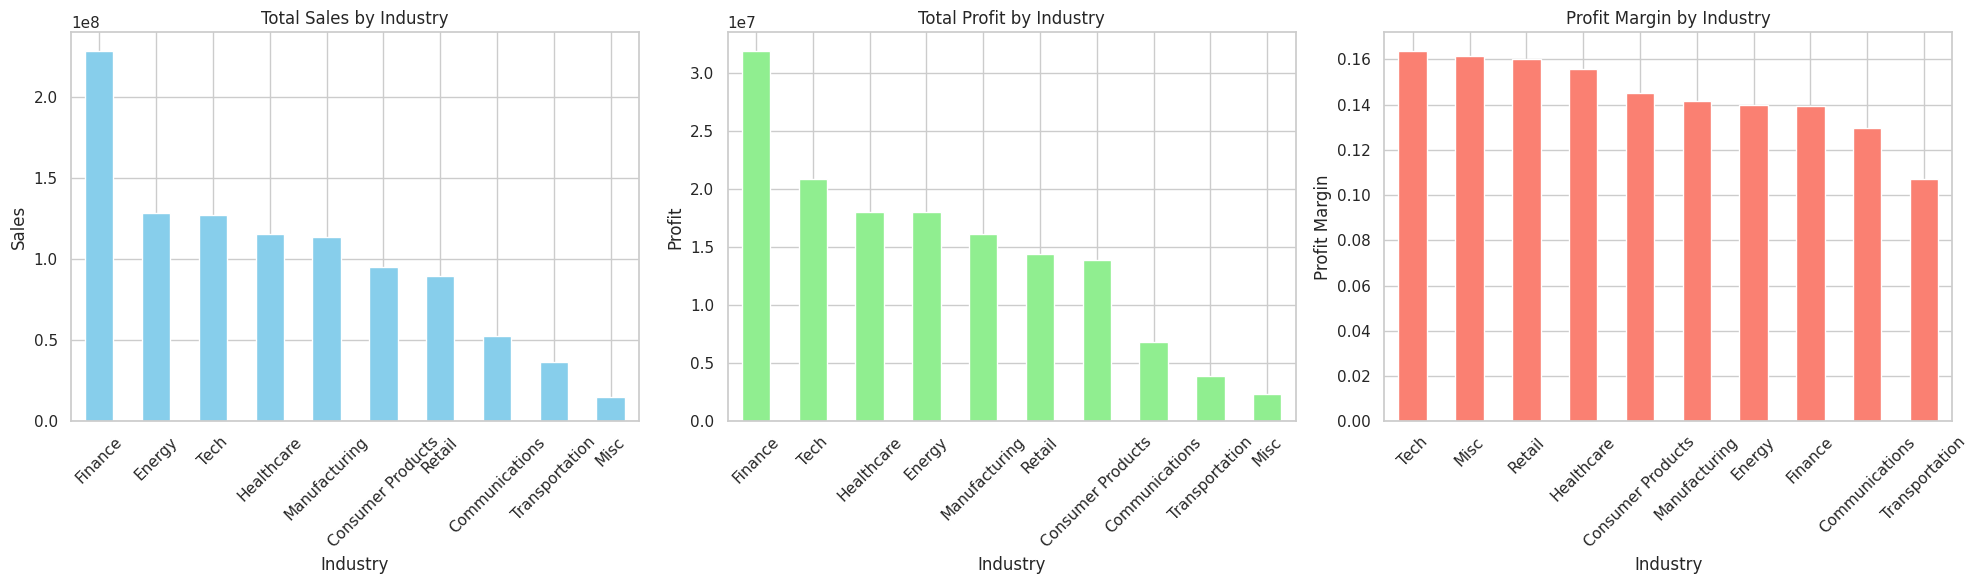


Industry-Level Performance Insights (Total):

Highest sales: Finance ($228,733,999)
Lowest sales: Misc ($14,733,164)

Highest profit: Finance ($31,882,199)
Lowest profit: Misc ($2,382,031)

Highest profit_margin: Tech (0.16)
Lowest profit_margin: Transportation (0.11)


In [ ]:
industry_summary = data.groupby("Industry").agg({
    "Sales": "sum",
    "Profit": "sum"
})
industry_summary["Profit_Margin"] = industry_summary["Profit"] / industry_summary["Sales"]

top_sales = industry_summary.sort_values(by="Sales", ascending=False)
top_profit = industry_summary.sort_values(by="Profit", ascending=False)
top_margin = industry_summary.sort_values(by="Profit_Margin", ascending=False)

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

top_sales["Sales"].plot(kind="bar", ax=axes[0], color='skyblue')
axes[0].set_title("Total Sales by Industry")
axes[0].set_ylabel("Sales")
axes[0].tick_params(axis='x', rotation=45)

top_profit["Profit"].plot(kind="bar", ax=axes[1], color='lightgreen')
axes[1].set_title("Total Profit by Industry")
axes[1].set_ylabel("Profit")
axes[1].tick_params(axis='x', rotation=45)

top_margin["Profit_Margin"].plot(kind="bar", ax=axes[2], color='salmon')
axes[2].set_title("Profit Margin by Industry")
axes[2].set_ylabel("Profit Margin")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\nIndustry-Level Performance Insights (Total):")
for metric in ["Sales", "Profit", "Profit_Margin"]:
    max_ind = industry_summary[metric].idxmax()
    min_ind = industry_summary[metric].idxmin()
    max_val = industry_summary[metric].max()
    min_val = industry_summary[metric].min()

    if metric == "Profit_Margin":
        print(f"\nHighest {metric.lower()}: {max_ind} ({max_val:.2f})")
        print(f"Lowest {metric.lower()}: {min_ind} ({min_val:.2f})")
    else:
        print(f"\nHighest {metric.lower()}: {max_ind} (${max_val:,.0f})")
        print(f"Lowest {metric.lower()}: {min_ind} (${min_val:,.0f})")

##2.3 Understanding locations

**Recall:**

| Group         | Field         | Description                                                   |
|---------------|---------------|---------------------------------------------------------------|
| **Location**   | Country       | The country where the order was placed                        |
|               | City          | The city where the order was placed                           |
|               | Region        | The region where the order was placed                         |
|               | Subregion     | The subregion where the order was placed                      |                   |

### 2.2.1. Understanding regions

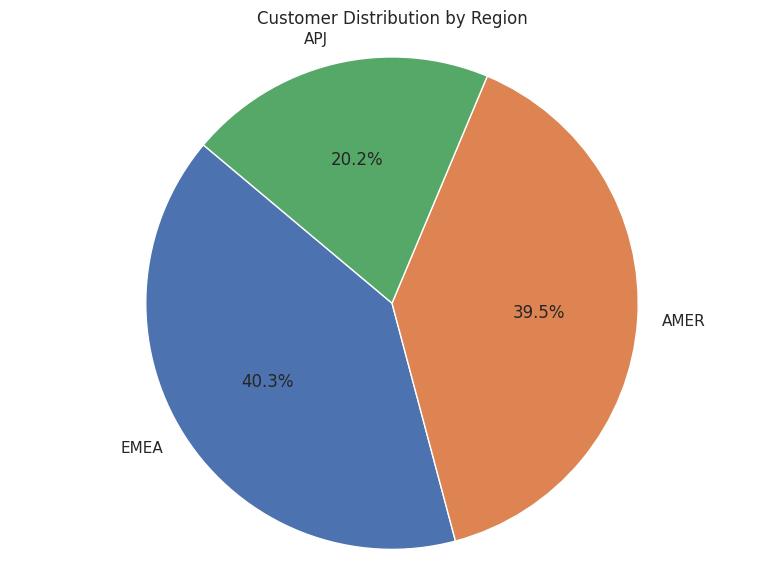


Region: AMER
• AT&T
• Abbott Laboratories
• Aetna
• Airbus
• Allianz
• Allstate
• Alphabet
• Amazon
• American Express
• AmerisourceBergen
• Anthem
• Apple
• Aviva
• BMW
• BNP Paribas
• Banco Santander
• Bank of America Corp.
• Berkshire Hathaway
• Boeing
• Bosch
• CVS Health
• Carrefour
• Caterpillar
• Chevron
• China National Petroleum
• Cigna
• Cisco Systems
• Citigroup
• Coca-Cola
• Comcast
• ConocoPhillips
• Costco Wholesale
• Daimler
• Enel
• Engie
• Exxon Mobil
• Fannie Mae
• FedEx
• Ford Motor
• Gazprom
• General Electric
• General Motors
• Glencore
• Goldman Sachs Group
• HSBC Holdings
• Home Depot
• HonHai Precision Industry
• Honda Motor
• Huawei
• Humana
• Intel
• Itochu
• J.P. Morgan Chase & Co.
• Johnson & Johnson
• Kroger
• Lowes
• Lukoil
• Marathon Petroleum
• McKesson
• Merck
• Microsoft
• Mitsubishi
• Mondelez International
• Morgan Stanley
• Nestle
• News Corp.
• Nissan Motor
• Oracle
• Panasonic
• Pemex
• PepsiCo
• Petrobras
• Pfizer
• Philip Morris International
•

In [ ]:
region_counts = data['Region'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Customer Distribution by Region")
plt.axis('equal')
plt.tight_layout()
plt.show()

grouped_customers_by_region = data.groupby('Region')['Customer'].unique()
for region, customers in grouped_customers_by_region.items():
    print(f"\nRegion: {region}")
    print("• " + "\n• ".join(sorted(customers)))

In [ ]:
metrics = ["Sales", "Profit", "Profit_Margin", "Quantity", "Discount"]
agg_funcs = ["count", "mean", "std", "min", "median", "max"]

region_stats = data.groupby("Region")[metrics].agg(agg_funcs).round(2)
region_stats.columns = ['_'.join(col).strip() for col in region_stats.columns.values]

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
print("\nDescriptive Statistics by Region:")
print(region_stats)

print("\nMedian Insights by Region:")
for metric in ["Sales", "Profit", "Profit_Margin", "Quantity"]:
    col = f"{metric}_median"
    max_region = region_stats[col].idxmax()
    min_region = region_stats[col].idxmin()
    print(f"\nHighest median {metric.lower()}: {max_region} ({region_stats[col][max_region]:,.2f})")
    print(f"Lowest median {metric.lower()}: {min_region} ({region_stats[col][min_region]:,.2f})")


Descriptive Statistics by Region:
        Sales_count  Sales_mean  Sales_std  Sales_min  Sales_median  \
Region                                                                
AMER            968   437381.32  396770.34       40.0      332350.0   
APJ             495   368531.66  399674.75       74.0      254198.0   
EMEA            986   404007.84  386130.65       50.0      320400.0   

        Sales_max  Profit_count  Profit_mean  Profit_std  Profit_min  \
Region                                                                 
AMER    1890700.0           968     68587.99   102544.48   -234882.0   
APJ     1890700.0           495     43514.76    97330.74   -194824.0   
EMEA    1910600.0           986     59205.18    97846.88   -180882.0   

        Profit_median  Profit_max  Profit_Margin_count  Profit_Margin_mean  \
Region                                                                       
AMER          24917.0    396879.0                  968                0.22   
APJ           

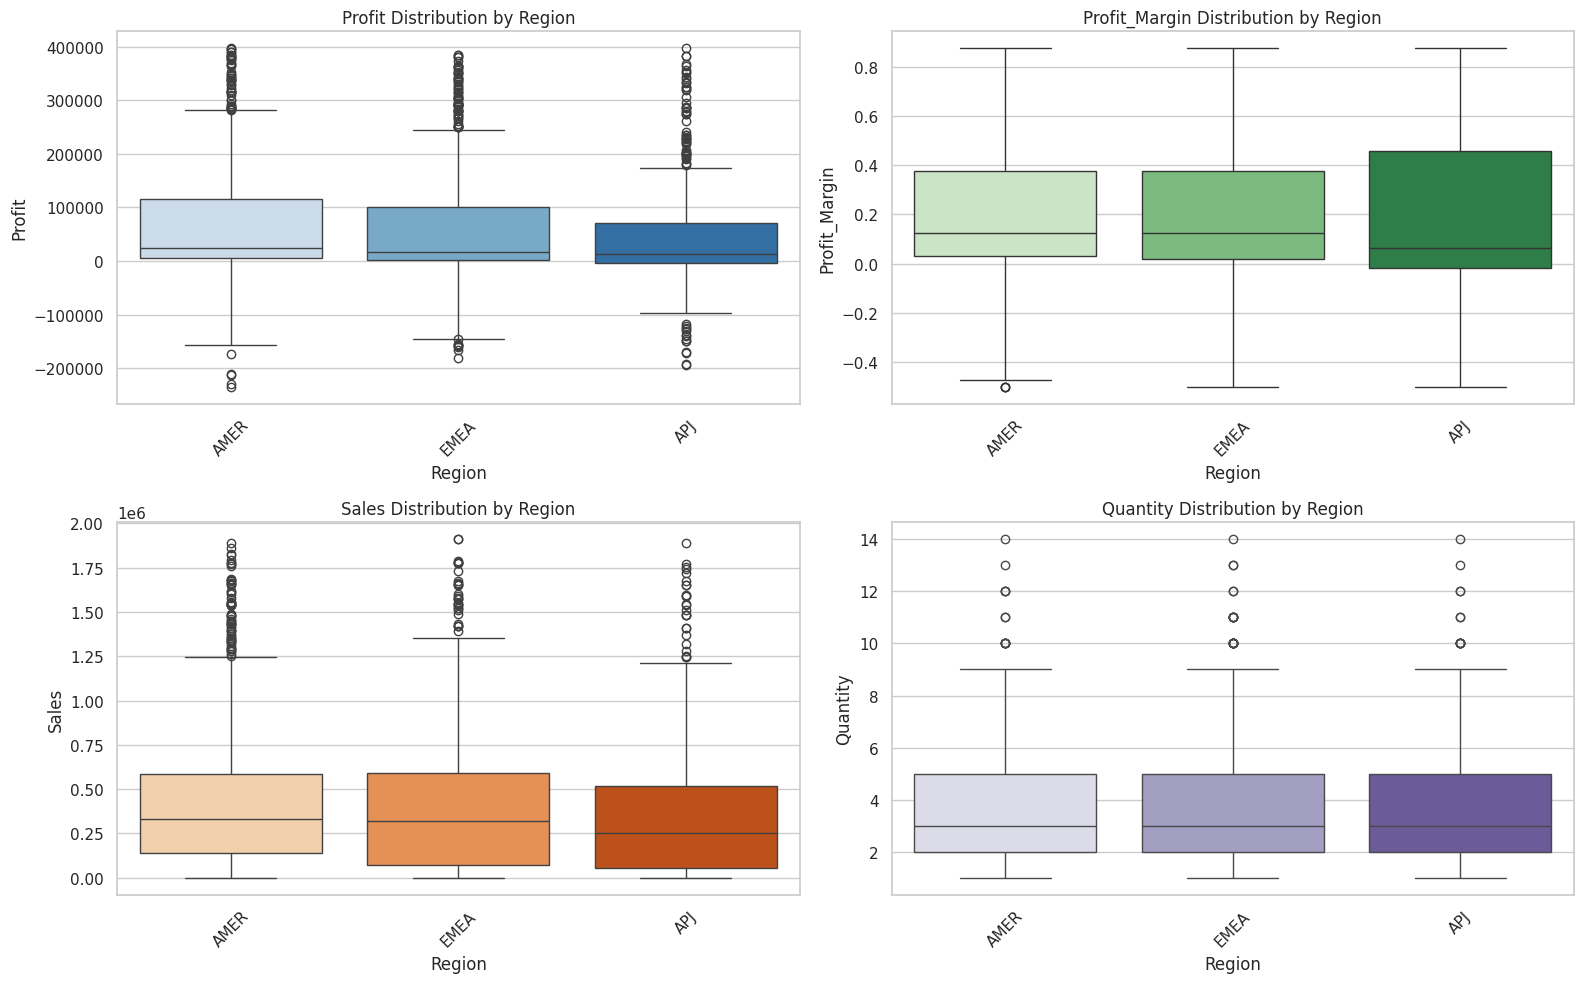


Boxplot-Based Insights by Region:

Metric: Profit
Highest median Profit: AMER (24,917.00)
Lowest median Profit: APJ (11,996.00)
Outlier counts:
   - AMER: 54 outliers
   - APJ: 65 outliers
   - EMEA: 74 outliers

Metric: Profit_Margin
Highest median Profit_Margin: AMER (0.12)
Lowest median Profit_Margin: APJ (0.06)
Outlier counts:
   - AMER: 3 outliers
   - APJ: 0 outliers
   - EMEA: 0 outliers

Metric: Sales
Highest median Sales: AMER (332,350.00)
Lowest median Sales: APJ (254,198.00)
Outlier counts:
   - AMER: 62 outliers
   - APJ: 25 outliers
   - EMEA: 31 outliers

Metric: Quantity
Highest median Quantity: AMER (3.00)
Lowest median Quantity: AMER (3.00)
Outlier counts:
   - AMER: 13 outliers
   - APJ: 13 outliers
   - EMEA: 22 outliers


In [ ]:
metrics = ["Profit", "Profit_Margin", "Sales", "Quantity"]
colors = ["Blues", "Greens", "Oranges", "Purples"]

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    sns.boxplot(data=data, x="Region", y=metric, hue="Region", palette=colors[i], legend=False, ax=axes[i])
    axes[i].set_title(f"{metric} Distribution by Region")
    axes[i].set_ylabel(metric)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\nBoxplot-Based Insights by Region:")
for metric in metrics:
    print(f"\nMetric: {metric}")
    grouped = data.groupby("Region")[metric]
    medians = grouped.median()
    iqr = grouped.quantile(0.75) - grouped.quantile(0.25)

    outliers = data.groupby("Region")[metric].apply(
        lambda x: ((x < (x.quantile(0.25) - 1.5 * iqr[x.name])) |
                   (x > (x.quantile(0.75) + 1.5 * iqr[x.name]))).sum()
    )

    highest = medians.idxmax()
    lowest = medians.idxmin()
    print(f"Highest median {metric}: {highest} ({medians[highest]:,.2f})")
    print(f"Lowest median {metric}: {lowest} ({medians[lowest]:,.2f})")
    print("Outlier counts:")
    for reg in outliers.index:
        print(f"   - {reg}: {outliers[reg]} outliers")

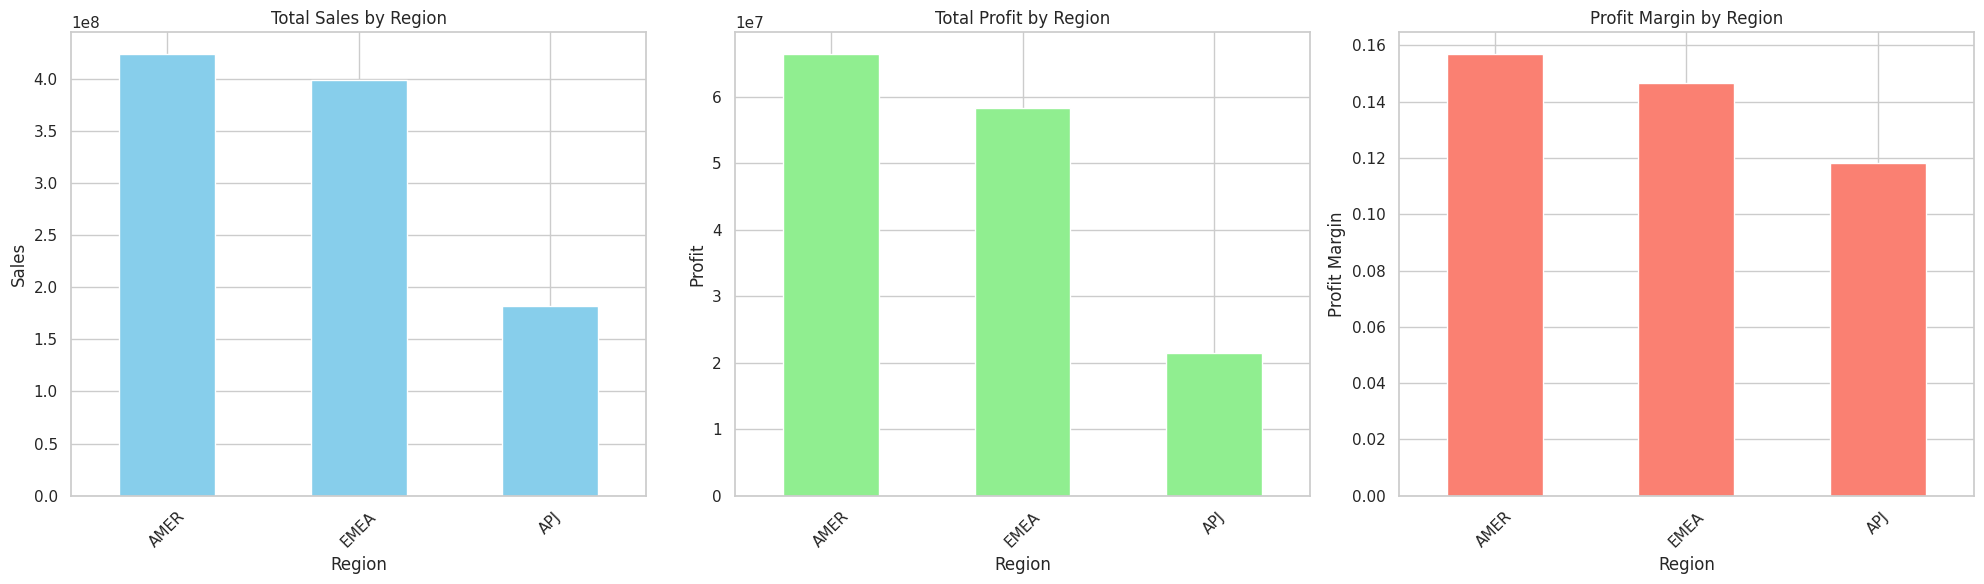


Region-Level Performance Insights (Total):

Highest sales: AMER ($423,385,118)
Lowest sales: APJ ($182,423,170)

Highest profit: AMER ($66,393,175)
Lowest profit: APJ ($21,539,807)

Highest profit_margin: AMER (0.16)
Lowest profit_margin: APJ (0.12)


In [ ]:
region_summary = data.groupby("Region").agg({
    "Sales": "sum",
    "Profit": "sum"
})
region_summary["Profit_Margin"] = region_summary["Profit"] / region_summary["Sales"]

top_sales = region_summary.sort_values(by="Sales", ascending=False)
top_profit = region_summary.sort_values(by="Profit", ascending=False)
top_margin = region_summary.sort_values(by="Profit_Margin", ascending=False)

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

top_sales["Sales"].plot(kind="bar", ax=axes[0], color='skyblue')
axes[0].set_title("Total Sales by Region")
axes[0].set_ylabel("Sales")
axes[0].tick_params(axis='x', rotation=45)

top_profit["Profit"].plot(kind="bar", ax=axes[1], color='lightgreen')
axes[1].set_title("Total Profit by Region")
axes[1].set_ylabel("Profit")
axes[1].tick_params(axis='x', rotation=45)

top_margin["Profit_Margin"].plot(kind="bar", ax=axes[2], color='salmon')
axes[2].set_title("Profit Margin by Region")
axes[2].set_ylabel("Profit Margin")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\nRegion-Level Performance Insights (Total):")
for metric in ["Sales", "Profit", "Profit_Margin"]:
    max_region = region_summary[metric].idxmax()
    min_region = region_summary[metric].idxmin()
    max_val = region_summary[metric].max()
    min_val = region_summary[metric].min()

    if metric == "Profit_Margin":
        print(f"\nHighest {metric.lower()}: {max_region} ({max_val:.2f})")
        print(f"Lowest {metric.lower()}: {min_region} ({min_val:.2f})")
    else:
        print(f"\nHighest {metric.lower()}: {max_region} (${max_val:,.0f})")
        print(f"Lowest {metric.lower()}: {min_region} (${min_val:,.0f})")

### 2.2.2. Understanding subregions

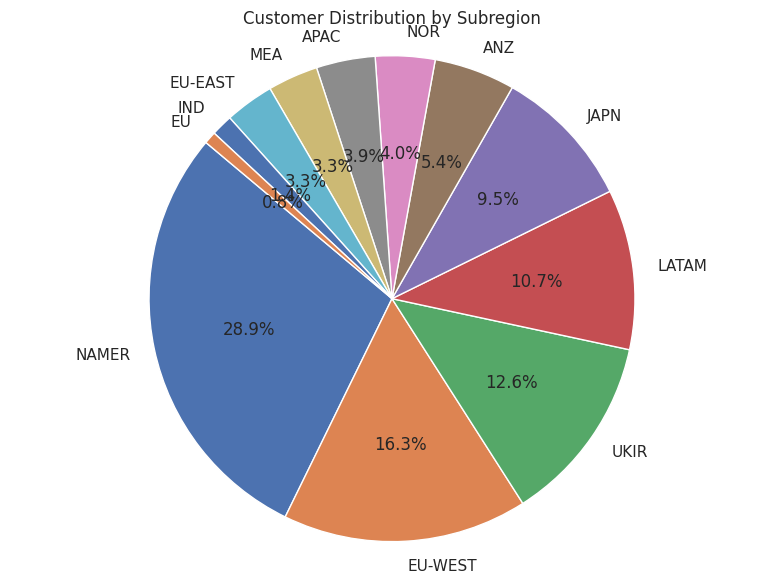


Subregion: ANZ
• AT&T
• Abbott Laboratories
• Allianz
• American Express
• AmerisourceBergen
• Anthem
• BMW
• BNP Paribas
• Banco Santander
• Boeing
• Bosch
• CVS Health
• Carrefour
• Caterpillar
• Chevron
• China National Petroleum
• Cigna
• Cisco Systems
• Coca-Cola
• Comcast
• ConocoPhillips
• Daimler
• Enel
• Engie
• Fannie Mae
• FedEx
• Ford Motor
• Gazprom
• General Electric
• General Motors
• Glencore
• Goldman Sachs Group
• HSBC Holdings
• Home Depot
• HonHai Precision Industry
• Huawei
• Intel
• Itochu
• Johnson & Johnson
• Kroger
• Lowes
• Lukoil
• McKesson
• Merck
• Mondelez International
• Morgan Stanley
• News Corp.
• Panasonic
• PepsiCo
• Petrobras
• Pfizer
• Philip Morris International
• Royal Dutch Shell
• Siemens
• Sony
• Sysco
• Tesco
• Trafigura Group
• Tyson Foods
• UnitedHealth Group
• Valero Energy
• Verizon Communications
• Volkswagen
• Walgreens
• Walmart
• Wells Fargo

Subregion: APAC
• AT&T
• Abbott Laboratories
• Aetna
• Airbus
• Allianz
• Amazon
• Amerisour

In [ ]:
subregion_counts = data['Subregion'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(subregion_counts, labels=subregion_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Customer Distribution by Subregion")
plt.axis('equal')
plt.tight_layout()
plt.show()

grouped_customers_by_subregion = data.groupby('Subregion')['Customer'].unique()
for subregion, customers in grouped_customers_by_subregion.items():
    print(f"\nSubregion: {subregion}")
    print("• " + "\n• ".join(sorted(customers)))

In [ ]:
metrics = ["Sales", "Profit", "Profit_Margin", "Quantity", "Discount"]
agg_funcs = ["count", "mean", "std", "min", "median", "max"]

subregion_stats = data.groupby("Subregion")[metrics].agg(agg_funcs).round(2)
subregion_stats.columns = ['_'.join(col).strip() for col in subregion_stats.columns.values]

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
print("\nDescriptive Statistics by Subregion:")
print(subregion_stats)

print("\nMedian Insights by Subregion:")
for metric in ["Sales", "Profit", "Profit_Margin", "Quantity"]:
    col = f"{metric}_median"
    max_subregion = subregion_stats[col].idxmax()
    min_subregion = subregion_stats[col].idxmin()
    print(f"\nHighest median {metric.lower()}: {max_subregion} ({subregion_stats[col][max_subregion]:,.2f})")
    print(f"Lowest median {metric.lower()}: {min_subregion} ({subregion_stats[col][min_subregion]:,.2f})")



Descriptive Statistics by Subregion:
           Sales_count  Sales_mean  Sales_std  Sales_min  Sales_median  \
Subregion                                                                
ANZ                132   291904.02  345943.15     3168.0      159180.0   
APAC                96   586845.12  430463.00       74.0      435450.0   
EU                  20   487539.45  441642.24     3882.0      353150.0   
EU-EAST             80   429861.35  359999.86      608.0      353500.0   
EU-WEST            399   336667.93  366543.91      100.0      255968.0   
IND                 35   594267.06  415609.01     5175.0      614400.0   
JAPN               232   287738.62  366977.24     1416.0      127643.0   
LATAM              261   353690.24  378000.70       40.0      271200.0   
MEA                 82   365695.73  388281.68     2302.0      251250.0   
NAMER              707   468277.18  399324.29       74.0      362400.0   
NOR                 97   375845.96  437495.35       75.0      249584.0   


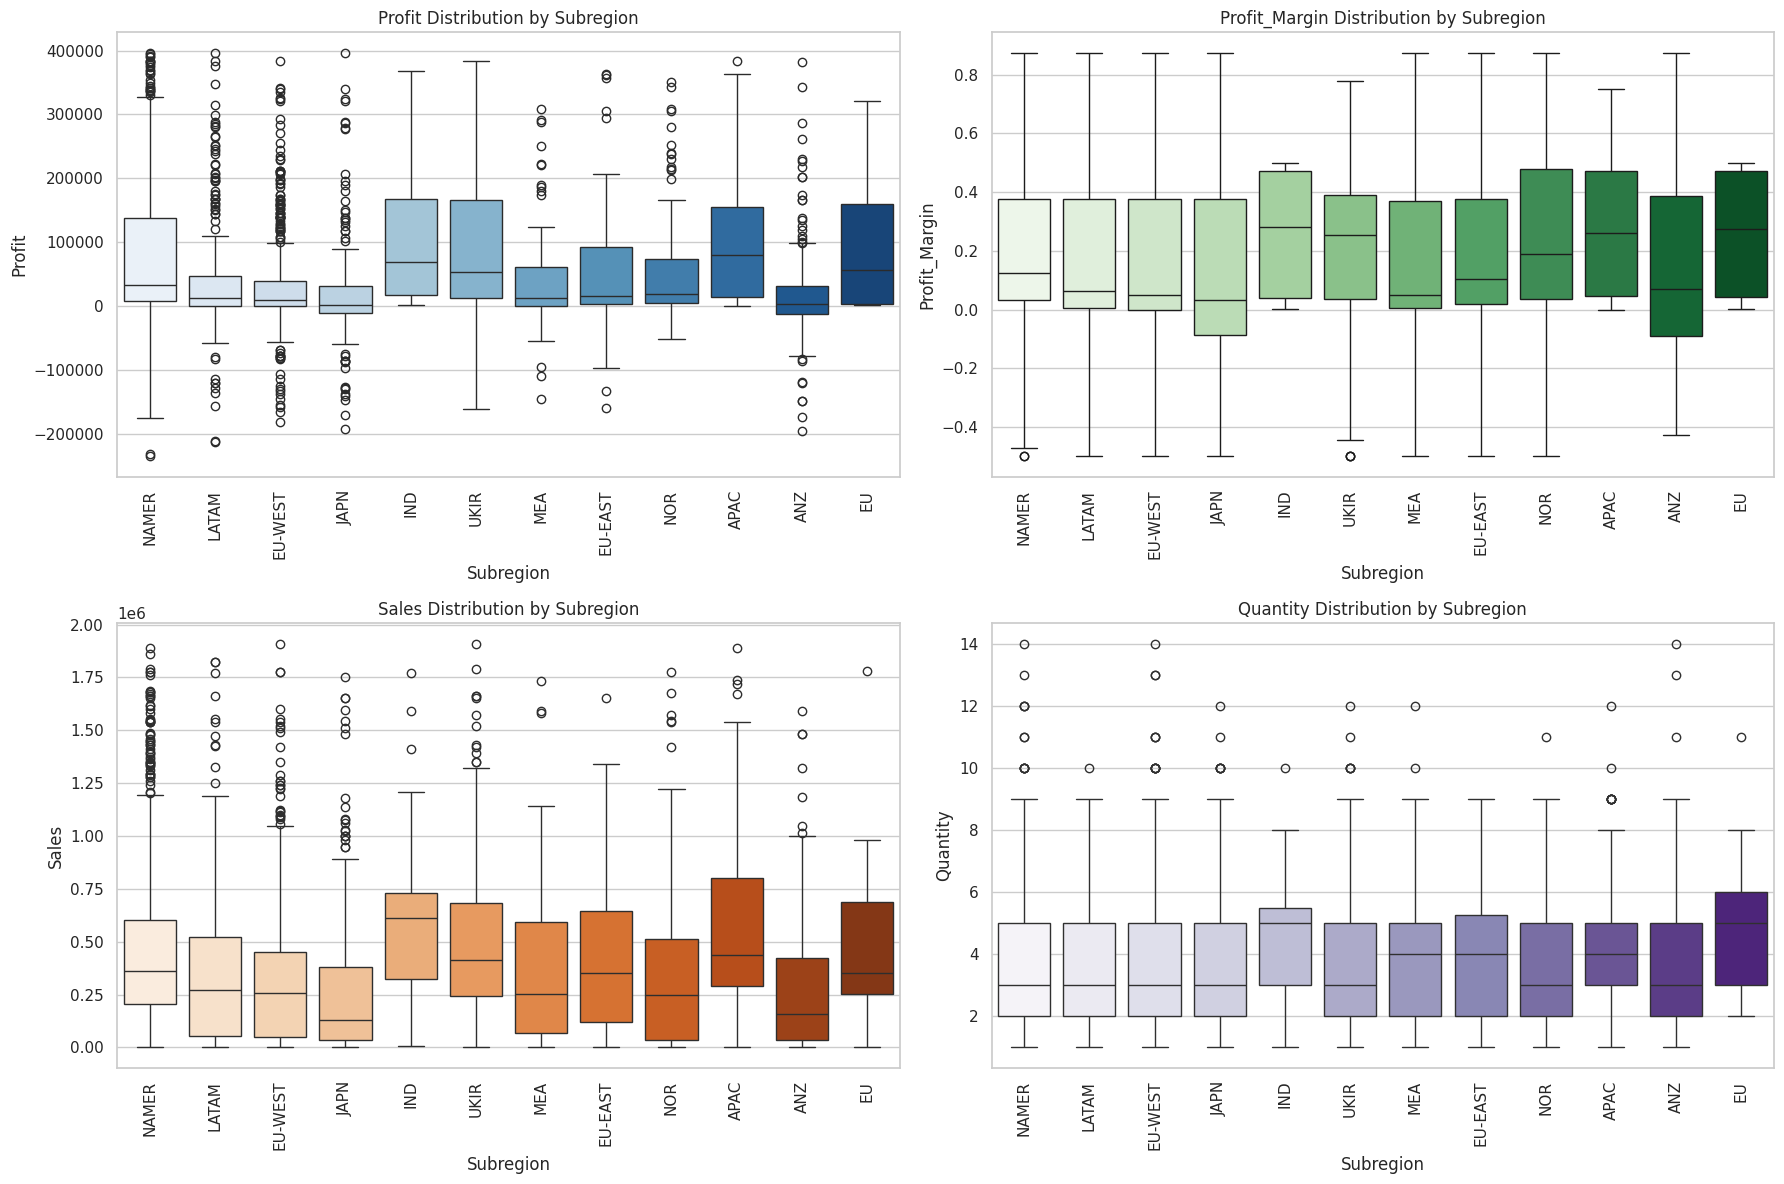


Boxplot-Based Insights by Subregion:

Metric: Profit
Highest median Profit: APAC (80,908.50)
Lowest median Profit: JAPN (2,313.00)
Outlier counts:
   - ANZ: 28 outliers
   - APAC: 1 outliers
   - EU: 0 outliers
   - EU-EAST: 7 outliers
   - EU-WEST: 87 outliers
   - IND: 0 outliers
   - JAPN: 39 outliers
   - LATAM: 51 outliers
   - MEA: 13 outliers
   - NAMER: 26 outliers
   - NOR: 13 outliers
   - UKIR: 0 outliers

Metric: Profit_Margin
Highest median Profit_Margin: IND (0.28)
Lowest median Profit_Margin: JAPN (0.03)
Outlier counts:
   - ANZ: 0 outliers
   - APAC: 0 outliers
   - EU: 0 outliers
   - EU-EAST: 0 outliers
   - EU-WEST: 0 outliers
   - IND: 0 outliers
   - JAPN: 0 outliers
   - LATAM: 0 outliers
   - MEA: 0 outliers
   - NAMER: 2 outliers
   - NOR: 0 outliers
   - UKIR: 3 outliers

Metric: Sales
Highest median Sales: IND (614,400.00)
Lowest median Sales: JAPN (127,643.00)
Outlier counts:
   - ANZ: 7 outliers
   - APAC: 4 outliers
   - EU: 1 outliers
   - EU-EAST: 1 outl

In [ ]:
metrics = ["Profit", "Profit_Margin", "Sales", "Quantity"]
colors = ["Blues", "Greens", "Oranges", "Purples"]

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    sns.boxplot(data=data, x="Subregion", y=metric, hue="Subregion", palette=colors[i], legend=False, ax=axes[i])
    axes[i].set_title(f"{metric} Distribution by Subregion")
    axes[i].set_ylabel(metric)
    axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

print("\nBoxplot-Based Insights by Subregion:")
for metric in metrics:
    print(f"\nMetric: {metric}")
    grouped = data.groupby("Subregion")[metric]
    medians = grouped.median()
    iqr = grouped.quantile(0.75) - grouped.quantile(0.25)

    outliers = data.groupby("Subregion")[metric].apply(
        lambda x: ((x < (x.quantile(0.25) - 1.5 * iqr[x.name])) |
                   (x > (x.quantile(0.75) + 1.5 * iqr[x.name]))).sum()
    )

    highest = medians.idxmax()
    lowest = medians.idxmin()
    print(f"Highest median {metric}: {highest} ({medians[highest]:,.2f})")
    print(f"Lowest median {metric}: {lowest} ({medians[lowest]:,.2f})")
    print("Outlier counts:")
    for sub in outliers.index:
        print(f"   - {sub}: {outliers[sub]} outliers")

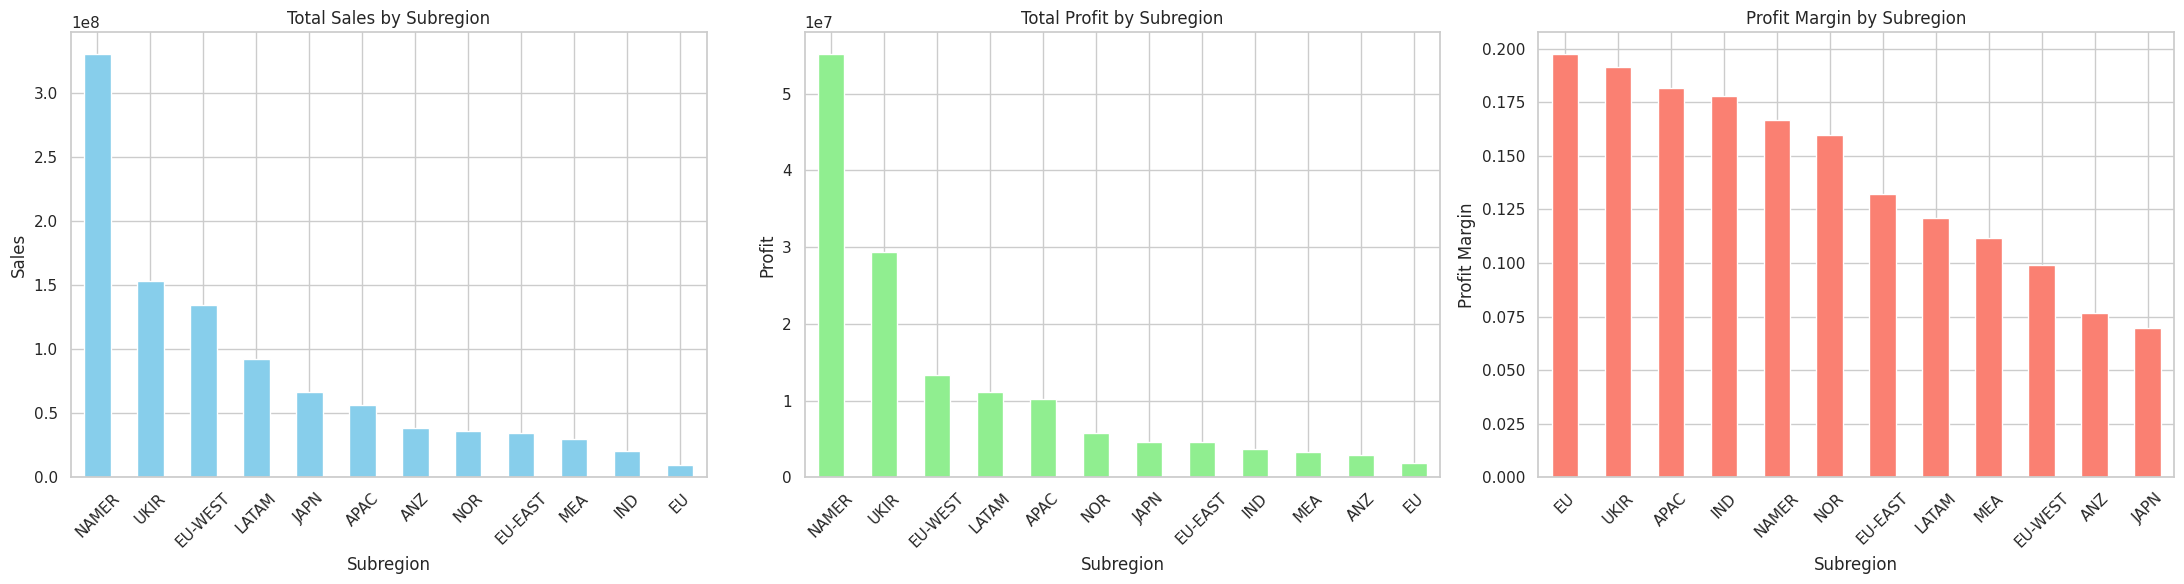


Subregion-Level Performance Insights (Total):

Highest sales: NAMER ($331,071,966)
Lowest sales: EU ($9,750,789)

Highest profit: NAMER ($55,219,725)
Lowest profit: EU ($1,927,543)

Highest profit_margin: EU (0.20)
Lowest profit_margin: JAPN (0.07)


In [ ]:
subregion_summary = data.groupby("Subregion").agg({
    "Sales": "sum",
    "Profit": "sum"
})
subregion_summary["Profit_Margin"] = subregion_summary["Profit"] / subregion_summary["Sales"]

top_sales = subregion_summary.sort_values(by="Sales", ascending=False)
top_profit = subregion_summary.sort_values(by="Profit", ascending=False)
top_margin = subregion_summary.sort_values(by="Profit_Margin", ascending=False)

fig, axes = plt.subplots(1, 3, figsize=(22, 6))

top_sales["Sales"].plot(kind="bar", ax=axes[0], color='skyblue')
axes[0].set_title("Total Sales by Subregion")
axes[0].set_ylabel("Sales")
axes[0].tick_params(axis='x', rotation=45)

top_profit["Profit"].plot(kind="bar", ax=axes[1], color='lightgreen')
axes[1].set_title("Total Profit by Subregion")
axes[1].set_ylabel("Profit")
axes[1].tick_params(axis='x', rotation=45)

top_margin["Profit_Margin"].plot(kind="bar", ax=axes[2], color='salmon')
axes[2].set_title("Profit Margin by Subregion")
axes[2].set_ylabel("Profit Margin")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\nSubregion-Level Performance Insights (Total):")
for metric in ["Sales", "Profit", "Profit_Margin"]:
    max_sub = subregion_summary[metric].idxmax()
    min_sub = subregion_summary[metric].idxmin()
    max_val = subregion_summary[metric].max()
    min_val = subregion_summary[metric].min()

    if metric == "Profit_Margin":
        print(f"\nHighest {metric.lower()}: {max_sub} ({max_val:.2f})")
        print(f"Lowest {metric.lower()}: {min_sub} ({min_val:.2f})")
    else:
        print(f"\nHighest {metric.lower()}: {max_sub} (${max_val:,.0f})")
        print(f"Lowest {metric.lower()}: {min_sub} (${min_val:,.0f})")

### 2.2.3. Understanding countries

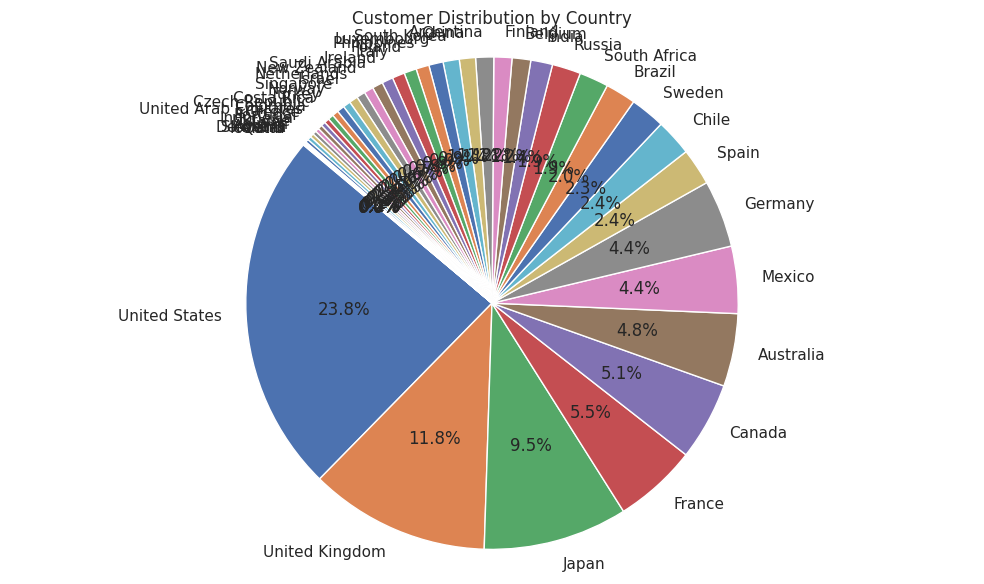


Country: Argentina
• AT&T
• American Express
• BMW
• BNP Paribas
• CVS Health
• China National Petroleum
• Coca-Cola
• Daimler
• Fannie Mae
• FedEx
• General Motors
• HSBC Holdings
• Intel
• Lowes
• Lukoil
• McKesson
• Mitsubishi
• Morgan Stanley
• Prudential Financial
• Trafigura Group
• Walt Disney
• Wells Fargo

Country: Australia
• AT&T
• Abbott Laboratories
• Allianz
• American Express
• AmerisourceBergen
• Anthem
• BMW
• BNP Paribas
• Banco Santander
• Boeing
• Bosch
• CVS Health
• Carrefour
• Caterpillar
• Chevron
• China National Petroleum
• Cigna
• Cisco Systems
• Coca-Cola
• Comcast
• ConocoPhillips
• Daimler
• Enel
• Engie
• Fannie Mae
• FedEx
• Ford Motor
• Gazprom
• General Electric
• General Motors
• Glencore
• Goldman Sachs Group
• HSBC Holdings
• Home Depot
• HonHai Precision Industry
• Huawei
• Intel
• Itochu
• Johnson & Johnson
• Kroger
• Lowes
• Lukoil
• McKesson
• Merck
• Mondelez International
• Morgan Stanley
• News Corp.
• Panasonic
• PepsiCo
• Petrobras
• Pfize

In [ ]:
country_counts = data['Country'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Customer Distribution by Country")
plt.axis('equal')
plt.tight_layout()
plt.show()

grouped_customers_by_country = data.groupby('Country')['Customer'].unique()
for country, customers in grouped_customers_by_country.items():
    print(f"\nCountry: {country}")
    print("• " + "\n• ".join(sorted(customers)))

# PART 2: Descriptive Statistics by Country
metrics = ["Sales", "Profit", "Profit_Margin", "Quantity", "Discount"]
agg_funcs = ["count", "mean", "std", "min", "median", "max"]

country_stats = data.groupby("Country")[metrics].agg(agg_funcs).round(2)
country_stats.columns = ['_'.join(col).strip() for col in country_stats.columns.values]

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
print("\nDescriptive Statistics by Country:")
print(country_stats)

print("\nMedian Insights by Country:")
for metric in ["Sales", "Profit", "Profit_Margin", "Quantity"]:
    col = f"{metric}_median"
    max_country = country_stats[col].idxmax()
    min_country = country_stats[col].idxmin()
    print(f"\nHighest median {metric.lower()}: {max_country} ({country_stats[col][max_country]:,.2f})")
    print(f"Lowest median {metric.lower()}: {min_country} ({country_stats[col][min_country]:,.2f})")

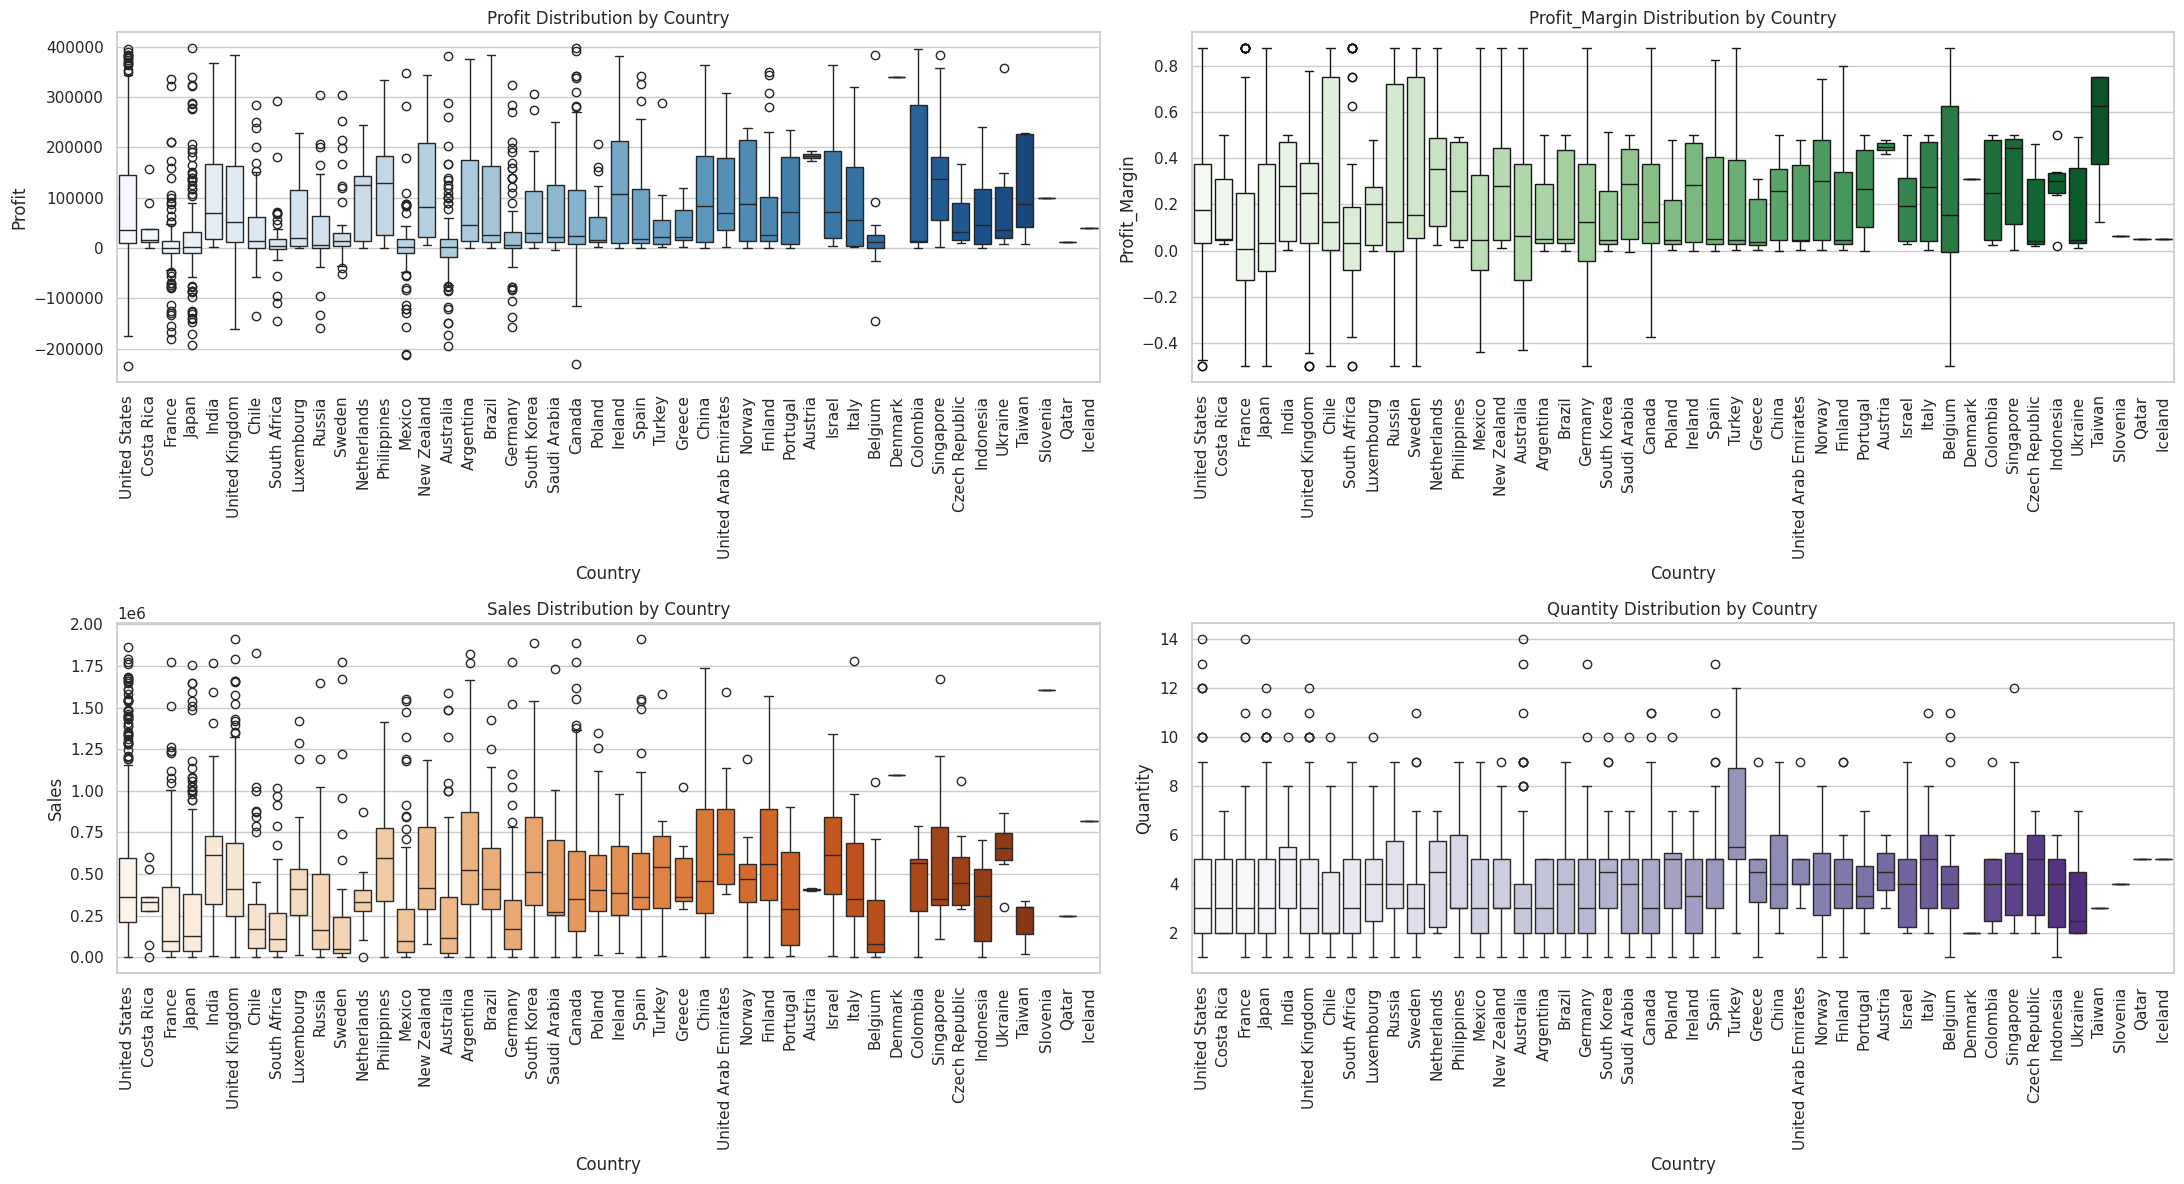


Boxplot-Based Insights by Country:

Metric: Profit
Highest median Profit: Denmark (339,388.00)
Lowest median Profit: France (275.50)
Outlier counts:
   - Argentina: 0 outliers
   - Australia: 27 outliers
   - Austria: 0 outliers
   - Belgium: 3 outliers
   - Brazil: 0 outliers
   - Canada: 9 outliers
   - Chile: 7 outliers
   - China: 0 outliers
   - Colombia: 0 outliers
   - Costa Rica: 2 outliers
   - Czech Republic: 0 outliers
   - Denmark: 0 outliers
   - Finland: 4 outliers
   - France: 31 outliers
   - Germany: 22 outliers
   - Greece: 0 outliers
   - Iceland: 0 outliers
   - India: 0 outliers
   - Indonesia: 0 outliers
   - Ireland: 0 outliers
   - Israel: 0 outliers
   - Italy: 0 outliers
   - Japan: 39 outliers
   - Luxembourg: 0 outliers
   - Mexico: 21 outliers
   - Netherlands: 0 outliers
   - New Zealand: 0 outliers
   - Norway: 0 outliers
   - Philippines: 0 outliers
   - Poland: 3 outliers
   - Portugal: 0 outliers
   - Qatar: 0 outliers
   - Russia: 7 outliers
   - Sau

In [ ]:
metrics = ["Profit", "Profit_Margin", "Sales", "Quantity"]
colors = ["Blues", "Greens", "Oranges", "Purples"]

fig, axes = plt.subplots(2, 2, figsize=(22, 12))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    sns.boxplot(data=data, x="Country", y=metric, hue="Country", palette=colors[i], legend=False, ax=axes[i])
    axes[i].set_title(f"{metric} Distribution by Country")
    axes[i].set_ylabel(metric)
    axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

print("\nBoxplot-Based Insights by Country:")
for metric in metrics:
    print(f"\nMetric: {metric}")
    grouped = data.groupby("Country")[metric]
    medians = grouped.median()
    iqr = grouped.quantile(0.75) - grouped.quantile(0.25)

    outliers = data.groupby("Country")[metric].apply(
        lambda x: ((x < (x.quantile(0.25) - 1.5 * iqr[x.name])) |
                   (x > (x.quantile(0.75) + 1.5 * iqr[x.name]))).sum()
    )

    highest = medians.idxmax()
    lowest = medians.idxmin()
    print(f"Highest median {metric}: {highest} ({medians[highest]:,.2f})")
    print(f"Lowest median {metric}: {lowest} ({medians[lowest]:,.2f})")
    print("Outlier counts:")
    for country in outliers.index:
        print(f"   - {country}: {outliers[country]} outliers")

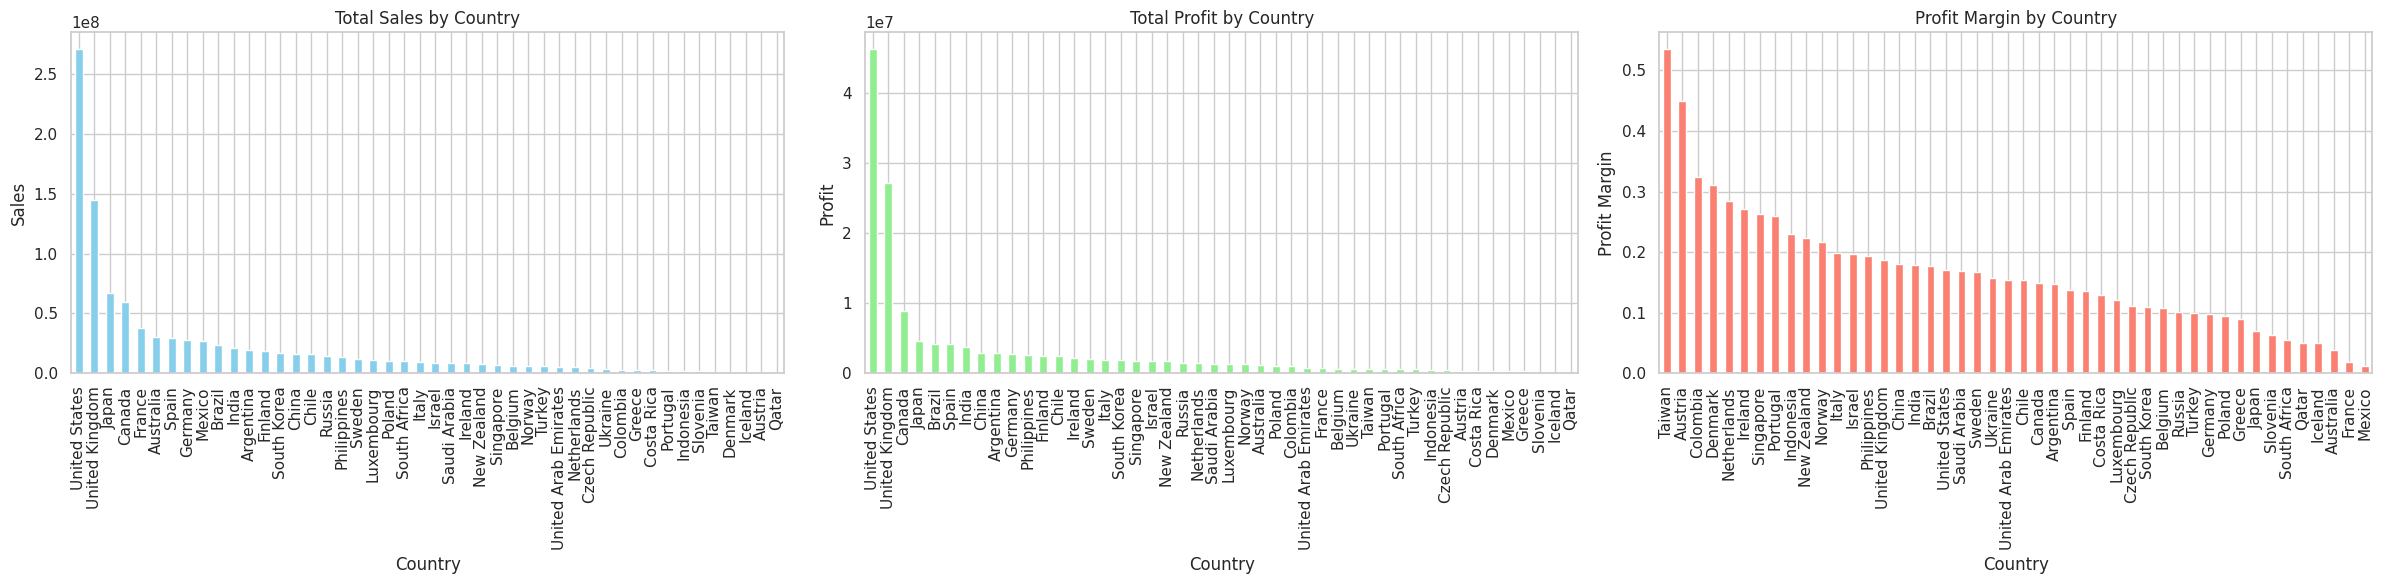


Country-Level Performance Insights (Total):

Highest sales: United States ($271,479,268)
Lowest sales: Qatar ($250,900)

Highest profit: United States ($46,311,934)
Lowest profit: Qatar ($12,691)

Highest profit_margin: Taiwan (0.54)
Lowest profit_margin: Mexico (0.01)


In [ ]:
country_summary = data.groupby("Country").agg({
    "Sales": "sum",
    "Profit": "sum"
})
country_summary["Profit_Margin"] = country_summary["Profit"] / country_summary["Sales"]

top_sales = country_summary.sort_values(by="Sales", ascending=False)
top_profit = country_summary.sort_values(by="Profit", ascending=False)
top_margin = country_summary.sort_values(by="Profit_Margin", ascending=False)

fig, axes = plt.subplots(1, 3, figsize=(24, 6))

top_sales["Sales"].plot(kind="bar", ax=axes[0], color='skyblue')
axes[0].set_title("Total Sales by Country")
axes[0].set_ylabel("Sales")
axes[0].tick_params(axis='x', rotation=90)

top_profit["Profit"].plot(kind="bar", ax=axes[1], color='lightgreen')
axes[1].set_title("Total Profit by Country")
axes[1].set_ylabel("Profit")
axes[1].tick_params(axis='x', rotation=90)

top_margin["Profit_Margin"].plot(kind="bar", ax=axes[2], color='salmon')
axes[2].set_title("Profit Margin by Country")
axes[2].set_ylabel("Profit Margin")
axes[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

print("\nCountry-Level Performance Insights (Total):")
for metric in ["Sales", "Profit", "Profit_Margin"]:
    max_country = country_summary[metric].idxmax()
    min_country = country_summary[metric].idxmin()
    max_val = country_summary[metric].max()
    min_val = country_summary[metric].min()

    if metric == "Profit_Margin":
        print(f"\nHighest {metric.lower()}: {max_country} ({max_val:.2f})")
        print(f"Lowest {metric.lower()}: {min_country} ({min_val:.2f})")
    else:
        print(f"\nHighest {metric.lower()}: {max_country} (${max_val:,.0f})")
        print(f"Lowest {metric.lower()}: {min_country} (${min_val:,.0f})")

##2.4 Understanding products

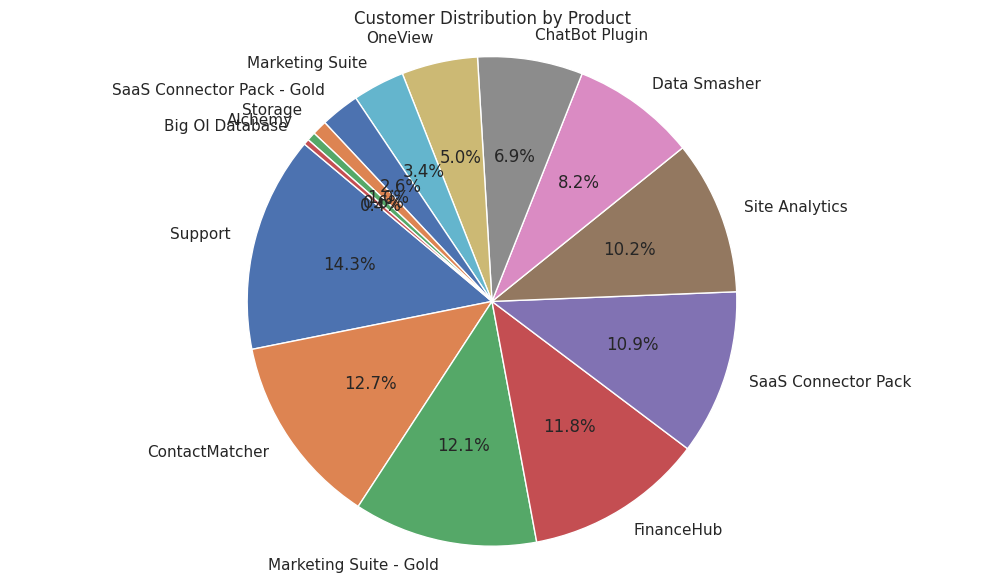


Product: Alchemy
• AmerisourceBergen
• Aviva
• Cisco Systems
• Daimler
• General Electric
• Glencore
• Goldman Sachs Group
• Lowes
• McKesson
• Morgan Stanley
• Pfizer
• Royal Dutch Shell
• Siemens
• United Parcel Service

Product: Big Ol Database
• Anthem
• CVS Health
• ConocoPhillips
• Itochu
• Nestle
• Oracle
• Philip Morris International
• Sprint Nextel
• Sysco

Product: ChatBot Plugin
• AT&T
• Abbott Laboratories
• Aetna
• Airbus
• Allianz
• Allstate
• Amazon
• American Express
• AmerisourceBergen
• Anthem
• Apple
• Aviva
• BNP Paribas
• Banco Santander
• Berkshire Hathaway
• Boeing
• Bosch
• CVS Health
• Carrefour
• Caterpillar
• Chevron
• China National Petroleum
• Cigna
• Cisco Systems
• Citigroup
• Coca-Cola
• Comcast
• ConocoPhillips
• Costco Wholesale
• Daimler
• Enel
• Engie
• Exxon Mobil
• Fannie Mae
• FedEx
• Ford Motor
• Gazprom
• General Electric
• General Motors
• Glencore
• Home Depot
• HonHai Precision Industry
• Honda Motor
• Huawei
• Itochu
• J.P. Morgan Chase & C

In [ ]:
product_counts = data['Product'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(product_counts, labels=product_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Customer Distribution by Product")
plt.axis('equal')
plt.tight_layout()
plt.show()

grouped_customers_by_product = data.groupby('Product')['Customer'].unique()
for product, customers in grouped_customers_by_product.items():
    print(f"\nProduct: {product}")
    print("• " + "\n• ".join(sorted(customers)))

In [ ]:
metrics = ["Sales", "Profit", "Profit_Margin", "Quantity", "Discount"]
agg_funcs = ["count", "mean", "std", "min", "median", "max"]

product_stats = data.groupby("Product")[metrics].agg(agg_funcs).round(2)
product_stats.columns = ['_'.join(col).strip() for col in product_stats.columns.values]

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
print("\nDescriptive Statistics by Product:")
print(product_stats)

print("\nMedian Insights by Product:")
for metric in ["Sales", "Profit", "Profit_Margin", "Quantity"]:
    col = f"{metric}_median"
    max_product = product_stats[col].idxmax()
    min_product = product_stats[col].idxmin()
    print(f"\nHighest median {metric.lower()}: {max_product} ({product_stats[col][max_product]:,.2f})")
    print(f"Lowest median {metric.lower()}: {min_product} ({product_stats[col][min_product]:,.2f})")



Descriptive Statistics by Product:
                            Sales_count  Sales_mean  Sales_std  Sales_min  \
Product                                                                     
Alchemy                              14   627127.43  199011.22   439992.0   
Big Ol Database                       9   440988.44  270171.93    91475.0   
ChatBot Plugin                      170   340004.58  375723.84      504.0   
ContactMatcher                      310   367072.78  361876.93      914.0   
Data Smasher                        201   531858.71  481435.14       40.0   
FinanceHub                          289   369370.81  342969.50       74.0   
Marketing Suite                      84   427615.32  344348.74    16388.0   
Marketing Suite - Gold              297   421182.04  412559.48     1056.0   
OneView                             123   467230.80  427500.15     1748.0   
SaaS Connector Pack                 267   516165.57  408962.99     2496.0   
SaaS Connector Pack - Gold           63 

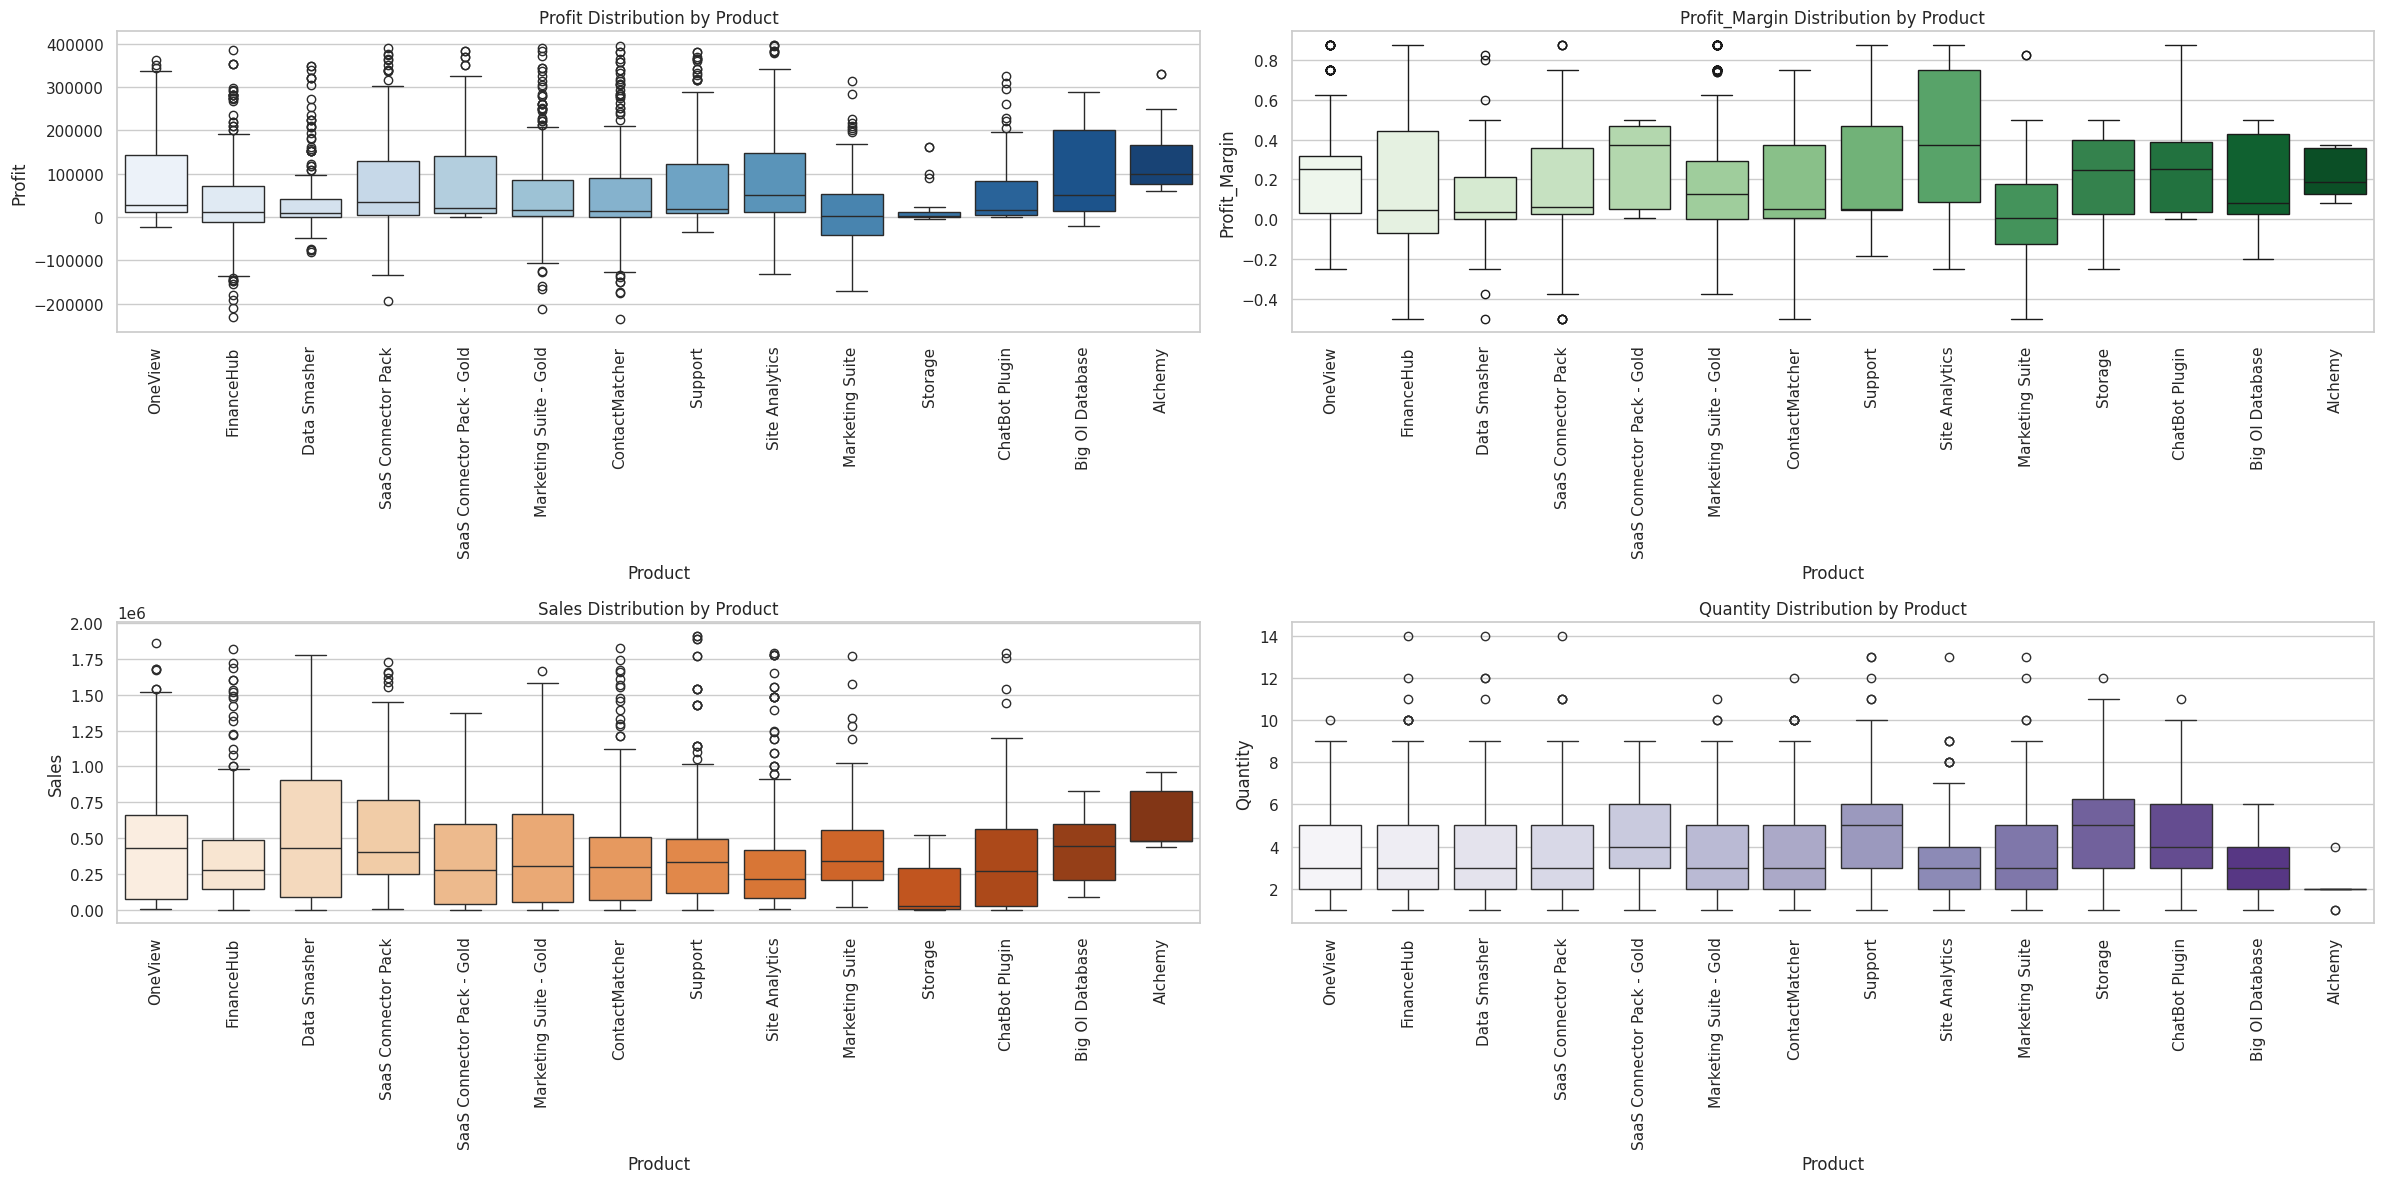


Boxplot-Based Insights by Product:

Metric: Profit
Highest median Profit: Alchemy (99,997.50)
Lowest median Profit: Storage (1,377.50)
Outlier counts:
   - Alchemy: 2 outliers
   - Big Ol Database: 0 outliers
   - ChatBot Plugin: 7 outliers
   - ContactMatcher: 33 outliers
   - Data Smasher: 35 outliers
   - FinanceHub: 34 outliers
   - Marketing Suite: 8 outliers
   - Marketing Suite - Gold: 33 outliers
   - OneView: 3 outliers
   - SaaS Connector Pack: 12 outliers
   - SaaS Connector Pack - Gold: 6 outliers
   - Site Analytics: 7 outliers
   - Storage: 4 outliers
   - Support: 15 outliers

Metric: Profit_Margin
Highest median Profit_Margin: SaaS Connector Pack - Gold (0.38)
Lowest median Profit_Margin: Marketing Suite (0.01)
Outlier counts:
   - Alchemy: 0 outliers
   - Big Ol Database: 0 outliers
   - ChatBot Plugin: 0 outliers
   - ContactMatcher: 0 outliers
   - Data Smasher: 5 outliers
   - FinanceHub: 0 outliers
   - Marketing Suite: 2 outliers
   - Marketing Suite - Gold: 46 o

In [ ]:
metrics = ["Profit", "Profit_Margin", "Sales", "Quantity"]
colors = ["Blues", "Greens", "Oranges", "Purples"]

fig, axes = plt.subplots(2, 2, figsize=(24, 12))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    sns.boxplot(data=data, x="Product", y=metric, hue="Product", palette=colors[i], legend=False, ax=axes[i])
    axes[i].set_title(f"{metric} Distribution by Product")
    axes[i].set_ylabel(metric)
    axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

print("\nBoxplot-Based Insights by Product:")
for metric in metrics:
    print(f"\nMetric: {metric}")
    grouped = data.groupby("Product")[metric]
    medians = grouped.median()
    iqr = grouped.quantile(0.75) - grouped.quantile(0.25)

    outliers = data.groupby("Product")[metric].apply(
        lambda x: ((x < (x.quantile(0.25) - 1.5 * iqr[x.name])) |
                   (x > (x.quantile(0.75) + 1.5 * iqr[x.name]))).sum()
    )

    highest = medians.idxmax()
    lowest = medians.idxmin()
    print(f"Highest median {metric}: {highest} ({medians[highest]:,.2f})")
    print(f"Lowest median {metric}: {lowest} ({medians[lowest]:,.2f})")
    print("Outlier counts:")
    for product in outliers.index:
        print(f"   - {product}: {outliers[product]} outliers")

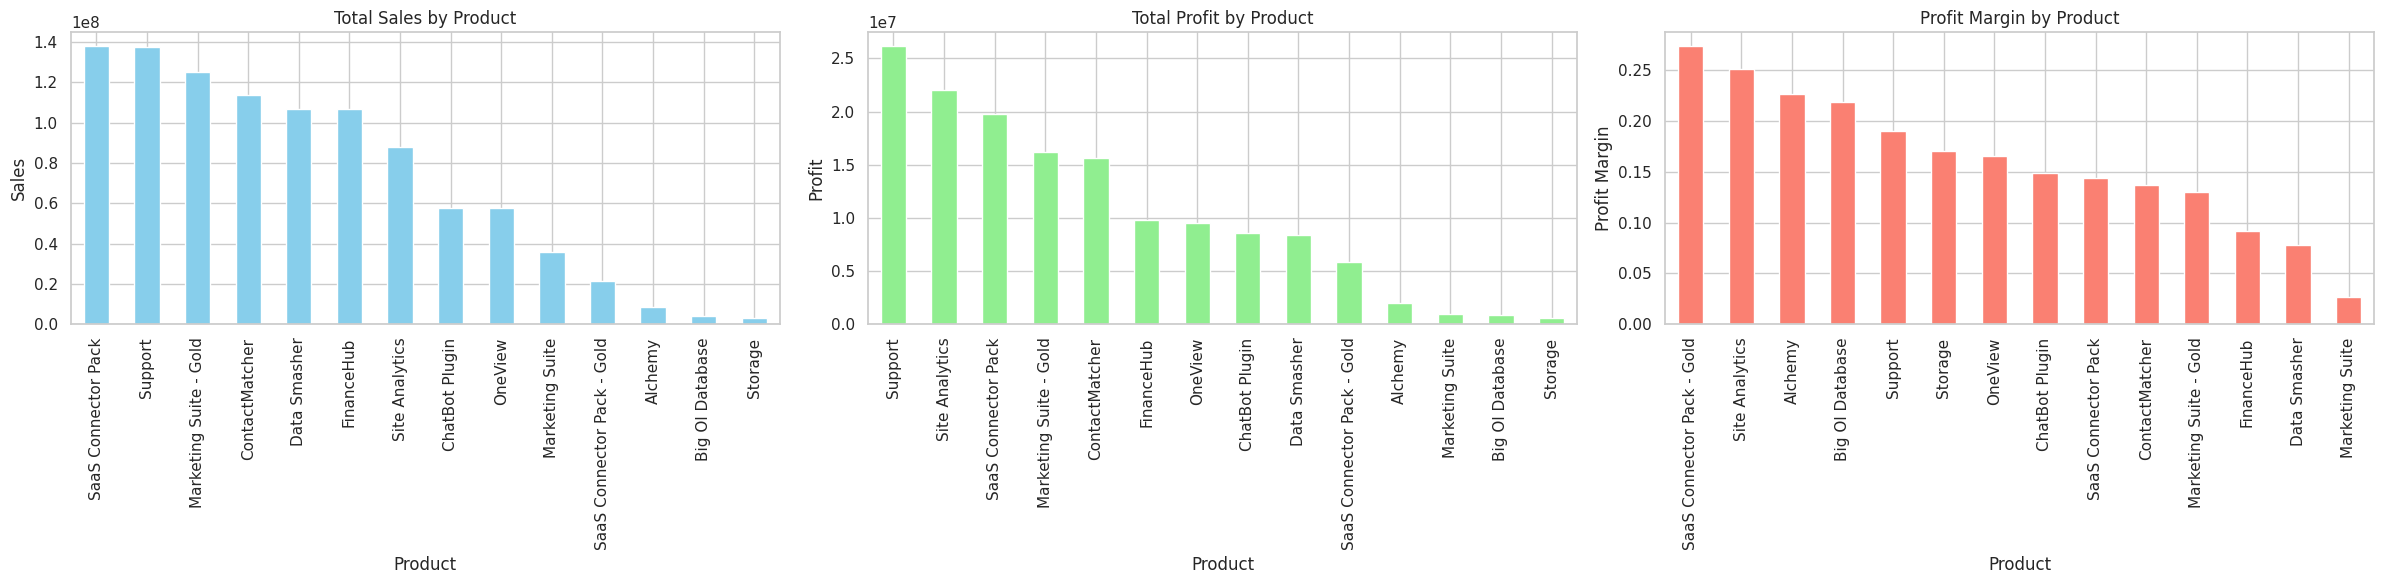


Product-Level Performance Insights (Total):

Highest sales: SaaS Connector Pack ($137,816,206)
Lowest sales: Storage ($3,385,148)

Highest profit: Support ($26,137,071)
Lowest profit: Storage ($576,438)

Highest profit_margin: SaaS Connector Pack - Gold (0.27)
Lowest profit_margin: Marketing Suite (0.03)


In [ ]:
product_summary = data.groupby("Product").agg({
    "Sales": "sum",
    "Profit": "sum"
})
product_summary["Profit_Margin"] = product_summary["Profit"] / product_summary["Sales"]

top_sales = product_summary.sort_values(by="Sales", ascending=False)
top_profit = product_summary.sort_values(by="Profit", ascending=False)
top_margin = product_summary.sort_values(by="Profit_Margin", ascending=False)

fig, axes = plt.subplots(1, 3, figsize=(24, 6))

top_sales["Sales"].plot(kind="bar", ax=axes[0], color='skyblue')
axes[0].set_title("Total Sales by Product")
axes[0].set_ylabel("Sales")
axes[0].tick_params(axis='x', rotation=90)

top_profit["Profit"].plot(kind="bar", ax=axes[1], color='lightgreen')
axes[1].set_title("Total Profit by Product")
axes[1].set_ylabel("Profit")
axes[1].tick_params(axis='x', rotation=90)

top_margin["Profit_Margin"].plot(kind="bar", ax=axes[2], color='salmon')
axes[2].set_title("Profit Margin by Product")
axes[2].set_ylabel("Profit Margin")
axes[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

print("\nProduct-Level Performance Insights (Total):")
for metric in ["Sales", "Profit", "Profit_Margin"]:
    max_product = product_summary[metric].idxmax()
    min_product = product_summary[metric].idxmin()
    max_val = product_summary[metric].max()
    min_val = product_summary[metric].min()

    if metric == "Profit_Margin":
        print(f"\nHighest {metric.lower()}: {max_product} ({max_val:.2f})")
        print(f"Lowest {metric.lower()}: {min_product} ({min_val:.2f})")
    else:
        print(f"\nHighest {metric.lower()}: {max_product} (${max_val:,.0f})")
        print(f"Lowest {metric.lower()}: {min_product} (${min_val:,.0f})")

## 2.5. Understanding time trends

#### 2.4.1. By week

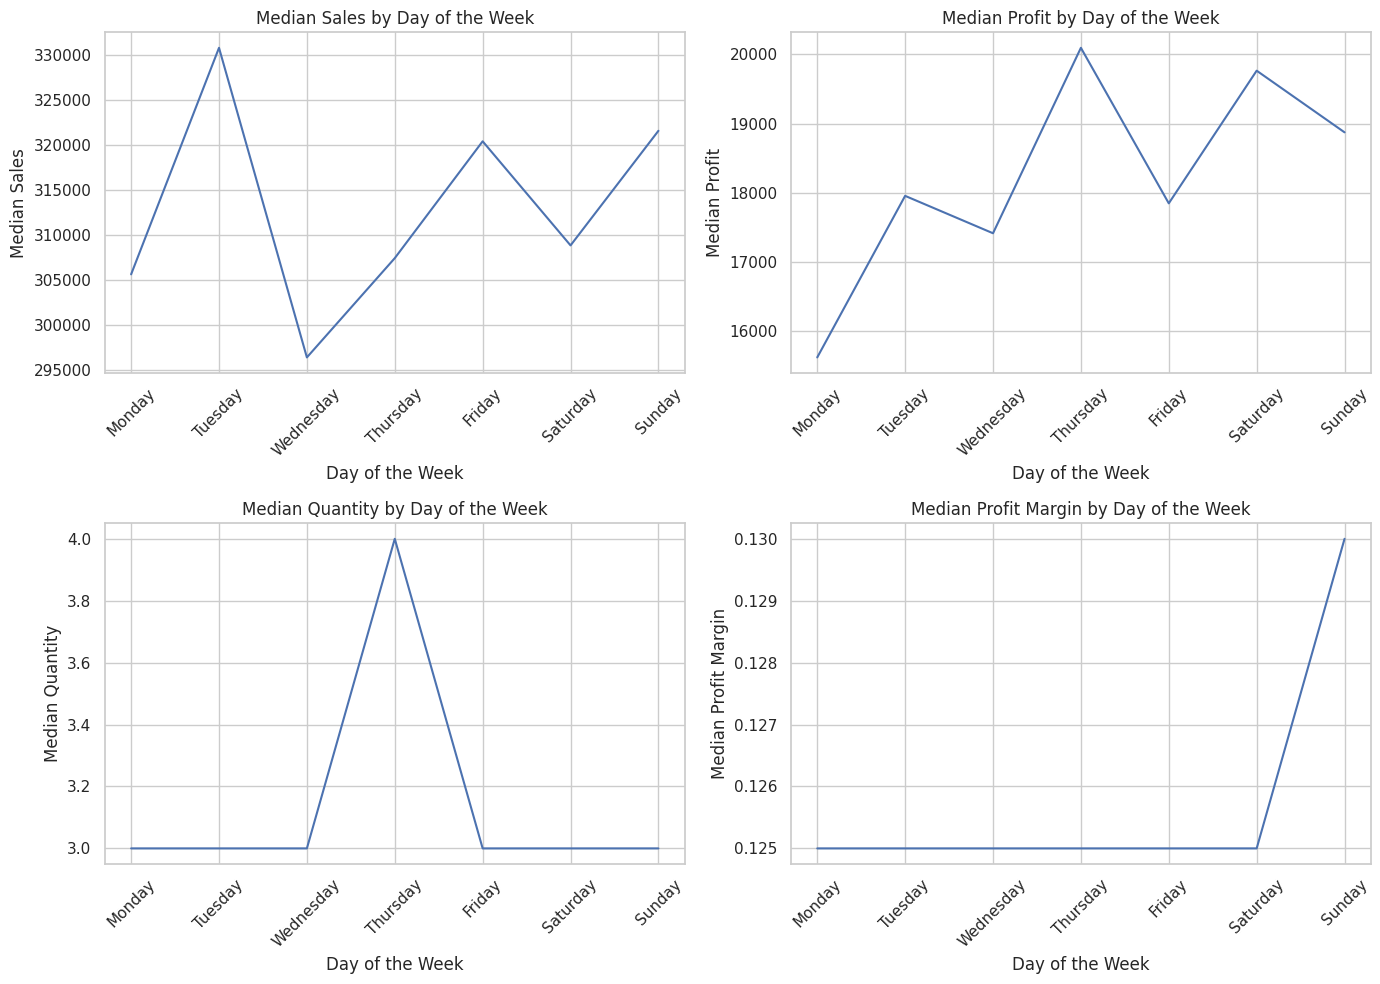

Sales 
Highest median: Tuesday (330,800.00) 
Lowest median: Wednesday (296,358.00)

Profit 
Highest median: Thursday (20,094.50) 
Lowest median: Monday (15,620.50)

Quantity 
Highest median: Thursday (4.00) 
Lowest median: Monday (3.00)

Profit_Margin 
Highest median: Sunday (0.13) 
Lowest median: Monday (0.12)



In [ ]:
# Ensure 'Order Date' is datetime
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')

# Extract weekday
data['Weekday'] = data['Order Date'].dt.day_name()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data['Weekday'] = pd.Categorical(data['Weekday'], categories=weekday_order, ordered=True)

# Compute median metrics by weekday
median_by_day = data.groupby('Weekday', observed=True)[['Sales', 'Profit', 'Quantity', 'Profit_Margin']].median().reindex(weekday_order)

# 2x2 subplot visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
metrics = ['Sales', 'Profit', 'Quantity', 'Profit_Margin']
titles = ['Median Sales', 'Median Profit', 'Median Quantity', 'Median Profit Margin']

for ax, metric, title in zip(axes.flatten(), metrics, titles):
    sns.lineplot(x=median_by_day.index, y=median_by_day[metric], ax=ax)
    ax.set_title(f"{title} by Day of the Week")
    ax.set_xlabel("Day of the Week")
    ax.set_ylabel(title)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Insights
for metric in metrics:
    highest_day = median_by_day[metric].idxmax()
    lowest_day = median_by_day[metric].idxmin()
    high_val = median_by_day[metric].max()
    low_val = median_by_day[metric].min()
    print(f"{metric} \nHighest median: {highest_day} ({high_val:,.2f}) \nLowest median: {lowest_day} ({low_val:,.2f})\n")

#### 2.4.2. By day

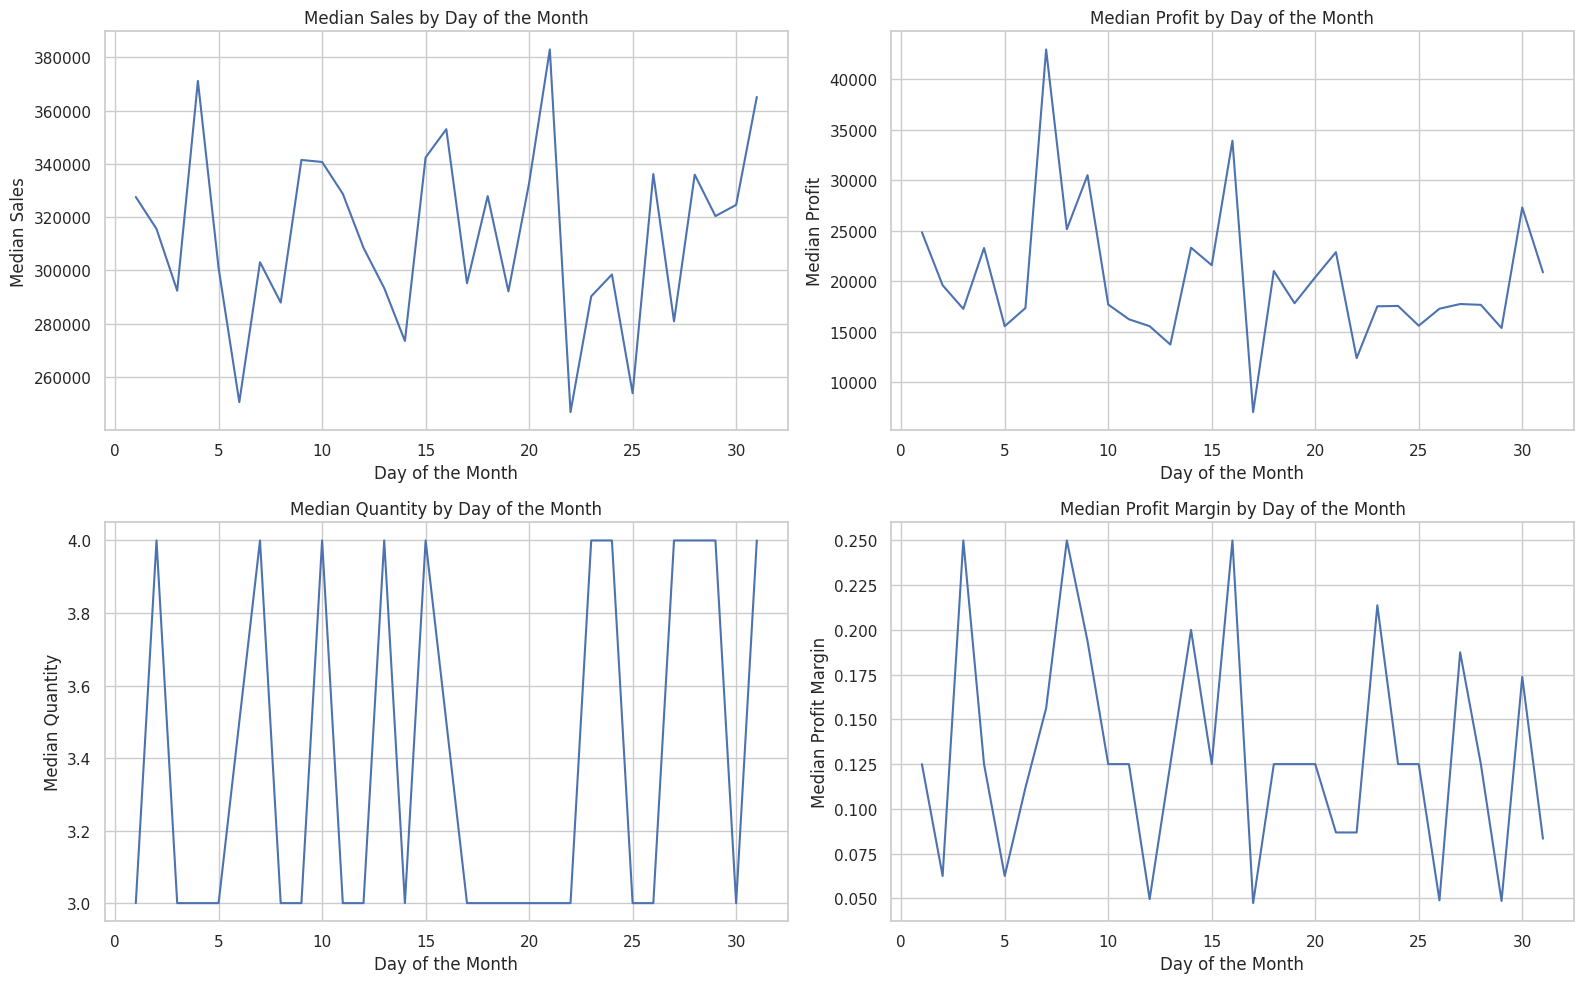

Sales 
Highest median: Day 21 (382,900.00)
Lowest median: Day 22 (246,868.00)

Profit 
Highest median: Day 7 (42,934.00)
Lowest median: Day 17 (7,049.00)

Quantity 
Highest median: Day 2 (4.00)
Lowest median: Day 1 (3.00)

Profit_Margin 
Highest median: Day 3 (0.25)
Lowest median: Day 17 (0.05)



In [ ]:
# Extract day of month
data['DayOfMonth'] = data['Order Date'].dt.day

# Compute median metrics by day of month
median_by_dom = data.groupby('DayOfMonth', observed=True)[['Sales', 'Profit', 'Quantity', 'Profit_Margin']].median()

# 2x2 subplot visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
metrics = ['Sales', 'Profit', 'Quantity', 'Profit_Margin']
titles = ['Median Sales', 'Median Profit', 'Median Quantity', 'Median Profit Margin']

for ax, metric, title in zip(axes.flatten(), metrics, titles):
    sns.lineplot(x=median_by_dom.index, y=median_by_dom[metric], ax=ax)
    ax.set_title(f"{title} by Day of the Month")
    ax.set_xlabel("Day of the Month")
    ax.set_ylabel(title)
    ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

# Insights
for metric in metrics:
    highest_day = median_by_dom[metric].idxmax()
    lowest_day = median_by_dom[metric].idxmin()
    high_val = median_by_dom[metric].max()
    low_val = median_by_dom[metric].min()
    print(f"{metric} \nHighest median: Day {highest_day} ({high_val:,.2f})\nLowest median: Day {lowest_day} ({low_val:,.2f})\n")

#### 2.4.3. By month

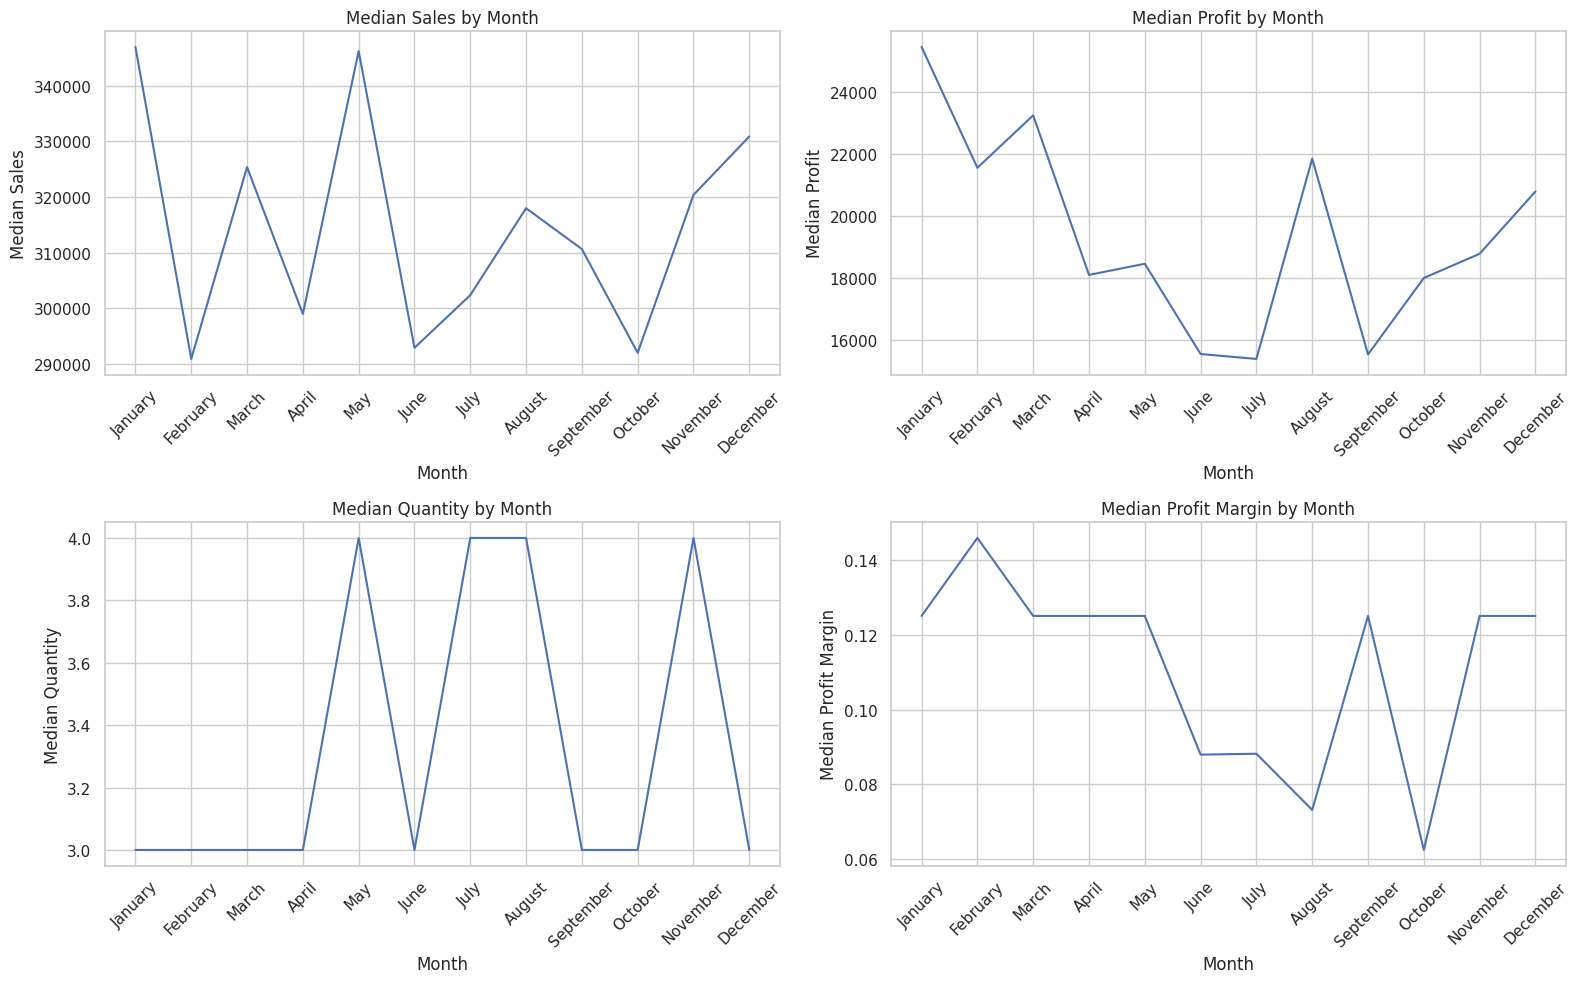

Sales 
Highest median: January (347,004.00)
Lowest median: February (290,900.00)

Profit 
Highest median: January (25,438.50)
Lowest median: July (15,393.00)

Quantity 
Highest median: May (4.00)
Lowest median: January (3.00)

Profit_Margin 
Highest median: February (0.15)
Lowest median: October (0.06)



In [ ]:
# Ensure date is datetime
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')

# Extract Month and Year
data['Month'] = data['Order Date'].dt.month_name()
data['Year'] = data['Order Date'].dt.year

# Define month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
data['Month'] = pd.Categorical(data['Month'], categories=month_order, ordered=True)

# Group and compute median
median_by_month = data.groupby('Month', observed=True)[['Sales', 'Profit', 'Quantity', 'Profit_Margin']].median()

# 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
metrics = ['Sales', 'Profit', 'Quantity', 'Profit_Margin']
titles = ['Median Sales', 'Median Profit', 'Median Quantity', 'Median Profit Margin']

for ax, metric, title in zip(axes.flatten(), metrics, titles):
    sns.lineplot(x=median_by_month.index, y=median_by_month[metric], ax=ax)
    ax.set_title(f"{title} by Month")
    ax.set_xlabel("Month")
    ax.set_ylabel(title)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print insights
for metric in metrics:
    highest_month = median_by_month[metric].idxmax()
    lowest_month = median_by_month[metric].idxmin()
    high_val = median_by_month[metric].max()
    low_val = median_by_month[metric].min()
    print(f"{metric} \nHighest median: {highest_month} ({high_val:,.2f})\nLowest median: {lowest_month} ({low_val:,.2f})\n")

#### 2.4.4. By year

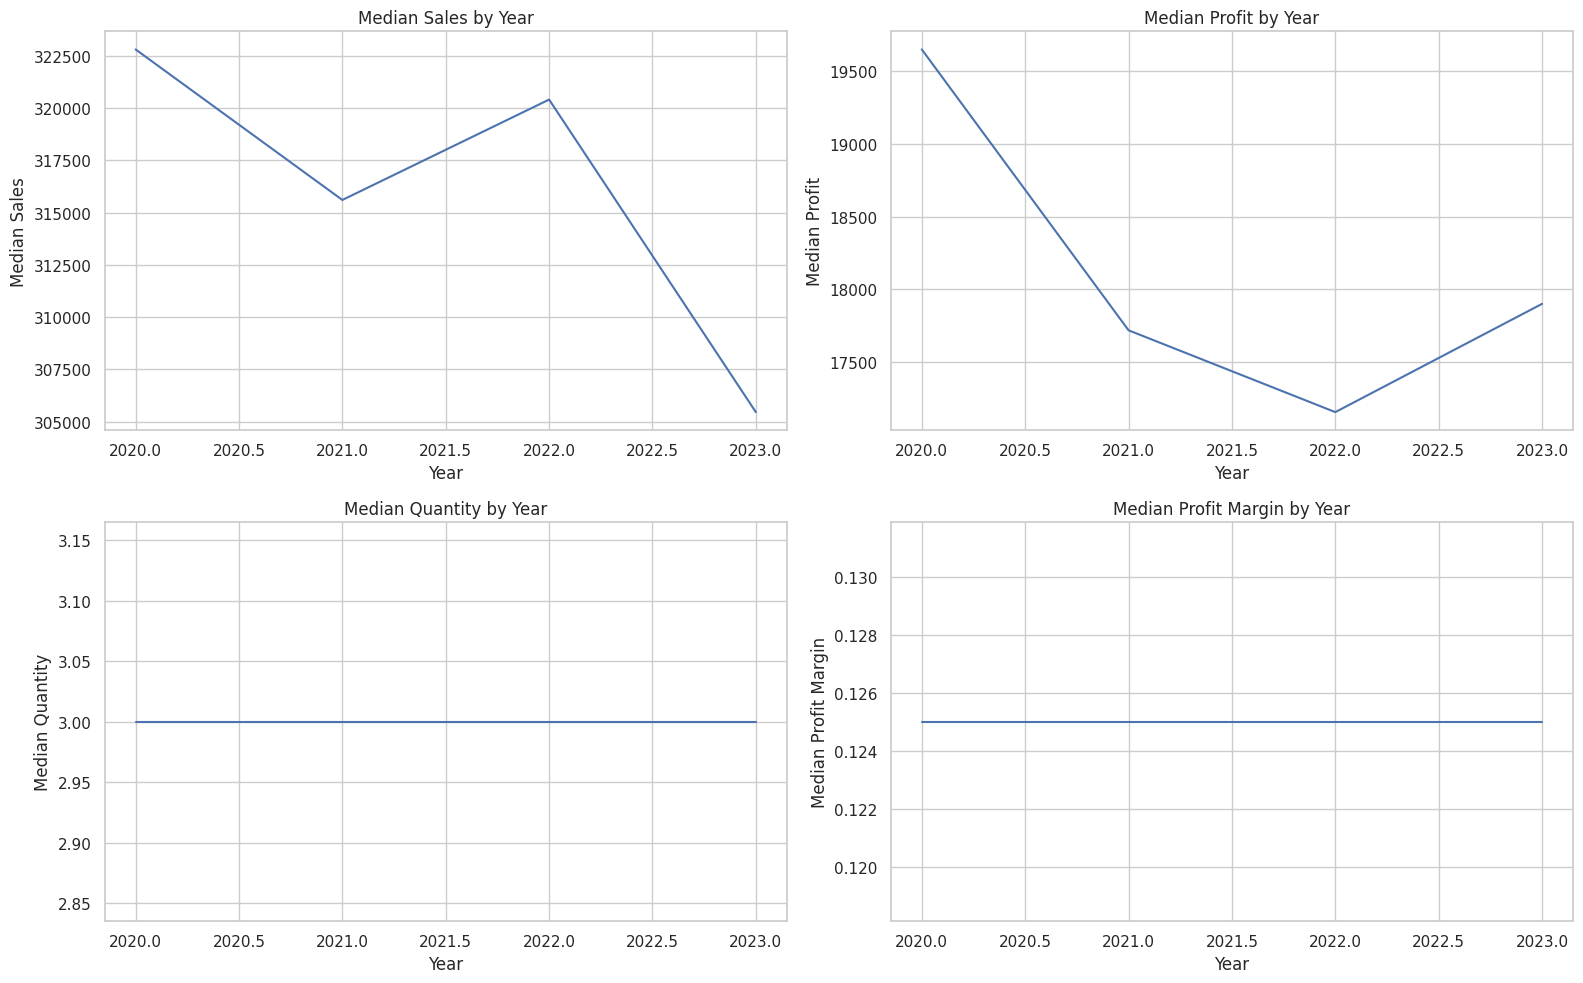

Sales 
Highest median: 2020 (322,796.00)
Lowest median: 2023 (305,456.00)

Profit 
Highest median: 2020 (19,647.00)
Lowest median: 2022 (17,158.00)

Quantity 
Highest median: 2020 (3.00)
Lowest median: 2020 (3.00)

Profit_Margin 
Highest median: 2020 (0.12)
Lowest median: 2020 (0.12)



In [ ]:
# Extract year
data['Year'] = data['Order Date'].dt.year

# Compute median metrics by year
median_by_year = data.groupby('Year', observed=True)[['Sales', 'Profit', 'Quantity', 'Profit_Margin']].median()

# 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
metrics = ['Sales', 'Profit', 'Quantity', 'Profit_Margin']
titles = ['Median Sales', 'Median Profit', 'Median Quantity', 'Median Profit Margin']

for ax, metric, title in zip(axes.flatten(), metrics, titles):
    sns.lineplot(x=median_by_year.index, y=median_by_year[metric], ax=ax)
    ax.set_title(f"{title} by Year")
    ax.set_xlabel("Year")
    ax.set_ylabel(title)
    ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

# Print insights
for metric in metrics:
    highest = median_by_year[metric].idxmax()
    lowest = median_by_year[metric].idxmin()
    high_val = median_by_year[metric].max()
    low_val = median_by_year[metric].min()
    print(f"{metric} \nHighest median: {highest} ({high_val:,.2f})\nLowest median: {lowest} ({low_val:,.2f})\n")

## 2.6. Comparing median sales by categories

*Based on the normality test, the data is not normally distributed. Thus, median is used instead of mean to explore the middle value between categories.*

**Phase #2: Exploring the relationship between two categories are explored using a heatmap to see whether there are notable insights.**

### 2.6.1. Median profit by segment and industry

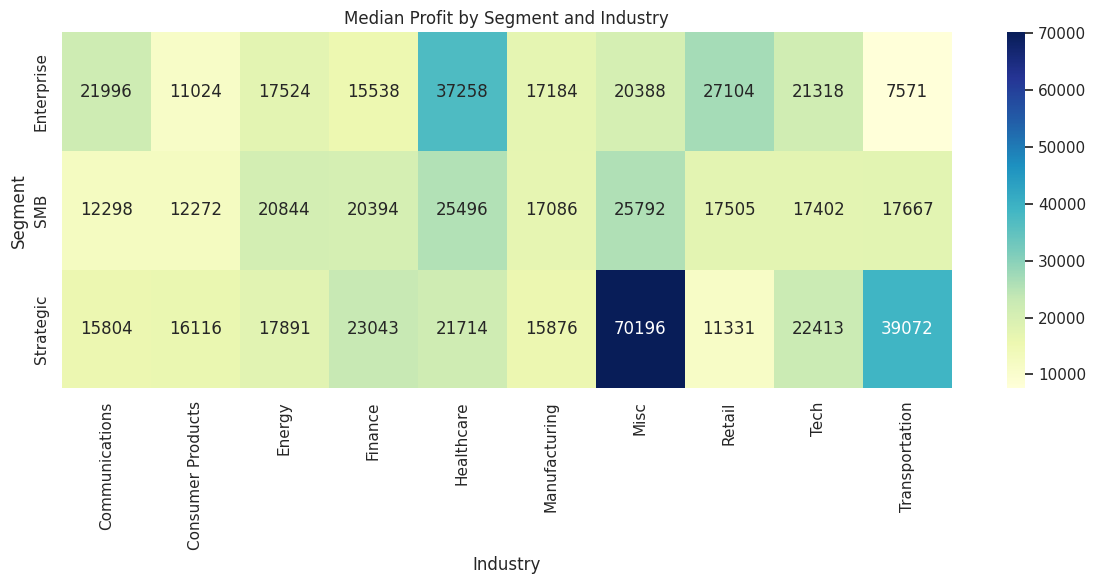


Segment 'Enterprise': 
Highest median profit is in Industry 'Healthcare' ($37,258)
Lowest median profit is in 'Transportation' ($7,571)


Segment 'SMB': 
Highest median profit is in Industry 'Misc' ($25,792)
Lowest median profit is in 'Consumer Products' ($12,272)


Segment 'Strategic': 
Highest median profit is in Industry 'Misc' ($70,196)
Lowest median profit is in 'Retail' ($11,331)



In [ ]:
# Create pivot table
pivot_profit = data.pivot_table(values='Profit', index='Segment', columns='Industry', aggfunc='median')

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_profit, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title("Median Profit by Segment and Industry")
plt.xlabel("Industry")
plt.ylabel("Segment")
plt.tight_layout()
plt.show()

# Generate insights
insights = []
for segment in pivot_profit.index:
    row = pivot_profit.loc[segment]
    max_industry = row.idxmax()
    min_industry = row.idxmin()
    max_value = row.max()
    min_value = row.min()
    insights.append(f"\nSegment '{segment}': \nHighest median profit is in Industry '{max_industry}' (${max_value:,.0f})\nLowest median profit is in '{min_industry}' (${min_value:,.0f})\n")

# Display insights
for i in insights:
    print(i)

### 2.6.2. Median profit by region and industry

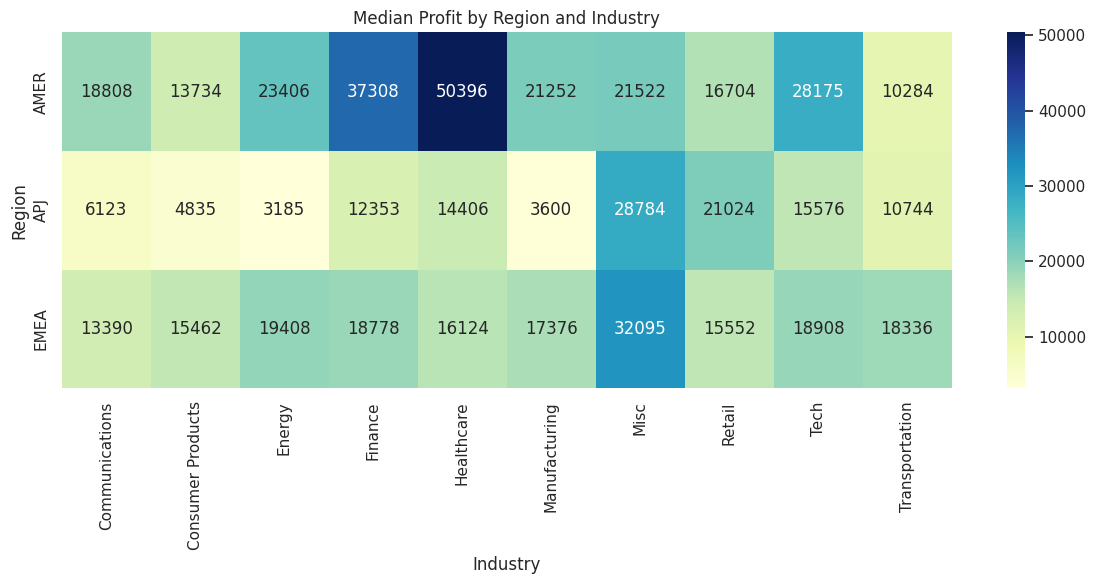

For Region 'AMER':
Highest median profit is in Industry 'Healthcare' ($50,396)
Lowest median profit is in 'Transportation' ($10,284)

For Region 'APJ':
Highest median profit is in Industry 'Misc' ($28,784)
Lowest median profit is in 'Energy' ($3,185)

For Region 'EMEA':
Highest median profit is in Industry 'Misc' ($32,095)
Lowest median profit is in 'Communications' ($13,390)



In [ ]:
# Create pivot table
pivot_profit_region = data.pivot_table(values='Profit', index='Region', columns='Industry', aggfunc='median')

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_profit_region, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title("Median Profit by Region and Industry")
plt.xlabel("Industry")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

# Generate insights
region_industry_insights = []
for region in pivot_profit_region.index:
    row = pivot_profit_region.loc[region]
    max_industry = row.idxmax()
    min_industry = row.idxmin()
    max_value = row.max()
    min_value = row.min()
    region_industry_insights.append(
        f"For Region '{region}':\nHighest median profit is in Industry '{max_industry}' (${max_value:,.0f})\nLowest median profit is in '{min_industry}' (${min_value:,.0f})\n"
    )

# Display insights
for insight in region_industry_insights:
    print(insight)

### 2.6.3. Median profit by region and segment

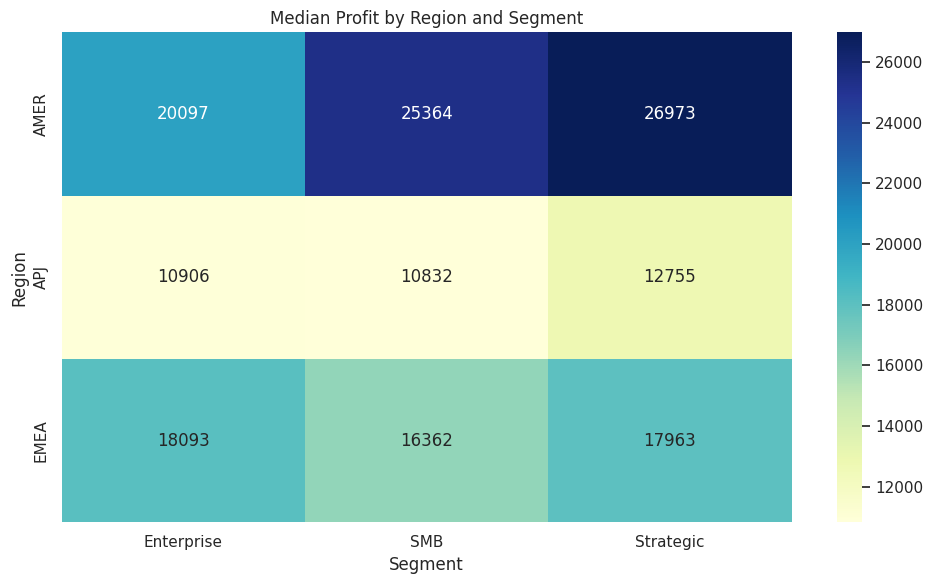

For Region 'AMER':
Highest median profit is in Segment 'Strategic' ($26,973)
Lowest median profit is in Segment 'Enterprise' ($20,097)

For Region 'APJ':
Highest median profit is in Segment 'Strategic' ($12,755)
Lowest median profit is in Segment 'SMB' ($10,832)

For Region 'EMEA':
Highest median profit is in Segment 'Enterprise' ($18,093)
Lowest median profit is in Segment 'SMB' ($16,362)



In [ ]:
# Create pivot table
pivot_profit_region_segment = data.pivot_table(values='Profit', index='Region', columns='Segment', aggfunc='median')

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_profit_region_segment, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title("Median Profit by Region and Segment")
plt.xlabel("Segment")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

# Generate insights
region_segment_insights = []
for region in pivot_profit_region_segment.index:
    row = pivot_profit_region_segment.loc[region]
    max_segment = row.idxmax()
    min_segment = row.idxmin()
    max_value = row.max()
    min_value = row.min()
    region_segment_insights.append(
        f"For Region '{region}':\nHighest median profit is in Segment '{max_segment}' (${max_value:,.0f})\nLowest median profit is in Segment '{min_segment}' (${min_value:,.0f})\n"
    )

# Display insights
for insight in region_segment_insights:
    print(insight)


*In this phase, we observe that **the high median profits are concentrated in the AMER region**, whilethe heatmap between 'segment' and industry' did not yield notable patterns.*

##2.7 Exploring correlation tests

- korelasi antar kolom agar bacanya lebih mudah

- spearman heatmap (discount, sales, dsb)

- melihat berapa % korelasinya dengan sales
- melihat antara diskon dan tdk diskon

### A) Spearman correlation

*Recall that this data is **not normally distributed**. A spearman test is used instead of a pearson test to observe the relationship betweek two variables.*

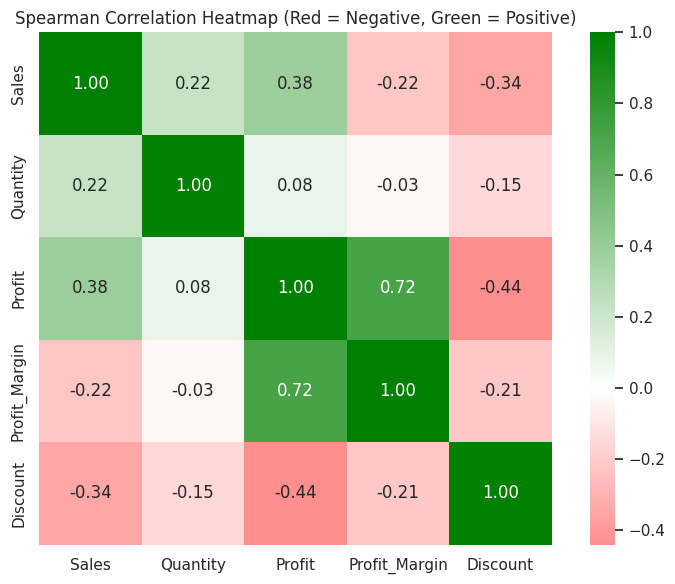

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

# Select the relevant columns
cols = ['Sales', 'Quantity', 'Profit', 'Profit_Margin', 'Discount']
data_selected = data[cols].dropna()

# Calculate Spearman correlation matrix
corr_matrix = data_selected.corr(method='spearman')

# Define custom red-white-green colormap
custom_cmap = LinearSegmentedColormap.from_list("red_green", ["red", "white", "green"])

# Plot the full symmetric heatmap with red/green color scheme
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap=custom_cmap, fmt=".2f", square=True, center=0)
plt.title("Spearman Correlation Heatmap (Red = Negative, Green = Positive)")
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import spearmanr

# List of target variables to test against Discount
metrics = ['Sales', 'Profit', 'Profit_Margin', 'Quantity']

# Loop through each variable
for var in metrics:
    print(f"\nSpearman Correlation: Discount vs {var}")

    # Drop missing values
    subset = data[['Discount', var]].dropna()

    # Run Spearman correlation
    corr, p_value = spearmanr(subset['Discount'], subset[var], nan_policy='omit')

    # Print result
    print(f"Spearman correlation coefficient: {corr:.3f}")
    print(f"P-value: {p_value:.4f}")

    # Interpret monotonic direction
    if corr > 0:
        print(f"🟢 Positive monotonic relationship: as Discount increases, {var} tends to increase.")
    elif corr < 0:
        print(f"🔴 Negative monotonic relationship: as Discount increases, {var} tends to decrease.")
    else:
        print(f"⚪ No monotonic relationship between Discount and {var}.")



Spearman Correlation: Discount vs Sales
Spearman correlation coefficient: -0.342
P-value: 0.0000
🔴 Negative monotonic relationship: as Discount increases, Sales tends to decrease.

Spearman Correlation: Discount vs Profit
Spearman correlation coefficient: -0.440
P-value: 0.0000
🔴 Negative monotonic relationship: as Discount increases, Profit tends to decrease.

Spearman Correlation: Discount vs Profit_Margin
Spearman correlation coefficient: -0.212
P-value: 0.0000
🔴 Negative monotonic relationship: as Discount increases, Profit_Margin tends to decrease.

Spearman Correlation: Discount vs Quantity
Spearman correlation coefficient: -0.149
P-value: 0.0000
🔴 Negative monotonic relationship: as Discount increases, Quantity tends to decrease.


*📝 From this correlation, we can observe that higher discounts are associated with lower sales, profit, profit_margin, and quantity*

## 2.7. Exploring hypothesis testing

**Phase #3: Exploring the relationship between two or more categories using statistical tests.**

*Now we know that the data is not normally distributed, we can apply statistical tests that do not assume the data is normally distributed.*

### A) Kruskal-Wallis test

**Is there a signifficant difference in sales / profit / quantity / profit_margin / discount across segment / industry / customer / region?**

In [ ]:
from scipy.stats import kruskal

metrics = ['Sales', 'Profit', 'Quantity', 'Profit_Margin', 'Discount']
group_columns = ['Segment', 'Industry', 'Customer', 'Region', 'Product']

for metric in metrics:
    for group_col in group_columns:
        print(f"\nKruskal–Wallis Test: {metric} by {group_col}")

        df = data[[group_col, metric]].dropna()
        groups = [group[metric].values for name, group in df.groupby(group_col)]

        if len(groups) >= 2:
            H_stat, p_val = kruskal(*groups)
            print(f"H-statistic: {H_stat:.3f}, P-value: {p_val:.4f}")

            if p_val < 0.05:
                print(f"✅ Significant difference in the distribution of {metric} across {group_col}.")
            else:
                print(f"❌ No significant difference in the distribution of {metric} across {group_col}.")
        else:
            print(f"⚠️ Not enough valid groups to test {metric} by {group_col}.")



Kruskal–Wallis Test: Sales by Segment
H-statistic: 2.610, P-value: 0.2712
❌ No significant difference in the distribution of Sales across Segment.

Kruskal–Wallis Test: Sales by Industry
H-statistic: 13.751, P-value: 0.1314
❌ No significant difference in the distribution of Sales across Industry.

Kruskal–Wallis Test: Sales by Customer
H-statistic: 106.408, P-value: 0.2639
❌ No significant difference in the distribution of Sales across Customer.

Kruskal–Wallis Test: Sales by Region
H-statistic: 20.076, P-value: 0.0000
✅ Significant difference in the distribution of Sales across Region.

Kruskal–Wallis Test: Sales by Product
H-statistic: 94.113, P-value: 0.0000
✅ Significant difference in the distribution of Sales across Product.

Kruskal–Wallis Test: Profit by Segment
H-statistic: 1.320, P-value: 0.5169
❌ No significant difference in the distribution of Profit across Segment.

Kruskal–Wallis Test: Profit by Industry
H-statistic: 15.238, P-value: 0.0846
❌ No significant difference in 

*📝 There is a significant difference in the distribution of sales, profit, profit_margin, discount across region and product.*

### B) Mann Whitney-U Test

***Is there a significant difference between the distribution of sales across products with and without discounts?***

*A Mann Whitney-U test is used to check if two independent groups (sales with discount and sales without discount) have significantly different distributions. This is a non-parametic test, which means it works well with skewed data.*

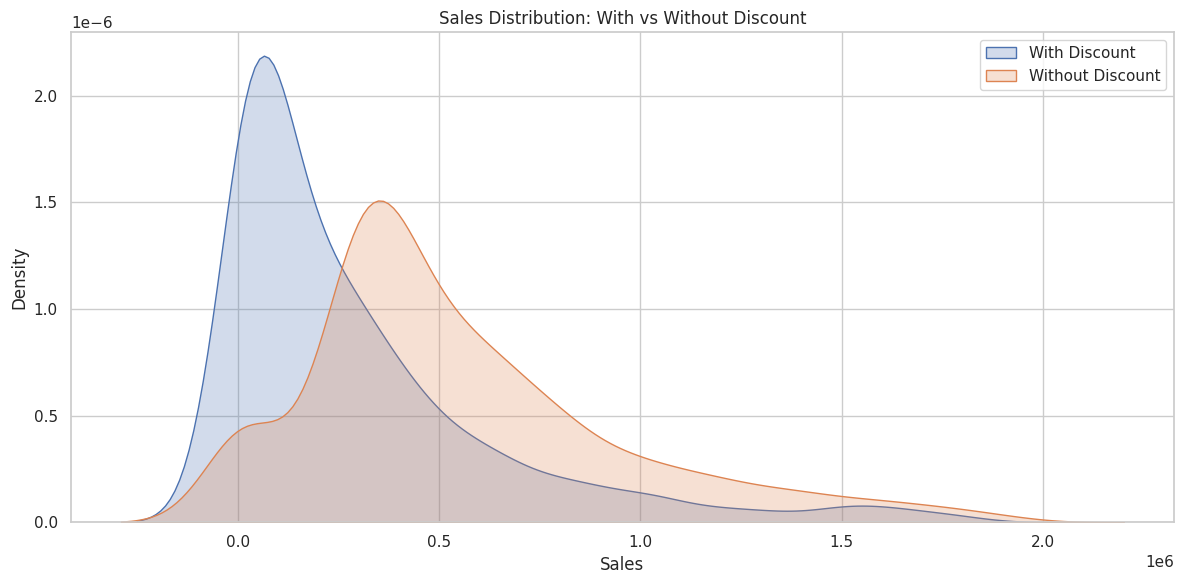

Mann–Whitney U Test:
U-statistic: 405161.00
P-value: 0.0000
✅ There is a significant difference in the distribution of Sales between transactions with and without a discount.


In [ ]:
from scipy.stats import mannwhitneyu

# Separate sales with and without discount
sales_with_discount = data[data['Discount'] > 0]['Sales'].dropna()
sales_without_discount = data[data['Discount'] == 0]['Sales'].dropna()

# Visualization: Distribution of sales
plt.figure(figsize=(12, 6))
sns.kdeplot(x=sales_with_discount, label='With Discount', fill=True)
sns.kdeplot(x=sales_without_discount, label='Without Discount', fill=True)
plt.title('Sales Distribution: With vs Without Discount')
plt.xlabel('Sales')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

# Mann–Whitney U Test
u_stat, p_value = mannwhitneyu(sales_with_discount, sales_without_discount, alternative='two-sided')

# Output test result and insight
print(f"Mann–Whitney U Test:")
print(f"U-statistic: {u_stat:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("✅ There is a significant difference in the distribution of Sales between transactions with and without a discount.")
else:
    print("❌ There is no significant difference in the distribution of Sales between transactions with and without a discount.")

### C) Kruskal–Wallis Test with Effect Size (Part 2)

*After the previous Kruskal-Wallis test finds that there is a statistically significant difference across the profit and sales between regions, this test observes the effect size of these differences.*

***How large is the effect size of the statistically significant differences between sales, profit, quantity, profit_margin, and discount between region, subregion, country, city, and product?***

In [ ]:
from scipy.stats import kruskal

# Define metrics and location groupings
metrics = ['Sales', 'Profit', 'Quantity', 'Profit_Margin','Discount']
cols = ['Region', 'Subregion', 'Country', 'City', 'Product']

# Function to compute epsilon squared (effect size)
def epsilon_squared(H, n):
    return H / (n - 1)

# Loop through each metric and location
for metric in metrics:
    print(f"\n=== Kruskal–Wallis Test for {metric} ===")
    for col in cols:
        # Drop NA values for the current test
        filtered_data = data[[col, metric]].dropna()

        # Group data into a list of groups
        groups = [group[metric].values for name, group in filtered_data.groupby(col)]

        # Proceed only if at least 2 groups have values
        if len(groups) >= 2:
            H_stat, p_val = kruskal(*groups)
            n = sum([len(g) for g in groups])
            eps2 = epsilon_squared(H_stat, n)

            # Interpret result
            print(f"\n{metric} by {col}")
            print(f"H-statistic = {H_stat:.3f}, p-value = {p_val:.4f}, ε² = {eps2:.3f}")

            # Decision
            if p_val < 0.05:
                sig_msg = "✅ Statistically significant difference exists."
            else:
                sig_msg = "❌ NO statistically significant difference."

            # Effect size interpretation
            if eps2 < 0.01:
                effect_msg = "🔴 Effect size: negligible"
            elif eps2 < 0.08:
                effect_msg = "🟡 Effect size: small"
            elif eps2 < 0.26:
                effect_msg = "🟠 Effect size: moderate"
            else:
                effect_msg = "🟢 Effect size: large"

            print(f"{sig_msg} {effect_msg}")
        else:
            print(f"\nNot enough groups to test {metric} by {col}.")



=== Kruskal–Wallis Test for Sales ===

Sales by Region
H-statistic = 20.076, p-value = 0.0000, ε² = 0.008
✅ Statistically significant difference exists. 🔴 Effect size: negligible

Sales by Subregion
H-statistic = 170.971, p-value = 0.0000, ε² = 0.070
✅ Statistically significant difference exists. 🟡 Effect size: small

Sales by Country
H-statistic = 363.968, p-value = 0.0000, ε² = 0.149
✅ Statistically significant difference exists. 🟠 Effect size: moderate

Sales by City
H-statistic = 512.083, p-value = 0.0000, ε² = 0.209
✅ Statistically significant difference exists. 🟠 Effect size: moderate

Sales by Product
H-statistic = 94.113, p-value = 0.0000, ε² = 0.038
✅ Statistically significant difference exists. 🟡 Effect size: small

=== Kruskal–Wallis Test for Profit ===

Profit by Region
H-statistic = 42.339, p-value = 0.0000, ε² = 0.017
✅ Statistically significant difference exists. 🟡 Effect size: small

Profit by Subregion
H-statistic = 276.578, p-value = 0.0000, ε² = 0.113
✅ Statisticall

*📝 From the effect size test, we can summarize that there is a large effect size of the statistically significant difference in discounts across countries and cities.*

### D) Kruskal–Wallis (Part 3)

*After the previous Kruskal-Wallis test finds that there is a statistically significant difference across the profit and sales between products, this test compares the distribution of a continuous variable across two or more independent groups.*

*Note: This data does not print cities with insufficient data (less than 2 discount data per category). This code was ran to check the differencess in sales between different discount levels at the country, subregion, and regional level, but it did not yield any results due to insufficient discount variation, which means it only has 1 or 2 unique discount values and it cannot be grouped into 3 equal-sized bins.*

**Is there a statistically significant difference in Sales between different Discount levels in each City?**

*This code divides the discount data there are into 3 equal-sized bins (low, medium, and high) to see whether they yield statistically significant differences across sales in each cities.*

In [ ]:
# Drop rows with missing values in relevant columns
data_clean = data[['City', 'Discount', 'Sales']].dropna()

# Get all unique cities
cities = data_clean['City'].unique()

for city in cities:
    city_data = data_clean[data_clean['City'] == city].copy()

    # Try binning Discount into quantile groups
    try:
        city_data['DiscountGroup'] = pd.qcut(
            city_data['Discount'],
            q=3,
            labels=["Low", "Medium", "High"],
            duplicates='drop'
        )
    except ValueError:
        continue  # silently skip cities with insufficient discount variation

    # Group sales by discount level (only for observed groups)
    grouped = city_data.groupby('DiscountGroup', observed=True)
    sales_groups = [group['Sales'].values for _, group in grouped]

    # Skip cities with < 2 valid discount groups
    if len(sales_groups) < 2:
        continue

    # Perform Kruskal–Wallis Test
    h_stat, p_value = kruskal(*sales_groups)

    # Compute effect size (eta squared)
    n_total = sum(len(g) for g in sales_groups)
    eta_squared = h_stat / (n_total - 1)

    # Print results
    print(f"\nCity: {city}")
    print("H-statistic:", round(h_stat, 4))
    print("P-value:", round(p_value, 4))
    print("Effect Size (η²):", round(eta_squared, 4))

    if p_value < 0.05:
        print("✅ Statistically significant difference in sales based on discount levels.")
    else:
        print("❌ No statistically significant difference in sales based on discount levels.")



City: Detroit
H-statistic: 1.0
P-value: 0.3173
Effect Size (η²): 1.0
❌ No statistically significant difference in sales based on discount levels.

City: Yonkers
H-statistic: 1.0
P-value: 0.3173
Effect Size (η²): 1.0
❌ No statistically significant difference in sales based on discount levels.

City: Ottawa
H-statistic: 1.0
P-value: 0.3173
Effect Size (η²): 1.0
❌ No statistically significant difference in sales based on discount levels.

City: Calgary
H-statistic: 1.0
P-value: 0.3173
Effect Size (η²): 1.0
❌ No statistically significant difference in sales based on discount levels.

City: Philadelphia
H-statistic: 2.25
P-value: 0.3247
Effect Size (η²): 0.375
❌ No statistically significant difference in sales based on discount levels.

City: Bristol
H-statistic: 2.0
P-value: 0.3679
Effect Size (η²): 1.0
❌ No statistically significant difference in sales based on discount levels.

City: Ankara
H-statistic: 1.0
P-value: 0.3173
Effect Size (η²): 1.0
❌ No statistically significant difference 

***Is there a statistically significant difference in Sales between different Discount levels in each Region?***

In [ ]:
# Make sure necessary columns exist and drop missing values
data_clean = data[['Product', 'Discount', 'Sales']].dropna()

# Get unique products
products = data_clean['Product'].unique()

for product in products:
    product_data = data_clean[data_clean['Product'] == product].copy()

    # Try binning Discount into 3 quantile-based categories
    try:
        product_data['DiscountGroup'] = pd.qcut(
            product_data['Discount'],
            q=3,
            labels=["Low", "Medium", "High"],
            duplicates='drop'
        )
    except ValueError:
        continue  # Skip products with insufficient discount variation

    # Group sales by discount level
    grouped = product_data.groupby('DiscountGroup', observed=True)
    sales_groups = [group['Sales'].values for _, group in grouped]

    # Only proceed if we have at least 2 discount groups
    if len(sales_groups) < 2:
        continue

    # Run Kruskal–Wallis test
    h_stat, p_value = kruskal(*sales_groups)

    # Compute effect size (eta squared)
    n_total = sum(len(g) for g in sales_groups)
    eta_squared = h_stat / (n_total - 1)

    # Print result
    print(f"\nProduct: {product}")
    print("H-statistic:", round(h_stat, 4))
    print("P-value:", round(p_value, 4))
    print("Effect Size (η²):", round(eta_squared, 4))

    if p_value < 0.05:
        print("✅ Significant difference in Sales across Discount levels.")
    else:
        print("❌ No significant difference.")



Product: FinanceHub
H-statistic: 1.5301
P-value: 0.4653
Effect Size (η²): 0.0053
❌ No significant difference.

Product: Marketing Suite
H-statistic: 11.412
P-value: 0.0033
Effect Size (η²): 0.1375
✅ Significant difference in Sales across Discount levels.

Product: Big Ol Database
H-statistic: 1.8667
P-value: 0.3932
Effect Size (η²): 0.2333
❌ No significant difference.


Spearman correlation: ρ = -0.3424, P-value = 0.0000
✅ The correlation is statistically significant (p < 0.05).


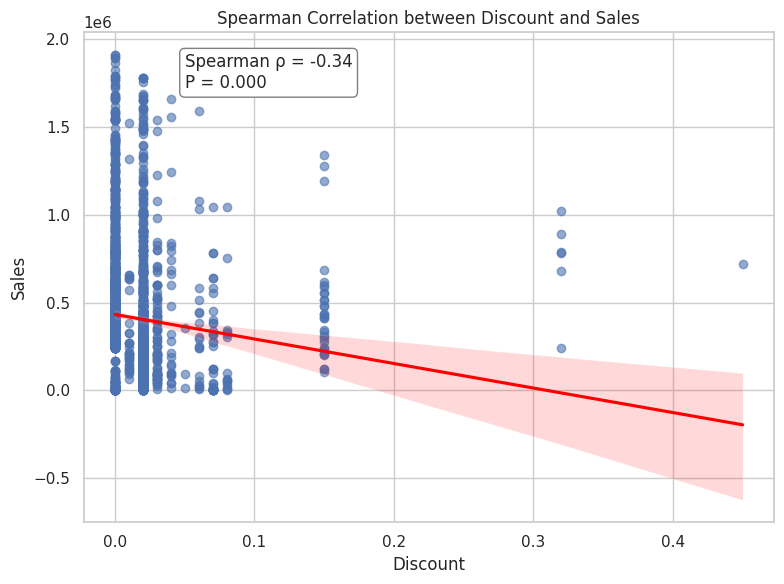

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Drop rows with missing Discount or Sales
corr_data = data[['Discount', 'Sales']].dropna()

# Calculate Spearman correlation
corr_coef, p_value = spearmanr(corr_data['Discount'], corr_data['Sales'])

# Print statistical significance
print(f"Spearman correlation: ρ = {corr_coef:.4f}, P-value = {p_value:.4f}")
if p_value < 0.05:
    print("✅ The correlation is statistically significant (p < 0.05).")
else:
    print("❌ The correlation is NOT statistically significant (p ≥ 0.05).")

# Plot scatterplot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(
    data=corr_data,
    x='Discount',
    y='Sales',
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'},
    ci=95
)

# Annotate on the plot
plt.text(
    0.05,
    corr_data['Sales'].max() * 0.9,
    f"Spearman ρ = {corr_coef:.2f}\nP = {p_value:.3f}",
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor='gray', facecolor='white')
)

# Add labels and title
plt.title("Spearman Correlation between Discount and Sales")
plt.xlabel("Discount")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()


Spearman correlation: ρ = -0.1489, P-value = 0.0000
✅ The correlation is statistically significant (p < 0.05).


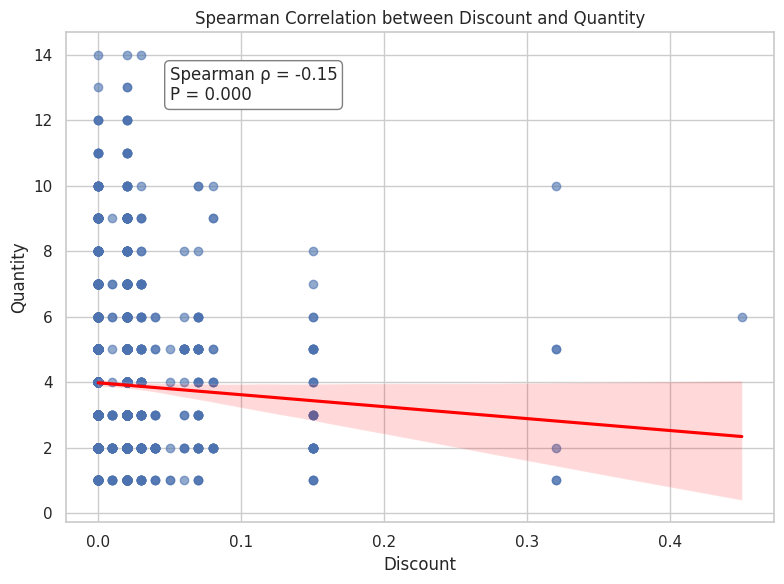

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Drop rows with missing Discount or Quantity
corr_data = data[['Discount', 'Quantity']].dropna()

# Calculate Spearman correlation
corr_coef, p_value = spearmanr(corr_data['Discount'], corr_data['Quantity'])

# Print statistical significance
print(f"Spearman correlation: ρ = {corr_coef:.4f}, P-value = {p_value:.4f}")
if p_value < 0.05:
    print("✅ The correlation is statistically significant (p < 0.05).")
else:
    print("❌ The correlation is NOT statistically significant (p ≥ 0.05).")

# Create scatterplot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(
    data=corr_data,
    x='Discount',
    y='Quantity',
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'},
    ci=95
)

# Annotate on plot
plt.text(
    0.05,
    corr_data['Quantity'].max() * 0.9,
    f"Spearman ρ = {corr_coef:.2f}\nP = {p_value:.3f}",
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor='gray', facecolor='white')
)

# Add labels and title
plt.title("Spearman Correlation between Discount and Quantity")
plt.xlabel("Discount")
plt.ylabel("Quantity")
plt.tight_layout()
plt.show()


*📝 Interestingly, this test shows how there is few data on the level of discount variations to examine its differences in sales across regions. In cities with sufficient data, the differences were not significant. Similarly, only 3 out of 14 products had sufficient data to analyze, and only 1 had statistically significant difference in sales across discount levels.*

### E) Simple Linear Regression using Ordinary Least Squares (OLS)

***Is there a correlation between discounts and sales, profit, profit margin, and quantity?***

*Because the Mann Whitney-U test showed a significant difference in the distribution of sales between orders with and without discount, we will be using the scatterplot to observe the relationship between discount and sales.*

In [ ]:
import statsmodels.api as sm
# Clean data
df = data[['Discount', 'Sales']].dropna()
X = sm.add_constant(df['Discount'])  # add intercept
y = df['Sales']

# Fit the model
model = sm.OLS(y, X).fit()

# Extract key values
slope = model.params['Discount']
intercept = model.params['const']
p_value = model.pvalues['Discount']
r_squared = model.rsquared

if p_value < 0.05:
    direction = "positive" if slope > 0 else "negative"
    interpretation = (
        f"✅ There is a statistically significant {direction} relationship between Discount and Sales.\n"
        f"Each 1-unit increase in Discount is associated with a change of approximately {slope:.2f} units in Sales.\n"
        f"(p-value = {p_value:.4f}, R² = {r_squared:.3f})"
    )
else:
    interpretation = (
        f"❌ There is no statistically significant relationship between Discount and Sales.\n"
        f"(p-value = {p_value:.4f}, R² = {r_squared:.3f})"
    )

print("Regression Interpretation:")
print(interpretation)

Regression Interpretation:
✅ There is a statistically significant negative relationship between Discount and Sales.
Each 1-unit increase in Discount is associated with a change of approximately -1394836.71 units in Sales.
(p-value = 0.0000, R² = 0.010)


*Because the Kruskal-Wallis test with effect size showed a large effect on the statistically significant difference in discounts across countries and cities, we will be examining the relationship between discounts on countries and cities using linear regression.*

*Note: The threshold for linear regression is 10-15 samples. Countries with samples below 10 are skipped to ensure reliability*

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Prepare data
df = data[['Country', 'Discount', 'Sales']].dropna()

# Store results
results = []

# Loop through each country
for country, group in df.groupby('Country'):
    if len(group) < 10:
        continue  # skip if too few observations

    X = sm.add_constant(group['Discount'], has_constant='add')
    y = group['Sales']

    try:
        model = sm.OLS(y, X).fit()
        slope = model.params.get('Discount')
        intercept = model.params.get('const')
        p_value = model.pvalues.get('Discount')
        r_squared = model.rsquared

        # Only keep significant results
        if p_value < 0.05:
            direction = "positive" if slope > 0 else "negative"
            interpretation = (
                f"✅ In {country}, there is a statistically significant {direction} relationship "
                f"between Discount and Sales. Each 1-unit increase in Discount is associated with "
                f"a change of approximately {slope:.2f} units in Sales (p = {p_value:.4f}, R² = {r_squared:.3f})."
            )

            # Store result
            results.append({
                'Country': country,
                'Slope': slope,
                'Intercept': intercept,
                'P-value': p_value,
                'R-squared': r_squared,
                'N Obs': len(group),
                'Interpretation': interpretation
            })

    except Exception as e:
        print(f"⚠️ Skipping {country} due to error: {e}")
        continue

# Create DataFrame of significant results
country_regression_df = pd.DataFrame(results)

# Display the first 10 results
print(country_regression_df[['Country', 'Slope', 'P-value', 'R-squared', 'Interpretation']].head(10))


          Country         Slope   P-value  R-squared  \
0       Australia  5.770679e+06  0.008760   0.058243   
1          Canada -1.398771e+07  0.000273   0.102508   
2           Japan  1.362075e+06  0.005395   0.033171   
3  United Kingdom -8.181142e+06  0.001575   0.034146   

                                                                                                                                                                                                                                   Interpretation  
0        ✅ In Australia, there is a statistically significant positive relationship between Discount and Sales. Each 1-unit increase in Discount is associated with a change of approximately 5770678.64 units in Sales (p = 0.0088, R² = 0.058).  
1         ✅ In Canada, there is a statistically significant negative relationship between Discount and Sales. Each 1-unit increase in Discount is associated with a change of approximately -13987714.03 units in Sales (p = 0.0003, R²

In [ ]:
# Prepare data
df = data[['City', 'Discount', 'Sales']].dropna()

# Store results
results = []

# Loop through each city
for city, group in df.groupby('City'):
    if len(group) < 10:
        continue  # Skip cities with too few observations

    X = sm.add_constant(group['Discount'], has_constant='add')
    y = group['Sales']

    try:
        model = sm.OLS(y, X).fit()
        slope = model.params.get('Discount')
        intercept = model.params.get('const')
        p_value = model.pvalues.get('Discount')
        r_squared = model.rsquared

        # Only keep statistically significant results
        if p_value < 0.05:
            direction = "positive" if slope > 0 else "negative"
            interpretation = (
                f"✅ In {city}, discount has a statistically significant {direction} effect on sales. "
                f"Each 1-unit increase in Discount is associated with a change of approximately "
                f"{slope:.2f} units in Sales (p = {p_value:.4f}, R² = {r_squared:.3f})."
            )

            # Append only significant results
            results.append({
                'City': city,
                'Slope': slope,
                'Intercept': intercept,
                'P-value': p_value,
                'R-squared': r_squared,
                'N Obs': len(group),
                'Interpretation': interpretation
            })

    except Exception as e:
        print(f"⚠️ Skipping {city} due to error: {e}")
        continue

# Create and view significant results
city_regression_df = pd.DataFrame(results)
print(city_regression_df[['City', 'Slope', 'P-value', 'R-squared', 'Interpretation']].head(10))


            City         Slope   P-value     R-squared  \
0         Berlin  1.337509e+06  0.001632  4.322442e-01   
1        Leipzig  2.310884e+03  0.022098 -2.220446e-16   
2         London -1.009009e+07  0.000416  5.305833e-02   
3  St Petersburg  1.258432e+07  0.002597  4.423323e-01   
4         Sydney  5.628915e+06  0.021206  6.790798e-02   
5          Tokyo  1.724793e+06  0.008094  7.008825e-02   
6        Toronto -1.303373e+07  0.002388  8.605828e-02   

                                                                                                                                                                                                              Interpretation  
0          ✅ In Berlin, discount has a statistically significant positive effect on sales. Each 1-unit increase in Discount is associated with a change of approximately 1337508.69 units in Sales (p = 0.0016, R² = 0.432).  
1           ✅ In Leipzig, discount has a statistically significant positive effect on sal

*📝 The simple linear regression shows that the significance of discounts differ by cities and countries. However, limited data is available to declare a pattern.*

In [ ]:
import statsmodels.api as sm

# Store results
results = []

# Loop through each product
for product, group in data.groupby('Product'):
    if len(group) < 10:
        continue  # Skip products with too few observations

    X = sm.add_constant(group['Discount'], has_constant='add')
    y = group['Sales']

    try:
        model = sm.OLS(y, X).fit()
        slope = model.params.get('Discount')
        intercept = model.params.get('const')
        p_value = model.pvalues.get('Discount')
        r_squared = model.rsquared

        # Only keep statistically significant results
        if p_value < 0.05:
            direction = "positive" if slope > 0 else "negative"
            interpretation = (
                f"✅ For '{product}', discount has a statistically significant {direction} effect on sales. "
                f"Each 1-unit increase in Discount is associated with a change of approximately "
                f"{slope:.2f} units in Sales (p = {p_value:.4f}, R² = {r_squared:.3f})."
            )

            # Append only significant results
            results.append({
                'Product': product,
                'Slope': slope,
                'Intercept': intercept,
                'P-value': p_value,
                'R-squared': r_squared,
                'N Obs': len(group),
                'Interpretation': interpretation
            })

    except Exception as e:
        print(f"⚠️ Skipping '{product}' due to error: {e}")
        continue

# reate and view DataFrame of significant results
product_regression_df = pd.DataFrame(results)

# Show all rows in the console
pd.set_option('display.max_rows', None)

pd.set_option('display.max_rows', None)        # show all rows
pd.set_option('display.max_colwidth', None)    # show full content in each cell

# Print all significant results
print(product_regression_df[['Product', 'Slope', 'P-value', 'R-squared', 'Interpretation']])


                      Product         Slope       P-value  R-squared  \
0              ChatBot Plugin -2.074229e+07  5.246224e-15   0.305897   
1                Data Smasher -1.551913e+07  2.923634e-06   0.104303   
2             Marketing Suite  1.090436e+06  9.928073e-03   0.078325   
3      Marketing Suite - Gold -1.841113e+07  5.772853e-16   0.199443   
4                     OneView -8.598466e+06  4.495780e-07   0.190503   
5         SaaS Connector Pack -6.155575e+06  4.201330e-05   0.061463   
6  SaaS Connector Pack - Gold -2.292323e+07  3.548743e-09   0.437800   
7                     Support -1.818348e+07  6.467229e-20   0.214071   

                                                                                                                                                                                                                               Interpretation  
0              ✅ For 'ChatBot Plugin', discount has a statistically significant negative effect on sales. Each 

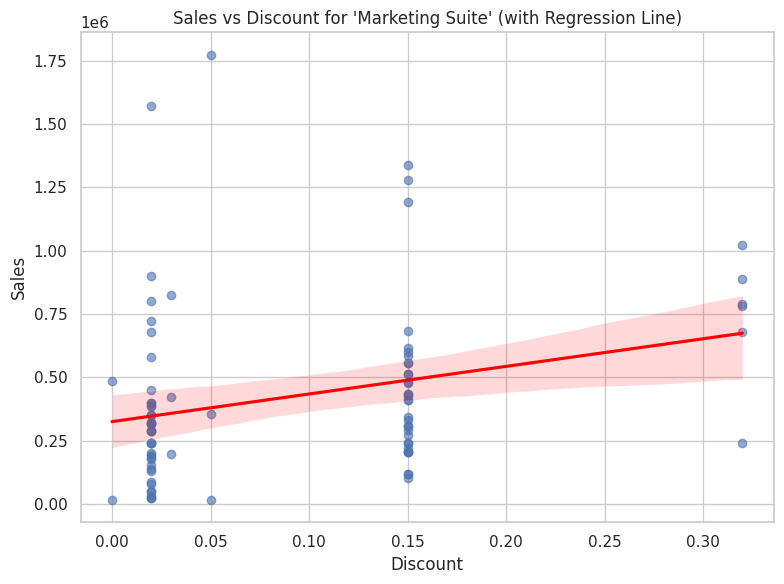

In [ ]:
# Filter data
ms_data = data[(data['Product'] == 'Marketing Suite')][['Discount', 'Sales']].dropna()

# Set style
sns.set(style="whitegrid")

# Create scatterplot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(
    data=ms_data,
    x='Discount',
    y='Sales',
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'},
    ci=95  # confidence interval
)

# Add labels and title
plt.title("Sales vs Discount for 'Marketing Suite' (with Regression Line)")
plt.xlabel("Discount")
plt.ylabel("Sales")
plt.tight_layout()

# Show plot
plt.show()


*📝 Although about half of the products had enough samples where discounts had a statistically significant effect on sales, all of them except 1 ('Marketing Suite') had a negative relationship. This means that most of the discounts imposed were associated with the decreasing sale of their products.*

## 2.8. Summary

***📌 To summarize, the statistical tests show that:***

1. **Shapiro-Wilk and Anderson-Darling:** This data is not normally distributed.

2. **Kruskal-Wallist test:**
- There is a statistically significant difference in the distirbution of sales, profit, profit_margin, and discount across **region and products.**
- There is a statistically significant difference with **large effect** in discounts between **countries and cities**
- There is insufficient data to analyze the statistical significance of differences in sales across discount levels at the regional, sub-regional, and country level. There is no statistically significant differences at the city level.
- The only statistically significant positive difference in sales across different levels by product was observed in the 'Marketing Suite,' where higher discounts are associated with higher sales.

3. **Mann Whitney-U test:** There is a statistically significant difference in the distribution of sales between orders with and without discounts

4. **Simple linear regression**:
- There is a statistically significant negative relationship between Discount and Sales. Each 1-unit increase in Discount is associated with a change of approximately -1,394,836.71 units in Sales.
- There is insufficient data to determine the relationship between discount and sales by country and city.

5. **Spearman correlation**: Discount has a negative monotonic relationship with sales, profit, profit_margin, and quantity, where as discount increases, other variables tend to decrease.

#3. Conclusion and Recommendation



## 3.1. Exploring product bundling based on location

*Region was used due to insufficient data when grouped by country and city.*

In [ ]:
from itertools import combinations
from collections import Counter
from tabulate import tabulate

# Group products per order within each Region
order_bundles = (
    data.groupby(['Region', 'Order ID'])['Product']
    .apply(list)
    .reset_index(name='Product_List')
)

# Count product pairs per Region
region_bundle_counts = {}

for region in order_bundles['Region'].unique():
    region_orders = order_bundles[order_bundles['Region'] == region]['Product_List']

    pairs = []
    for products in region_orders:
        unique_products = set(products)
        if len(unique_products) >= 2:
            pairs += list(combinations(sorted(unique_products), 2))  # unordered pairs

    pair_counter = Counter(pairs)
    region_bundle_counts[region] = pair_counter

# Convert counts to DataFrame
bundle_dfs = []

for region, counter in region_bundle_counts.items():
    if not counter:
        continue

    bundle_data = list(counter.items())
    bundle_data = [b for b in bundle_data if len(b[0]) == 2]

    df = pd.DataFrame(bundle_data, columns=['Bundle', 'Count'])

    # Unpack the product pairs
    bundle_pairs = pd.DataFrame(df['Bundle'].tolist(), columns=['Product_A', 'Product_B'])
    df = pd.concat([df.drop(columns='Bundle'), bundle_pairs], axis=1)
    df['Region'] = region

    bundle_dfs.append(df)

# Combine all into one summary table
bundle_summary = pd.concat(bundle_dfs, ignore_index=True)

# Sort and extract top 5 bundles per Region
top_bundles = (
    bundle_summary
    .sort_values(['Region', 'Count'], ascending=[True, False])
    .groupby('Region', group_keys=False)
    .head(5)
)

# Display as table
display_cols = ['Region', 'Product_A', 'Product_B', 'Count']
print(tabulate(top_bundles[display_cols], headers='keys', tablefmt='github', showindex=False))


| Region   | Product_A              | Product_B              |   Count |
|----------|------------------------|------------------------|---------|
| AMER     | ContactMatcher         | FinanceHub             |      14 |
| AMER     | SaaS Connector Pack    | Support                |      10 |
| AMER     | FinanceHub             | Support                |       9 |
| AMER     | ChatBot Plugin         | Support                |       7 |
| AMER     | Site Analytics         | Support                |       7 |
| APJ      | Data Smasher           | Site Analytics         |       6 |
| APJ      | ContactMatcher         | Marketing Suite - Gold |       5 |
| APJ      | ChatBot Plugin         | Support                |       5 |
| APJ      | FinanceHub             | Site Analytics         |       4 |
| APJ      | ContactMatcher         | Support                |       4 |
| EMEA     | SaaS Connector Pack    | Support                |      12 |
| EMEA     | ContactMatcher         | Marketing Sui

In [ ]:
df = data[['Region', 'Order ID', 'Product', 'Sales', 'Profit']].dropna()

# Calculate per-row profit margin
df['Profit_Margin'] = df['Profit'] / df['Sales']

# Use median as dynamic threshold (or set a fixed one)
median_margin = df['Profit_Margin'].median()

# Label each product as High or Low margin
df['Margin_Level'] = df['Profit_Margin'].apply(lambda x: 'High' if x >= median_margin else 'Low')
# Get product and margin level per order and region
grouped = (
    df.groupby(['Region', 'Order ID'])[['Product', 'Margin_Level']]
    .agg(list)
    .reset_index()
)
from itertools import product
from collections import Counter

cross_margin_counts = {}

for _, row in grouped.iterrows():
    region = row['Region']
    products = row['Product']
    margins = row['Margin_Level']

    # Pair product with its margin level
    labeled_products = list(zip(products, margins))

    # Split into high and low groups
    high_products = sorted([p for p, m in labeled_products if m == 'High'])
    low_products  = sorted([p for p, m in labeled_products if m == 'Low'])

    # Cross-product of High × Low
    cross_pairs = list(product(high_products, low_products))

    # Save counts per region
    if region not in cross_margin_counts:
        cross_margin_counts[region] = Counter()
    cross_margin_counts[region].update(cross_pairs)
bundle_records = []

for region, counter in cross_margin_counts.items():
    for (high, low), count in counter.items():
        bundle_records.append({
            'Region': region,
            'High_Margin_Product': high,
            'Low_Margin_Product': low,
            'Count': count
        })

cross_bundle_df = pd.DataFrame(bundle_records)
from tabulate import tabulate

top_cross_bundles = (
    cross_bundle_df
    .sort_values(['Region', 'Count'], ascending=[True, False])
    .groupby('Region', group_keys=False)
    .head(5)
)

print(tabulate(top_cross_bundles, headers='keys', tablefmt='github', showindex=False))


| Region   | High_Margin_Product    | Low_Margin_Product     |   Count |
|----------|------------------------|------------------------|---------|
| AMER     | Site Analytics         | Support                |       6 |
| AMER     | ContactMatcher         | ContactMatcher         |       5 |
| AMER     | FinanceHub             | Support                |       4 |
| AMER     | ContactMatcher         | FinanceHub             |       4 |
| AMER     | ChatBot Plugin         | Data Smasher           |       3 |
| APJ      | Site Analytics         | Data Smasher           |       4 |
| APJ      | Site Analytics         | ContactMatcher         |       3 |
| APJ      | ContactMatcher         | Marketing Suite - Gold |       3 |
| APJ      | ChatBot Plugin         | Support                |       3 |
| APJ      | ChatBot Plugin         | FinanceHub             |       3 |
| EMEA     | Marketing Suite - Gold | ContactMatcher         |       5 |
| EMEA     | Support                | Support      

*📝 There have been existing product bundle orders based on cross-selling products with high and low margins. This strategy can be optimized by increasing the quantity or experimenting with different product bundle types.*

## 3.2. Exploring discount strategy based on location

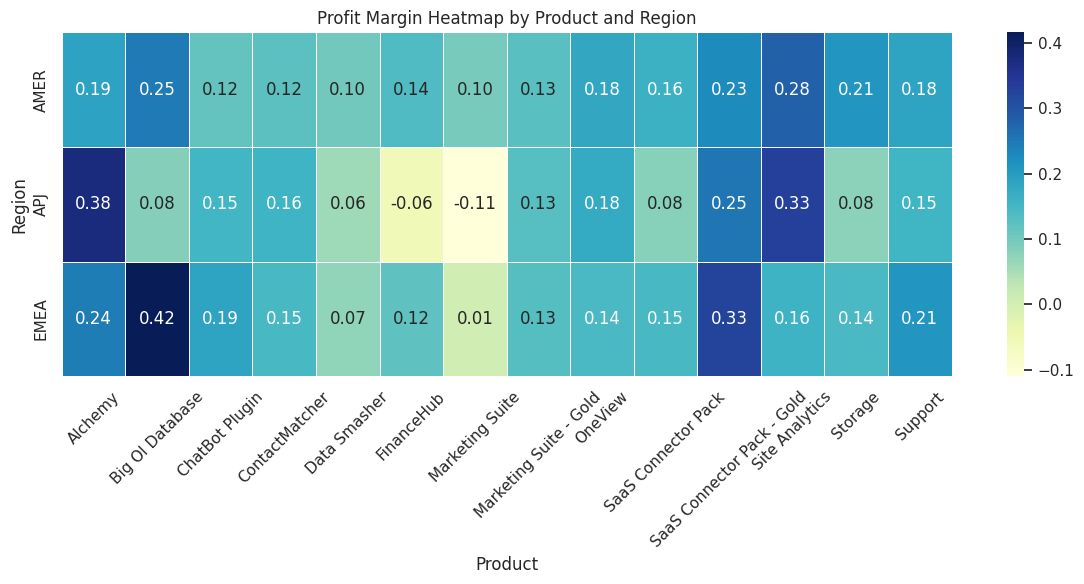

In [ ]:
# Ensure necessary columns exist and drop missing values
df = data[['Region', 'Product', 'Sales', 'Profit']].dropna()

# Group by Region and Product, aggregate Sales and Profit
summary = (
    df.groupby(['Region', 'Product'])
    .agg({'Sales': 'sum', 'Profit': 'sum'})
    .reset_index()
)

# Calculate Profit Margin
summary['Profit_Margin'] = summary['Profit'] / summary['Sales']

# Round for readability
summary['Profit_Margin'] = summary['Profit_Margin'].round(4)

# Display top rows
# Pivot to get Region × Product matrix of profit margins
pivot = summary.pivot(index='Region', columns='Product', values='Profit_Margin')

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)

plt.title("Profit Margin Heatmap by Product and Region")
plt.ylabel("Region")
plt.xlabel("Product")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

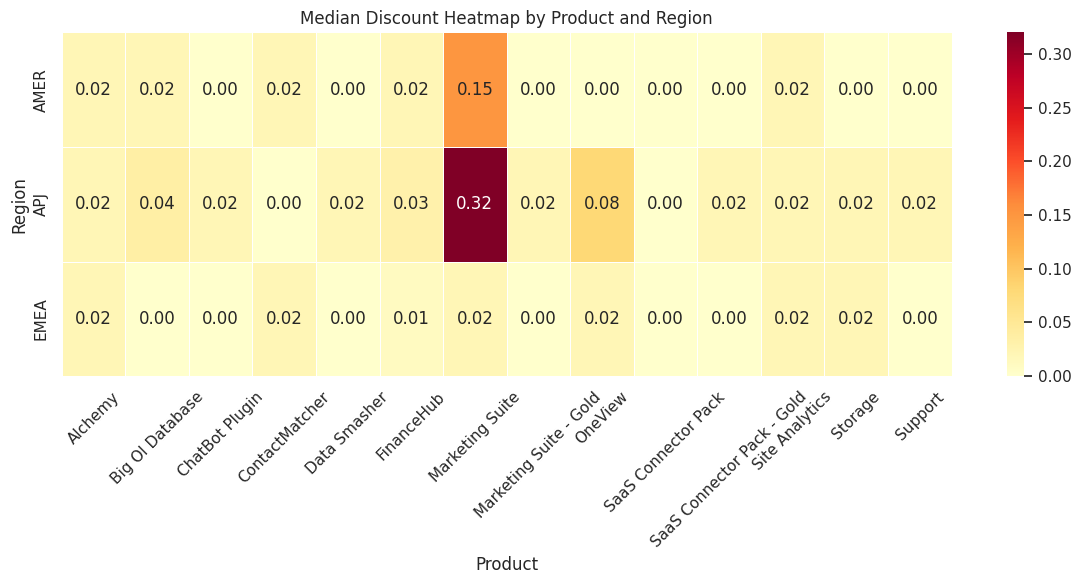

In [ ]:
import matplotlib.pyplot as plt

# Ensure necessary columns exist and drop missing values
df = data[['Region', 'Product', 'Discount']].dropna()

# Group by Region and Product, aggregate average discount
summary = (
    df.groupby(['Region', 'Product'])
    .agg({'Discount': 'median'})  # median discount
    .reset_index()
)

# Round for readability
summary['Discount'] = summary['Discount'].round(4)

# Pivot to Region × Product matrix
pivot = summary.pivot(index='Region', columns='Product', values='Discount')

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="YlOrRd", linewidths=0.5)

plt.title("Median Discount Heatmap by Product and Region")
plt.ylabel("Region")
plt.xlabel("Product")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


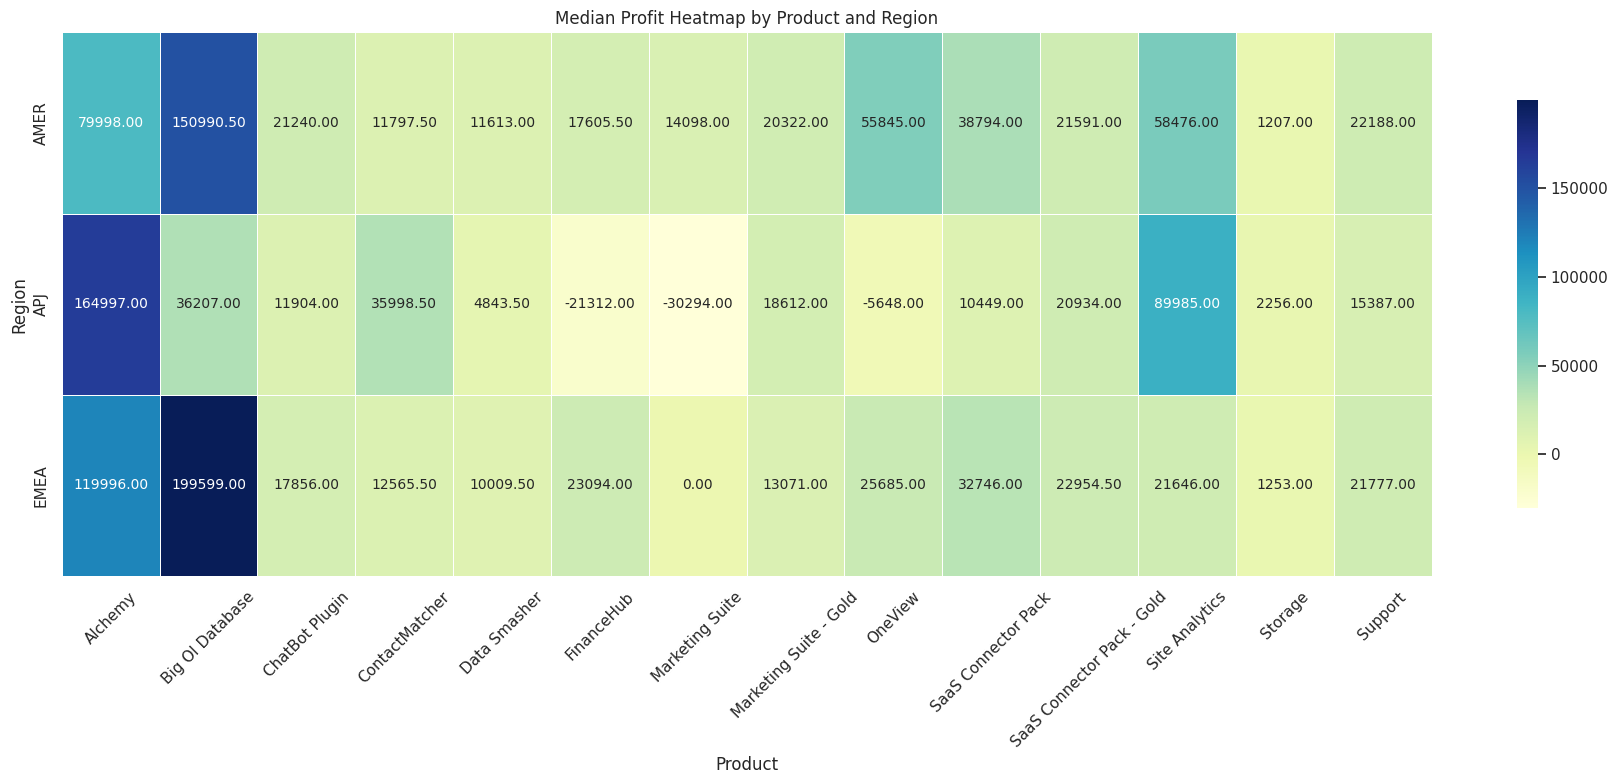

In [ ]:
# Ensure necessary columns exist and drop missing values
df = data[['Region', 'Product', 'Profit']].dropna()

# Group by Region and Product, aggregate average Profit
summary = (
    df.groupby(['Region', 'Product'])
    .agg({'Profit': 'median'})  # median Profit
    .reset_index()
)

# Round for readability
summary['Profit'] = summary['Profit'].round(4)

# Pivot to Region × Product matrix
pivot = summary.pivot(index='Region', columns='Product', values='Profit')

# Plot heatmap
plt.figure(figsize=(18, 8))  # wider figure
sns.heatmap(
    pivot,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    linewidths=0.5,
    annot_kws={"size": 10},     # smaller number font
    cbar_kws={"shrink": 0.75}  # smaller colorbar
)

plt.title("Median Profit Heatmap by Product and Region")
plt.ylabel("Region")
plt.xlabel("Product")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

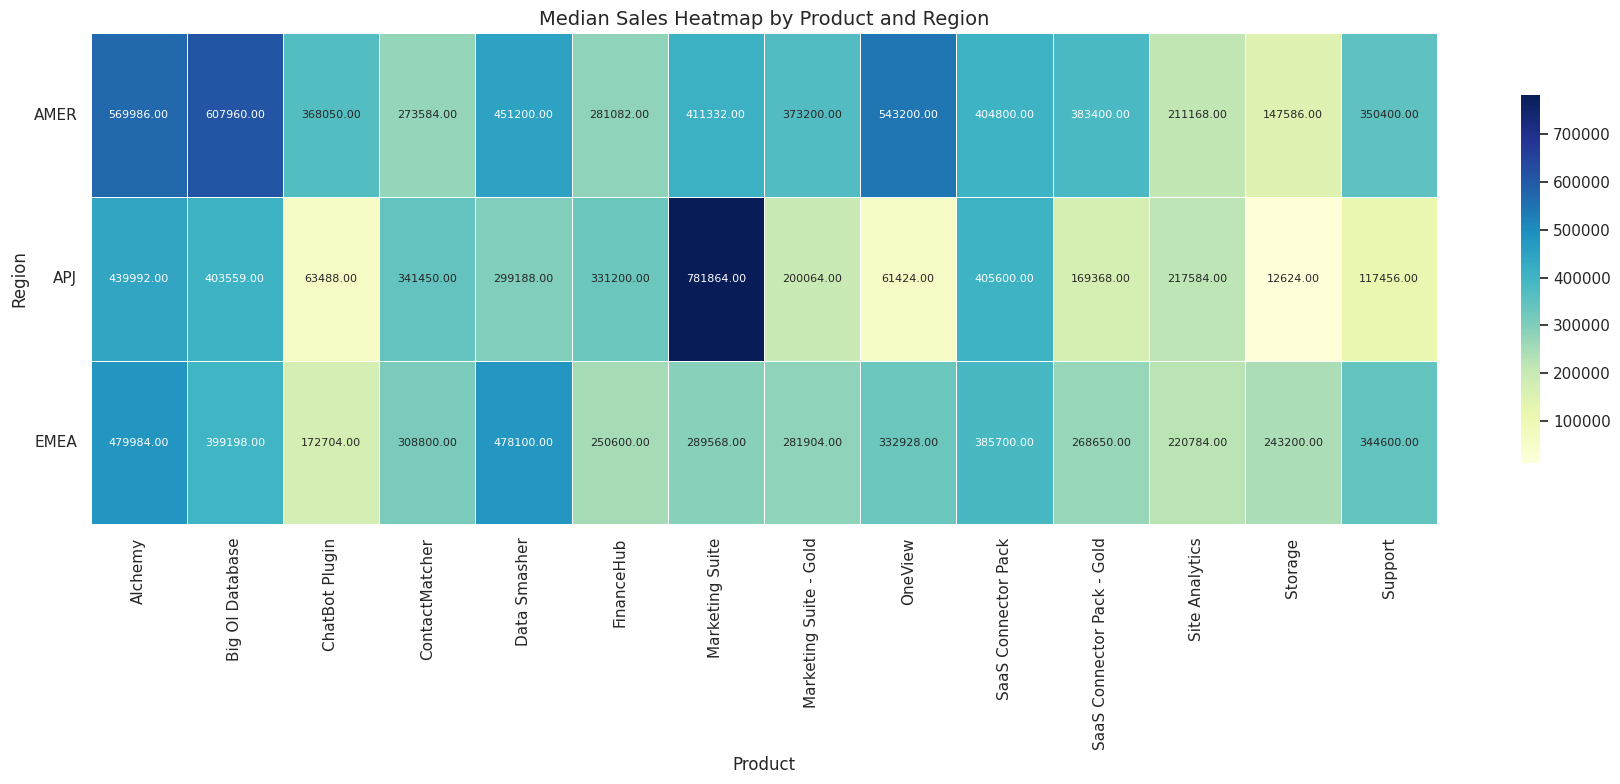

In [ ]:
# Prepare data
df = data[['Region', 'Product', 'Sales']].dropna()

# Aggregate median sales
summary = (
    df.groupby(['Region', 'Product'])
    .agg({'Sales': 'median'})
    .reset_index()
)

summary['Sales'] = summary['Sales'].round(2)

# Pivot
pivot = summary.pivot(index='Region', columns='Product', values='Sales')

# Plot with improved readability
plt.figure(figsize=(18, 8))  # wider figure
sns.heatmap(
    pivot,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    linewidths=0.5,
    annot_kws={"size": 8},     # smaller number font
    cbar_kws={"shrink": 0.75}  # smaller colorbar
)

plt.title("Median Sales Heatmap by Product and Region", fontsize=14)
plt.ylabel("Region")
plt.xlabel("Product")
plt.xticks(rotation=90)  # vertical labels
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


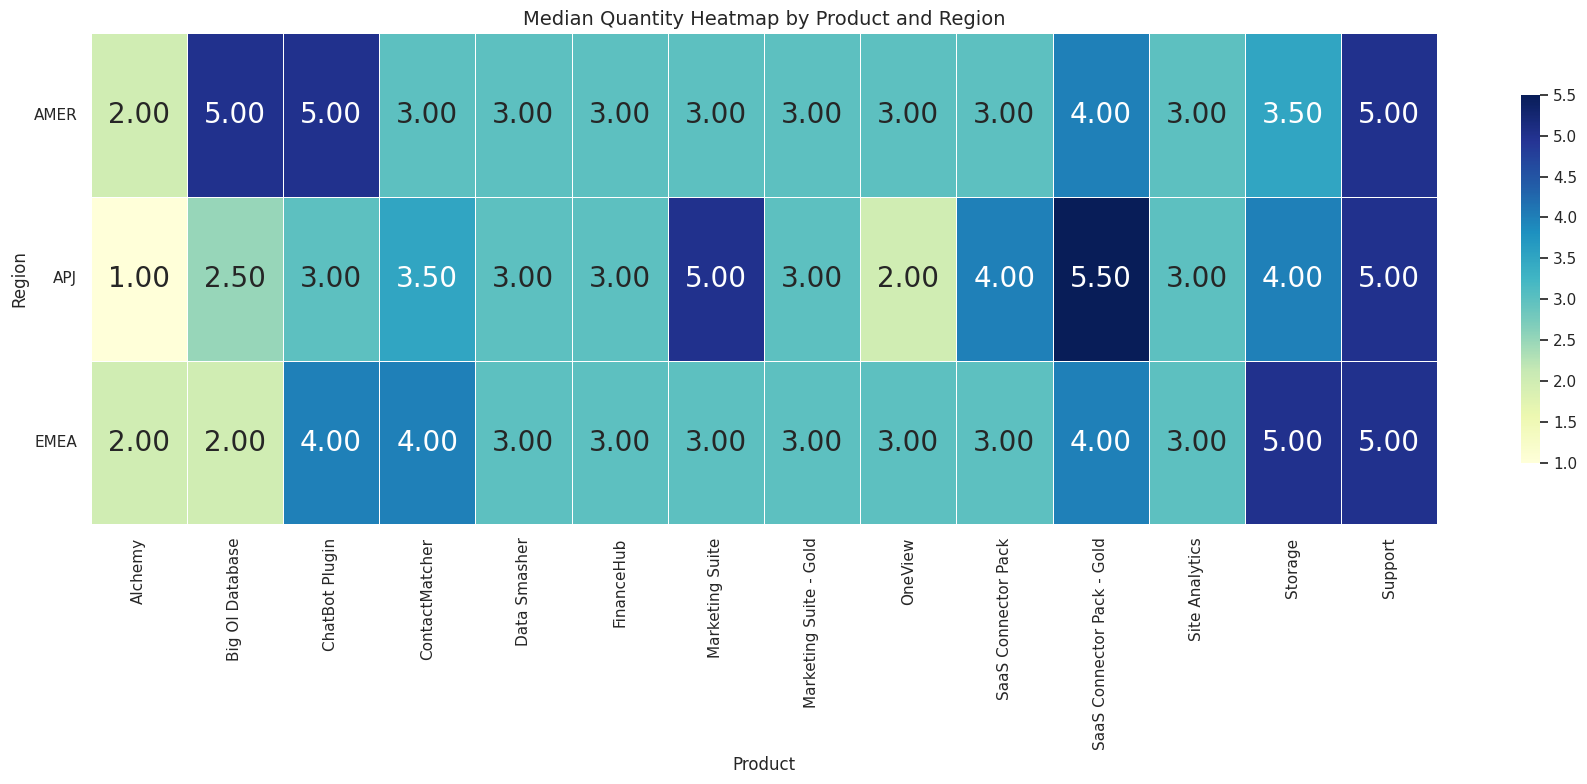

In [ ]:
# Prepare data
df = data[['Region', 'Product', 'Quantity']].dropna()

# Aggregate median Quantity
summary = (
    df.groupby(['Region', 'Product'])
    .agg({'Quantity': 'median'})
    .reset_index()
)

summary['Quantity'] = summary['Quantity'].round(2)

# Pivot
pivot = summary.pivot(index='Region', columns='Product', values='Quantity')

# Plot with improved readability
plt.figure(figsize=(18, 8))  # wider figure
sns.heatmap(
    pivot,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    linewidths=0.5,
    annot_kws={"size": 20},     # smaller number font
    cbar_kws={"shrink": 0.75}  # smaller colorbar
)

plt.title("Median Quantity Heatmap by Product and Region", fontsize=14)
plt.ylabel("Region")
plt.xlabel("Product")
plt.xticks(rotation=90)  # vertical labels
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


*📝 Products with lower profit margin should be reevaluated on whether they are eligible for discounts. In contrast, products with higher profit margin can be considered to experiment with promotions. Based on the heatmap, the 'Marketing Suite' product had the most median sales and discount, despite having decreased profit margins--which indicates an objective must be set before applying discounts: is it to increase sales or profits?*

##3.3. Key takeaways

***Conclusion:***
1. The distribution of sales and profits significantly differ across product and region, with no significant differences across industries, segments, and customers.
2. Globally, increased discounts were associated with lower sales and quantity. However, very few countries present an opposite trend.
3. While there are products such as Alchemy, Big OI Database, and Support that has similar trends globally, the trend of other products remain scattered.

***Recommendations:***
1. Adopt a product bundling or cross-selling strategy where promotions are based on sales trends by order location
2. Reevaluate discount strategy, why is it not increasing sales? (e.g., branding, promotions, reputation)
3. Learn from top-performing locations and conduct A/B testing to localize the strategy in another location.